In [1]:
import pandas as pd

#importing libraries for plotting
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  matplotlib.ticker import FuncFormatter
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches

In [2]:
data = pd.read_csv('/home/michael/Desktop/corrected_data_questionnaires.tsv', sep='\t')
corr_matrix = pd.read_csv('/home/michael/Desktop/corr_matrix.tsv', sep='\t')
sum_scores= pd.read_csv('/home/michael/Desktop/sum_scores.tsv', sep='\t')
dichtomous_questionnaires_data = pd.read_csv('/home/michael/Desktop/data_dichotomous_questionnaires.tsv',sep='\t')

In [3]:
corr_matrix.columns

Index(['BD Traurigkeit', 'BD Pessimismus', 'BD Versagensgefühle',
       'BD Verlust von Freude', 'BD Schuldgefühle', 'BD Bestrafungsgefühle',
       'BD Selbstablehnung', 'BD Selbstvorwürfe', 'BD Selbstmordgedanken',
       'BD Weinen',
       ...
       'MAE: Bei Versammlungen überlasse ich das Reden gewöhnlich anderen.',
       'MAE: Ich fordere mich selbst bis an meine Grenzen.',
       'MAE: Ich bin dominant, selbstsicher und durchsetzungsfähig.',
       'MAE: Ich bin kein gutgelaunter Optimist.',
       'MAE: Wenn ein Vorhaben sich als zu schwierig erweist, neige ich dazu, etwas neues anzufangen.',
       'MAE: Ich habe Spaß an fast allem, was ich tue.',
       'MAE: Bei Unterhaltungen rede ich selbst am meisten.',
       'MAE: Bei allem, was ich tue, strebe ich nach Perfektion.',
       'MAE: Ich finde, dass es sehr leicht ist, das Leben zu genießen.',
       'MAE: Ich kann Leute sehr gut beeinflussen.'],
      dtype='object', length=240)

In [4]:
sum_scores_corr_matrix = sum_scores.corr(method='spearman')

In [5]:
sp_columns =  []


for i in range(len((corr_matrix.columns[corr_matrix.columns.str.contains('SPS')]))):
    #print(i)
    sp_column_name = corr_matrix.columns[corr_matrix.columns.str.contains('SPS')][i]
    #print(bdi_column_name)
    sp_columns.append(sp_column_name)
    

index_sp_columns = []

for i in range(len(corr_matrix.columns)):
    for j in range(len(sp_columns)):
        if corr_matrix.columns[i] == sp_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_sp_columns.append(i)
        #else:
            #print('no')

#sp_data = corr_matrix.iloc[:, index_sp_columns[0]:(index_sp_columns[-1] +1)]
index_sp_columns

[46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65]

In [6]:
corr_matrix = corr_matrix.iloc[:66,:66]

In [7]:
corr_matrix.columns

Index(['BD Traurigkeit', 'BD Pessimismus', 'BD Versagensgefühle',
       'BD Verlust von Freude', 'BD Schuldgefühle', 'BD Bestrafungsgefühle',
       'BD Selbstablehnung', 'BD Selbstvorwürfe', 'BD Selbstmordgedanken',
       'BD Weinen', 'BD Unruhe', 'BD Interessenverlust',
       'BD Entschlussunfähigkeit', 'BD Wertlosigkeit', 'BD Energieverlust',
       'BD Veränderung der Schlafgewohnheiten', 'BD Reizbarkeit',
       'BD Veränderung des Appetits', 'BD Konzentrationsschwierigkeiten',
       'BD Ermüdung und Erschöpfung', 'BD Verlust an sexuellem Interesse',
       'DES: ... werde ich hilflos im Umgang mit meinen Gefühlen sein.',
       'DES: ... wird es mir helfen, wenn ich Dinge tue, die mir gewöhnlich Spaß machen.',
       'DES: ... werde ich meine Stimmung beeinflussen können.',
       'DES: ... wird es mir gut tun, wenn ich mich körperlich schone.',
       'DES: ... werde ich mich besser fühlen, wenn ich mit jemandem über meine Probleme rede.',
       'DES: ... werde ich es nicht

In [8]:
# select only relevant data
sum_scores_corr_matrix = sum_scores_corr_matrix.iloc[:3, :3]
sum_scores_corr_matrix

bdi_sum_score  des_sum_score  sp_sum_score
bdi_sum_score       1.000000       0.321662      0.426464
des_sum_score       0.321662       1.000000      0.386433
sp_sum_score        0.426464       0.386433      1.000000

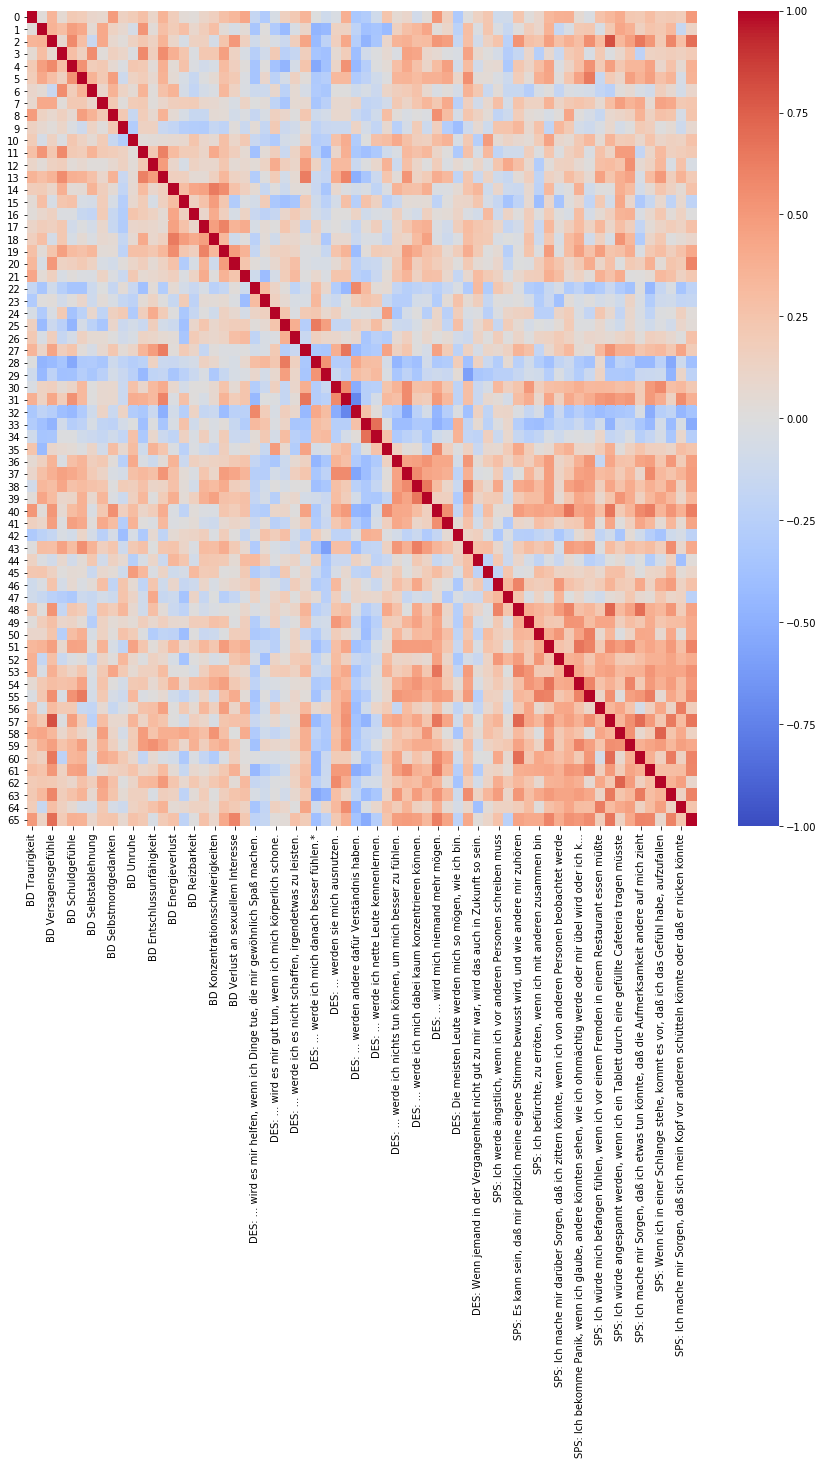

In [9]:

plt.figure(figsize=(15,15))
sns_plot = sns.heatmap(corr_matrix, cmap="coolwarm", vmin=-1,vmax=1,center=0)
#sns_plot.figure.savefig("/home/michael/Desktop/output.png", dpi=300, bbox_inches='tight')

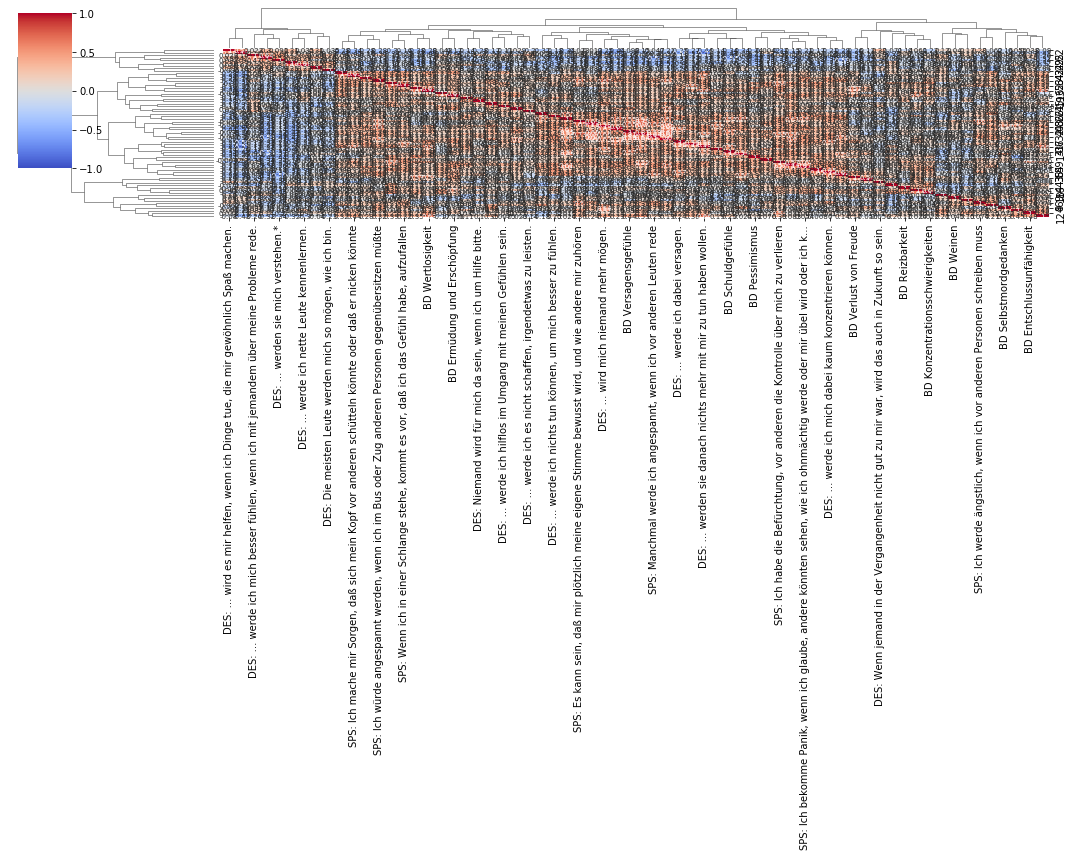

In [10]:
sns.clustermap(corr_matrix, method="complete", cmap='coolwarm', annot=True, 
               annot_kws={"size": 7}, vmin=-1, vmax=1, figsize=(15,12));

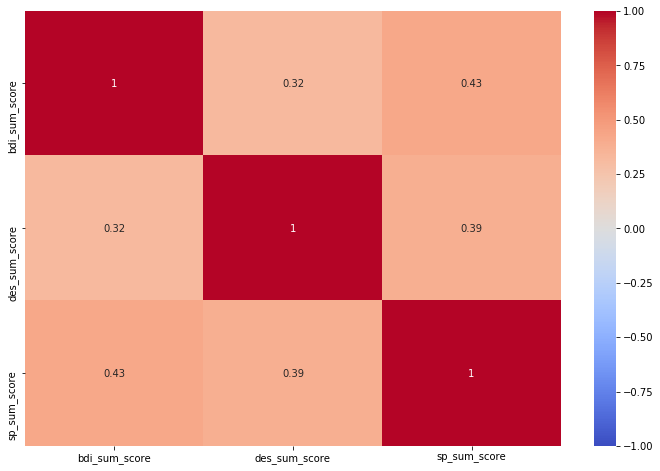

In [11]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(sum_scores_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
sns_plot.figure.savefig("/home/michael/Desktop/sum_scores_corr.png", dpi=300, bbox_inches='tight')

In [12]:
sum_scores_corr_matrix

bdi_sum_score  des_sum_score  sp_sum_score
bdi_sum_score       1.000000       0.321662      0.426464
des_sum_score       0.321662       1.000000      0.386433
sp_sum_score        0.426464       0.386433      1.000000

<Figure size 1080x720 with 0 Axes>

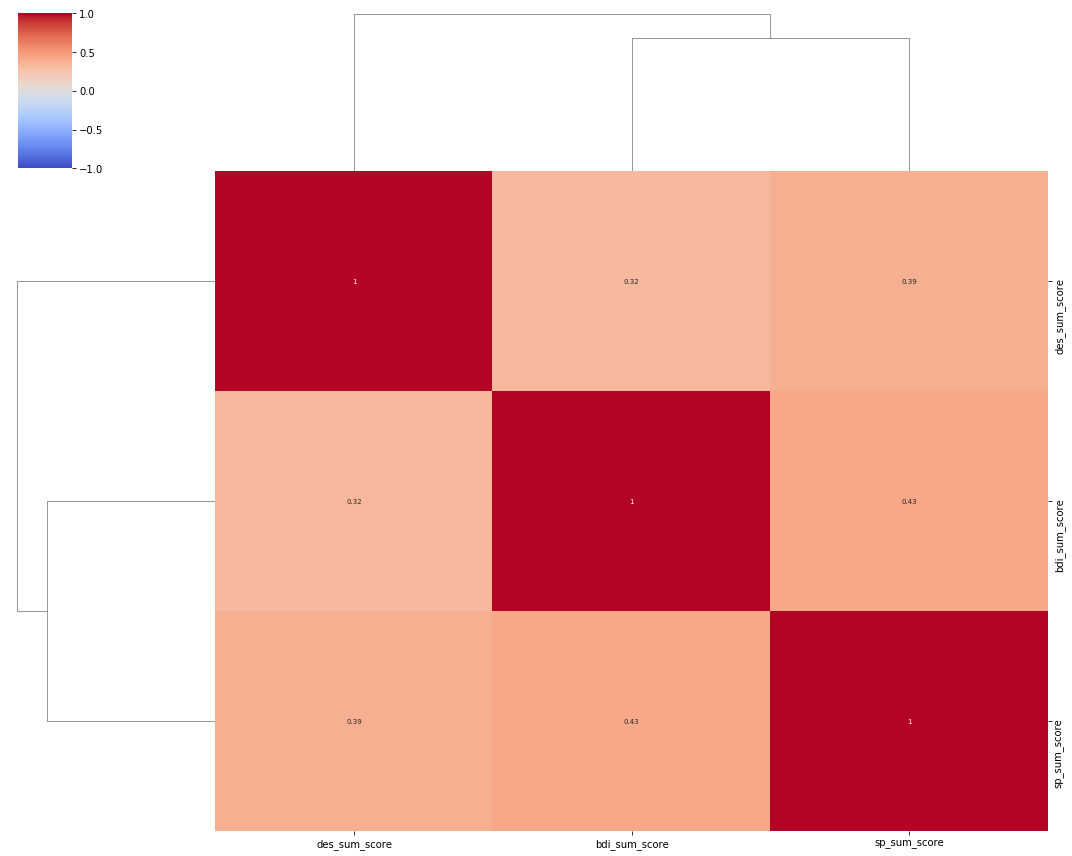

In [13]:
plt.figure(figsize=(15,10))

sns_plot = sns.clustermap(sum_scores_corr_matrix, method="complete", cmap='coolwarm', annot=True, 
               annot_kws={"size": 7}, vmin=-1,vmax=1,center=0, figsize=(15,12));
sns_plot.savefig("/home/michael/Desktop/sum_scores_corr_clustermap.png", dpi=300, bbox_inches='tight')

In [14]:
sum_scores.describe()

bdi_sum_score  des_sum_score  sp_sum_score  neo-extraversion_sum_score  \
count      36.000000      36.000000     36.000000                   36.000000   
mean        6.333333      66.388889     11.666667                  105.444444   
std         4.672106       5.200427      9.887944                    7.861096   
min         0.000000      50.000000      0.000000                   87.000000   
25%         3.000000      64.000000      4.000000                  101.250000   
50%         6.000000      66.000000     10.000000                  105.500000   
75%         8.000000      70.000000     15.000000                  112.000000   
max        21.000000      78.000000     41.000000                  120.000000   

       neo-neuroticism_sum_score  neo-aggreeablness_sum_score  mae_sum_score  
count                  36.000000                    36.000000      36.000000  
mean                   94.694444                   106.194444    1356.833333  
std                    11.999570                    10.039406    5399.957791  
min                    74.000000                    88.000000      45.000000  
25%                    85.000000                   100.000000      60.000000  
50%                    94.000000                   105.500000      66.500000  
75%                   103.250000                   111.000000      72.000000  
max                   122.000000                   133.000000   23310.000000

## Plot sum scores pro questionnaire

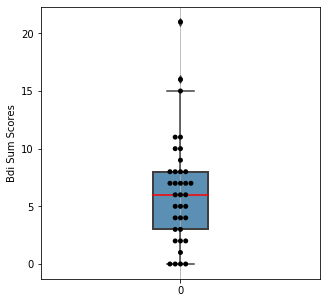

In [15]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['bdi_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['bdi_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Bdi Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/bdi_sums_output.png", dpi=300, bbox_inches='tight')

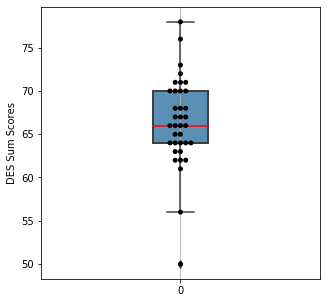

In [16]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['des_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['des_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="DES Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/des_sums_output.png", dpi=300, bbox_inches='tight')

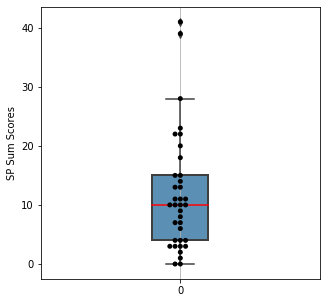

In [17]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['sp_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['sp_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="SP Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/sps_sums_output.png", dpi=300, bbox_inches='tight')

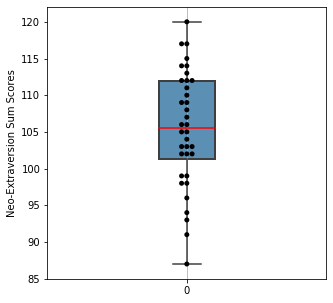

In [18]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['neo-extraversion_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['neo-extraversion_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Neo-Extraversion Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/ne_sums_output.png", dpi=300, bbox_inches='tight')

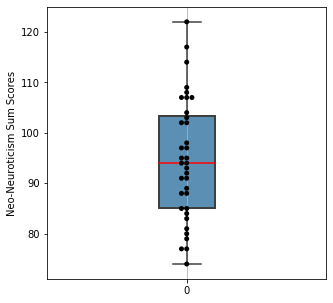

In [19]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['neo-neuroticism_sum_score'],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['neo-neuroticism_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Neo-Neuroticism Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/nn_sums_output.png", dpi=300, bbox_inches='tight')

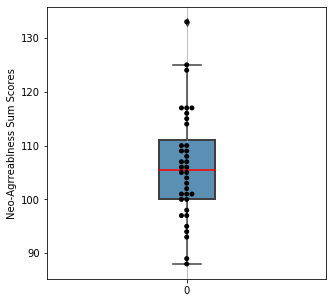

In [20]:
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(5, 5))


# Load the example planets dataset
#planets = sns.load_dataset("planets")

# Plot the orbital period with horizontal boxes
sns.boxplot(data=sum_scores['neo-aggreeablness_sum_score'], 
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

# single observation
sns.swarmplot(data=sum_scores['neo-aggreeablness_sum_score'], color="black")

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Neo-Agrreablness Sum Scores")
#sns.despine(trim=True, left=True)
f.savefig("/home/michael/Desktop/na_sums_output.png", dpi=300, bbox_inches='tight')

## Plot Results by single items per questionnaire

## BDI-II

In [21]:
# Get Values for BDI-II
bdi_columns =  []
for i in range(len((data.columns[data.columns.str.contains('BD ')]))):
    #print(i)
    bdi_column_name = data.columns[data.columns.str.contains('BD ')][i]
    #print(bdi_column_name)
    bdi_columns.append(bdi_column_name)

index_bdi_columns = []

for i in range(len(data.columns)):
    for j in range(len(bdi_columns)):
        if data.columns[i] == bdi_columns[j]:
            index_bdi_columns.append(i)

bdi_data = data.iloc[:, index_bdi_columns[0]:(index_bdi_columns[-1] +1)]

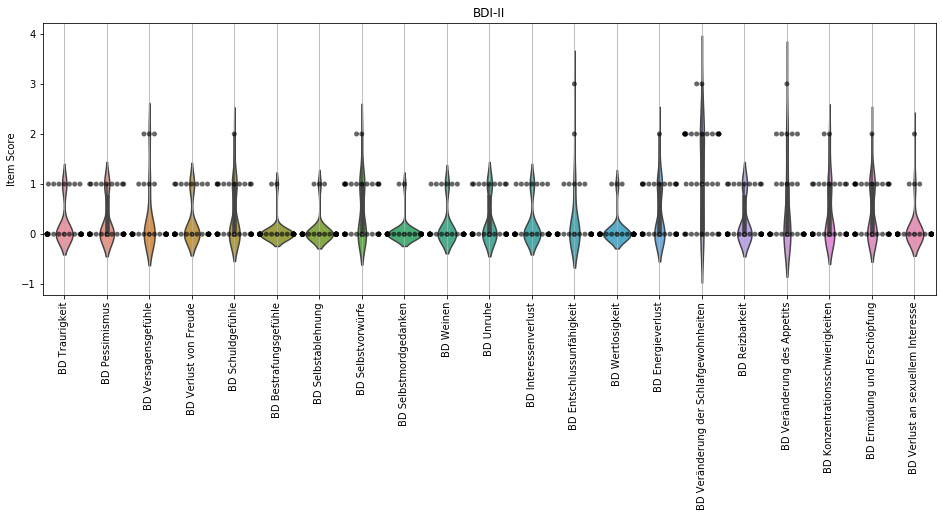

In [22]:
# Initialize figure 
f, ax = plt.subplots(figsize=(16, 5))

# Boxplot bdi
sns.violinplot(data=bdi_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=bdi_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.set(ylabel="Item Score")
ax.set_title('BDI-II')
f.savefig("/home/michael/Desktop/bdi_item_scores_output.png", dpi=300, bbox_inches='tight')

## DES - depressive expectation scale

In [23]:
# Get Values for DES
des_columns =  []
for i in range(len((data.columns[data.columns.str.contains('DE')]))):
    #print(i)
    des_column_name = data.columns[data.columns.str.contains('DE')][i]
    #print(bdi_column_name)
    des_columns.append(des_column_name)


index_des_columns = []

for i in range(len(data.columns)):
    for j in range(len(des_columns)):
        if data.columns[i] == des_columns[j]:
            index_des_columns.append(i)


des_data = data.iloc[:, index_des_columns[0]:(index_des_columns[-1] +1)]


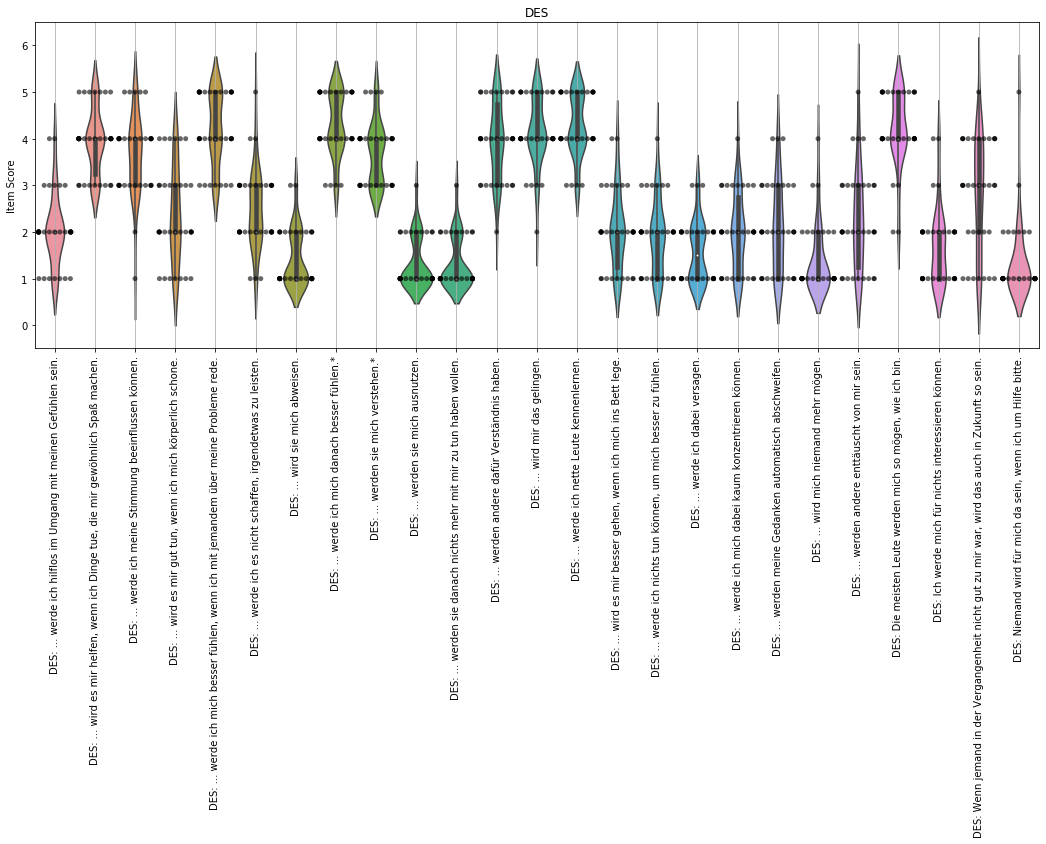

In [24]:
# Initialize figure 
f, ax = plt.subplots(figsize=(18, 6))

# Boxplot bdi
sns.violinplot(data=des_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=des_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('DES')
f.savefig("/home/michael/Desktop/des_item_scores_output.png", dpi=300, bbox_inches='tight')

## SPS - social phobia scale

In [25]:

sp_columns =  []
for i in range(len((data.columns[data.columns.str.contains('SPS')]))):
    #print(i)
    sp_column_name = data.columns[data.columns.str.contains('SPS')][i]
    #print(bdi_column_name)
    sp_columns.append(sp_column_name)
    


index_sp_columns = []

for i in range(len(data.columns)):
    for j in range(len(sp_columns)):
        if data.columns[i] == sp_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_sp_columns.append(i)
        #else:
            #print('no')

sp_data = data.iloc[:, index_sp_columns[0]:(index_sp_columns[-1] +1)]

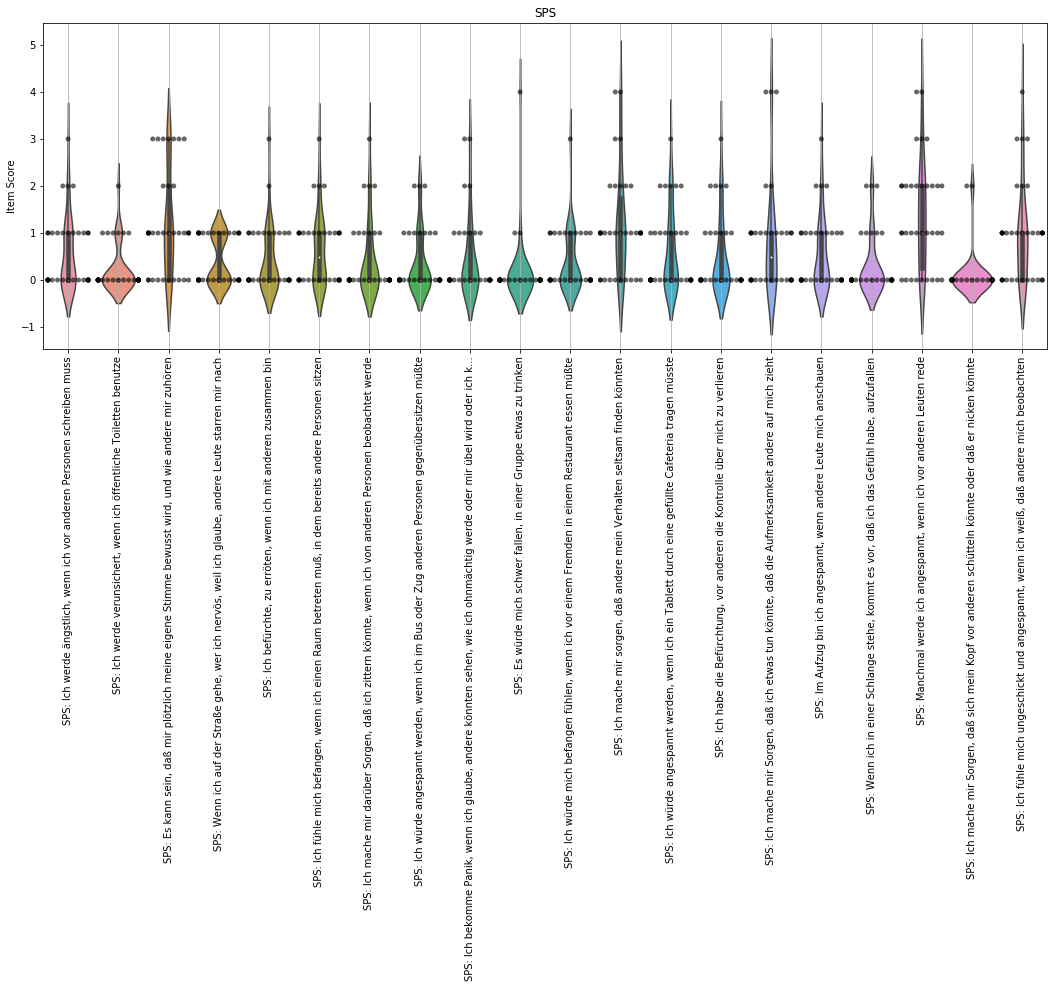

In [26]:
# Initialize figure 
f, ax = plt.subplots(figsize=(18, 6))

# Boxplot bdi
sns.violinplot(data=sp_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=sp_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('SPS')
f.savefig("/home/michael/Desktop/sps_item_scores_output.png", dpi=300, bbox_inches='tight')

## NEO-PI-R Extraversion

In [27]:
ne_columns =  []
for i in range(len((data.columns[data.columns.str.contains('NE')]))):
    #print(i)
    ne_column_name = data.columns[data.columns.str.contains('NE')][i]
    #print(bdi_column_name)
    ne_columns.append(ne_column_name)
    

index_ne_columns = []

for i in range(len(data.columns)):
    for j in range(len(ne_columns)):
        if data.columns[i] == ne_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_ne_columns.append(i)
        #else:
            #print('no')

ne_data = data.iloc[:, index_ne_columns[0]:(index_ne_columns[-1] +1)]

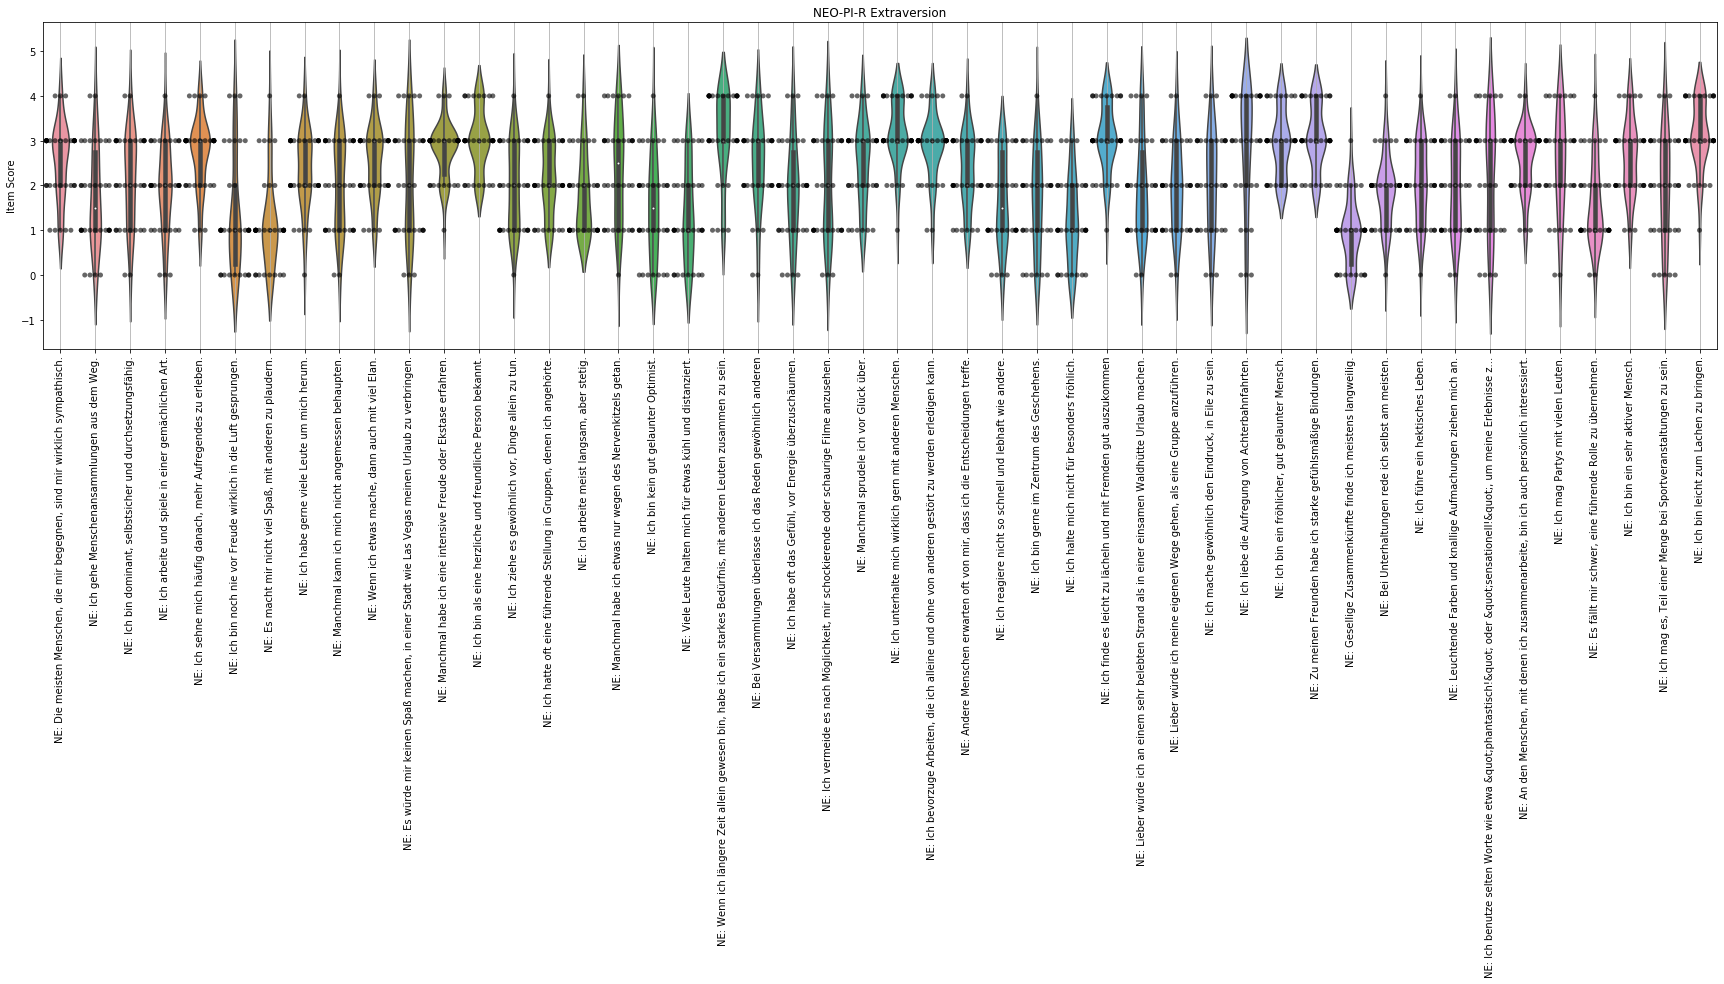

In [28]:
# Initialize figure 
f, ax = plt.subplots(figsize=(30, 6))

# Boxplot bdi
sns.violinplot(data=ne_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=ne_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('NEO-PI-R Extraversion')
f.savefig("/home/michael/Desktop/ne_item_scores_output.png", dpi=300, bbox_inches='tight')

## NEO-PI-R Neuroticism

In [29]:
nn_columns =  []
for i in range(len((data.columns[data.columns.str.contains('NN')]))):
    #print(i)
    nn_column_name = data.columns[data.columns.str.contains('NN')][i]
    #print(bdi_column_name)
    nn_columns.append(nn_column_name)
    
index_nn_columns = []

for i in range(len(data.columns)):
    for j in range(len(nn_columns)):
        if data.columns[i] == nn_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_nn_columns.append(i)
        #else:
            #print('no')

nn_data = data.iloc[:, index_nn_columns[0]:(index_nn_columns[-1] +1)]


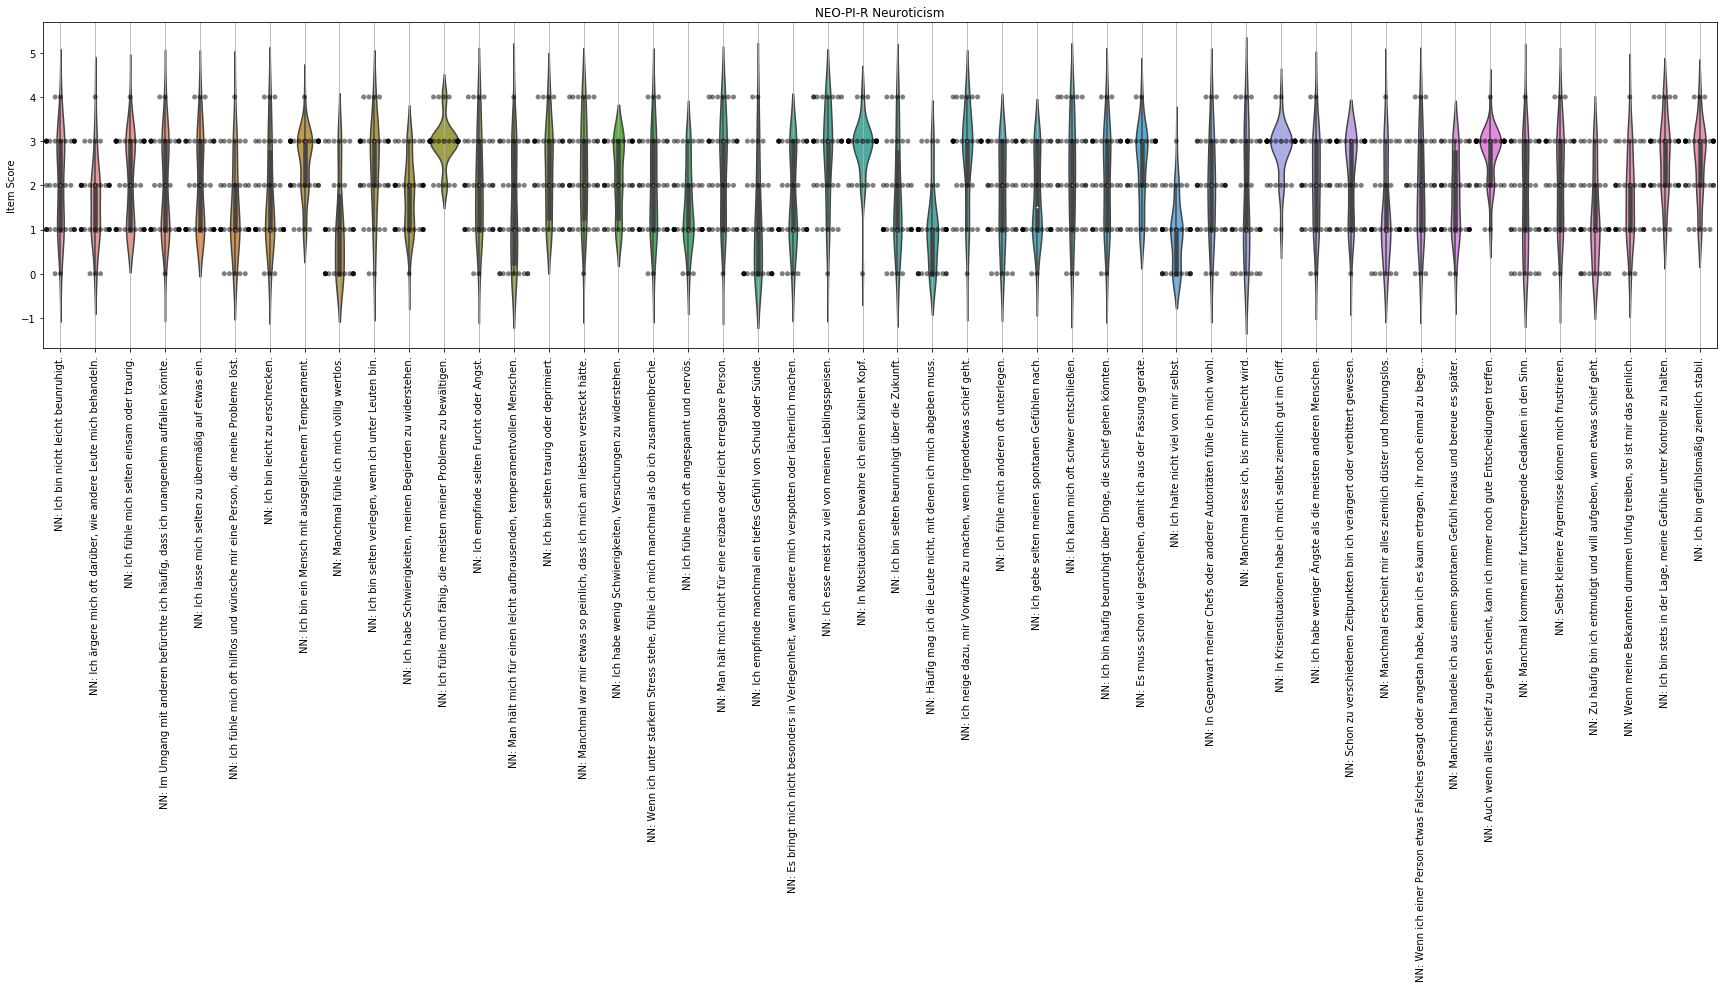

In [30]:
# Initialize figure 
f, ax = plt.subplots(figsize=(30, 6))

# Boxplot bdi
sns.violinplot(data=nn_data, 
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=nn_data, color="black", alpha=0.5)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('NEO-PI-R Neuroticism')

f.savefig("/home/michael/Desktop/nn_item_scores_output.png", dpi=300, bbox_inches='tight')

## NEO-PI-R Agrreableness

In [31]:
na_columns =  []
for i in range(len((data.columns[data.columns.str.contains('NA')]))):
    #print(i)
    na_column_name = data.columns[data.columns.str.contains('NA')][i]
    #print(bdi_column_name)
    na_columns.append(na_column_name)
    
index_na_columns = []

for i in range(len(data.columns)):
    for j in range(len(na_columns)):
        if data.columns[i] == na_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_na_columns.append(i)
        #else:
            #print('no')

na_data = data.iloc[:, index_na_columns[0]:(index_na_columns[-1] +1)]

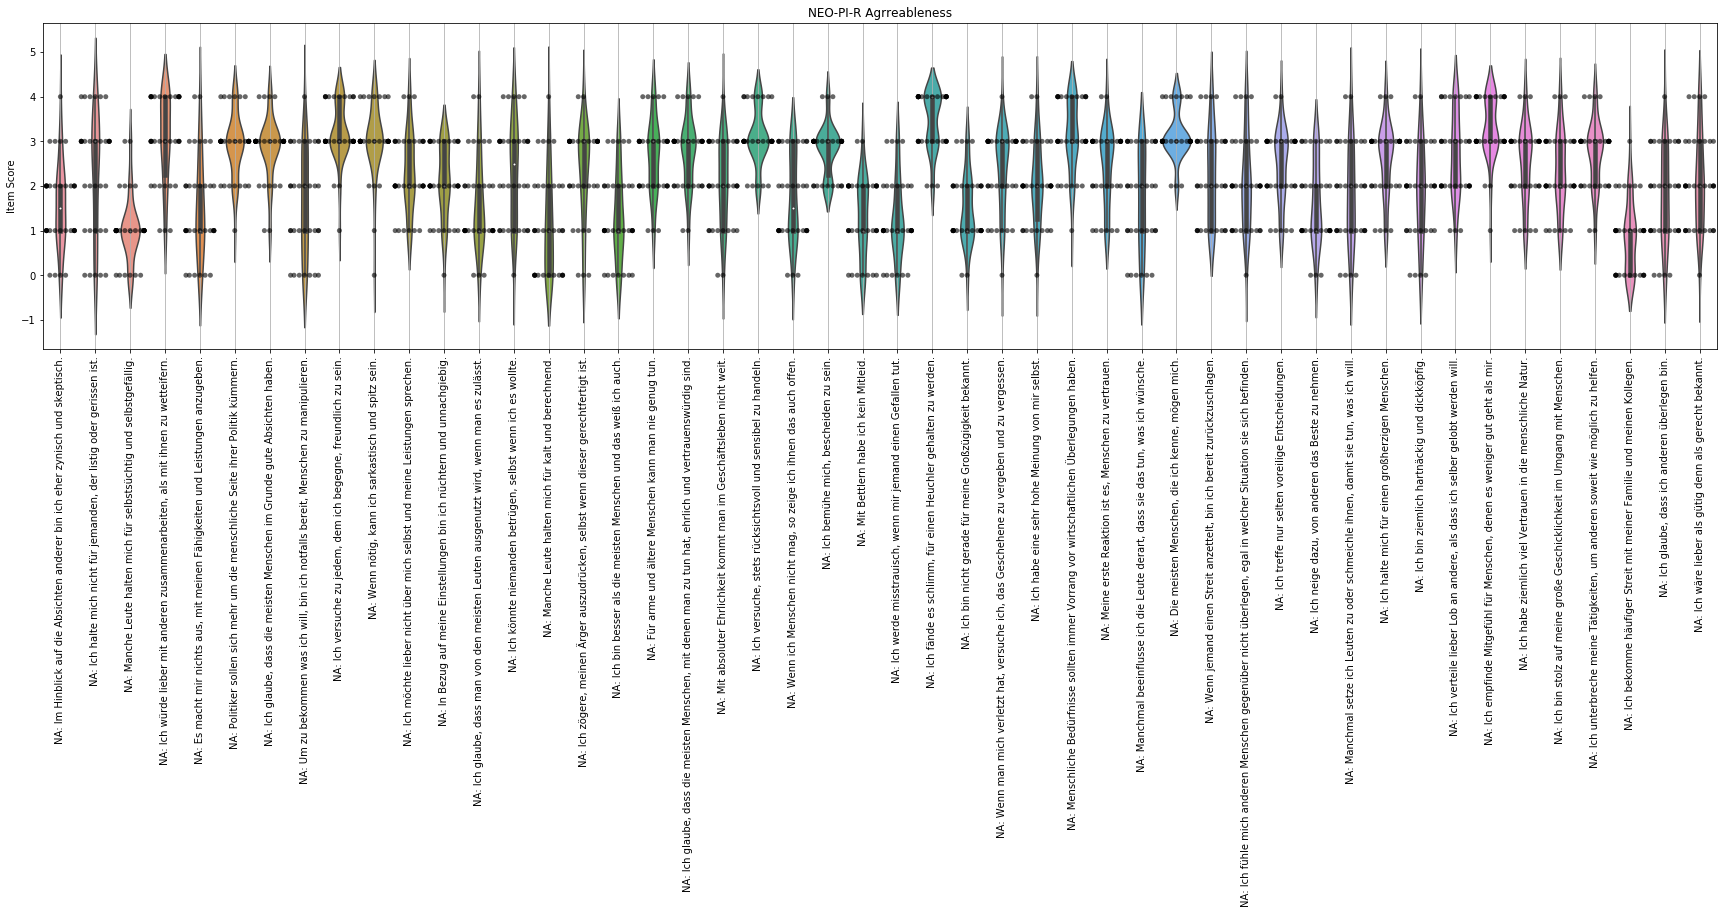

In [32]:
# Initialize figure 
f, ax = plt.subplots(figsize=(30, 6))

# Boxplot bdi
sns.violinplot(data=na_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=na_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('NEO-PI-R Agrreableness')
f.savefig("/home/michael/Desktop/na_item_scores_output.png", dpi=300, bbox_inches='tight')

## MAE - agentic extraversion

In [33]:
mae_columns =  []
for i in range(len((data.columns[data.columns.str.contains('MAE')]))):
    #print(i)
    mae_column_name = data.columns[data.columns.str.contains('MAE')][i]
    #print(bdi_column_name)
    mae_columns.append(mae_column_name)
    
index_mae_columns = []

for i in range(len(data.columns)):
    for j in range(len(mae_columns)):
        if data.columns[i] == mae_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_mae_columns.append(i)
        #else:
            #print('no')

mae_data = data.iloc[:, index_mae_columns[0]:(index_mae_columns[-1] +1)]

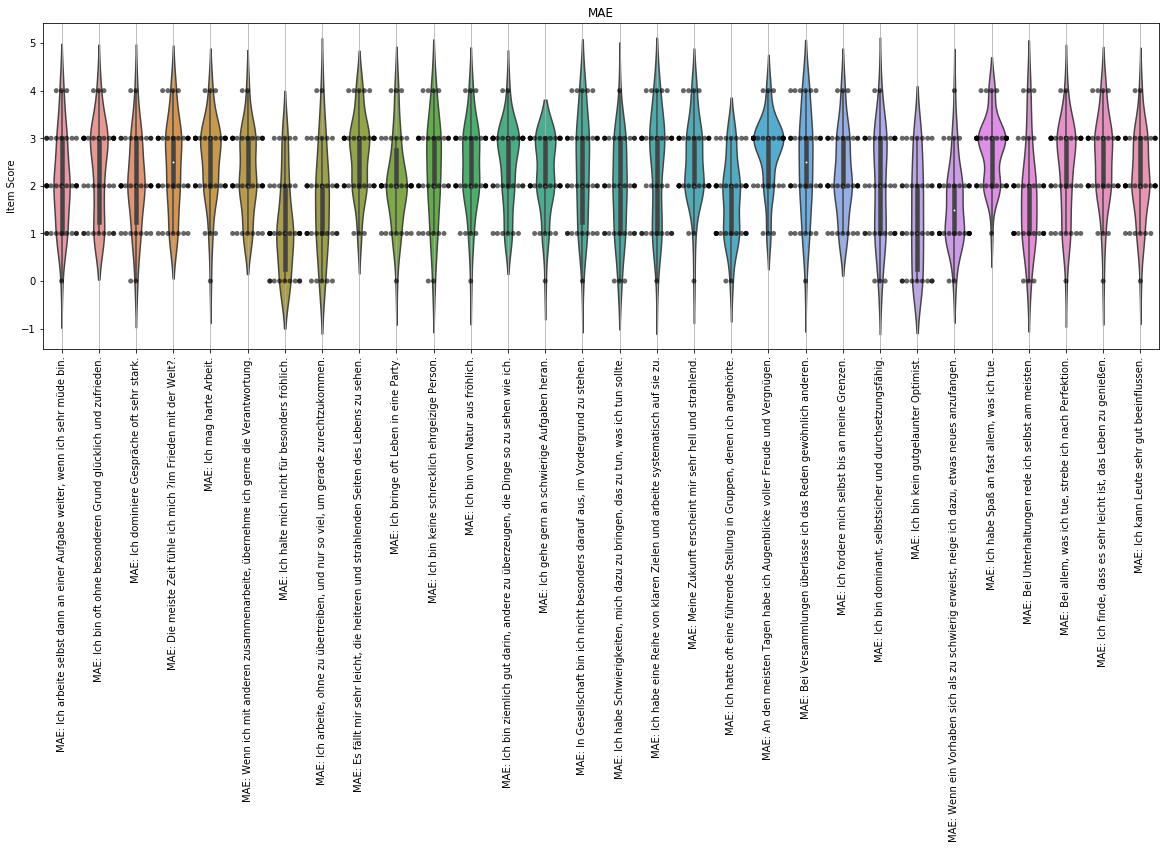

In [34]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

# Boxplot bdi
sns.violinplot(data=mae_data, medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=mae_data, color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
ax.set_title('MAE')
f.savefig("/home/michael/Desktop/mae_item_scores_output.png", dpi=300, bbox_inches='tight')

## MPQ-Social-closeness

In [35]:
# Get Values for MPQ-Social-closeness
# 1 = True; 2 = False

mpq_columns =  []
for i in range(len((dichtomous_questionnaires_data.columns[dichtomous_questionnaires_data.columns.str.contains('MPQ')]))):
    #print(i)
    mpq_column_name = dichtomous_questionnaires_data.columns[dichtomous_questionnaires_data.columns.str.contains('MPQ')][i]
    #print(bdi_column_name)
    mpq_columns.append(mpq_column_name)
    
index_mpq_columns = []

for i in range(len(dichtomous_questionnaires_data.columns)):
    for j in range(len(mpq_columns)):
        if dichtomous_questionnaires_data.columns[i] == mpq_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mpq_columns.append(i)
        #else:
            #print('no')

mpq_data = dichtomous_questionnaires_data.iloc[:, index_mpq_columns[0]:(index_mpq_columns[-1] +1)]

In [36]:
len(mpq_data.columns)

21

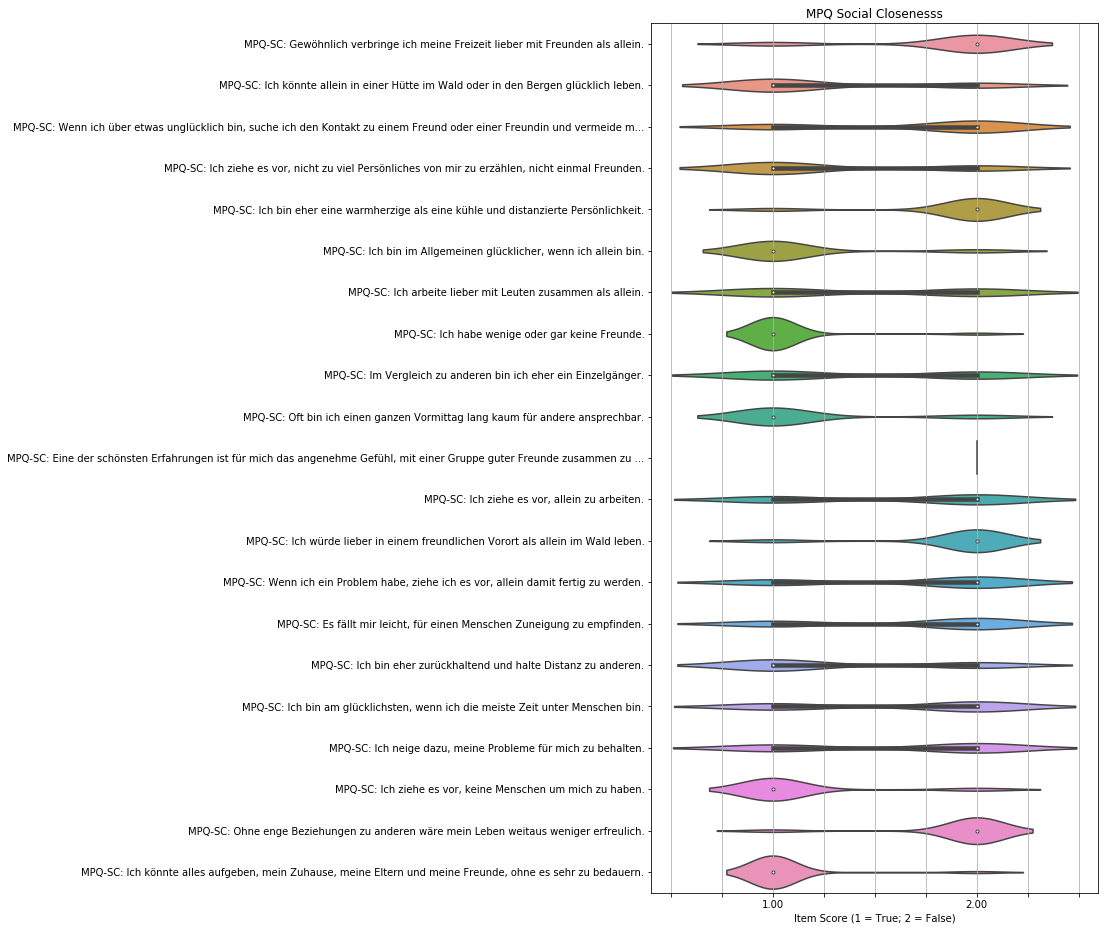

In [37]:
# Initialize figure 
f, ax = plt.subplots(figsize=(8, 16))

# single observations
sns.violinplot(data=mpq_data, alpha=0.6, orient='h')
#sns.swarmplot(data=mpq_data, color="black", alpha=0.6, orient='h')


# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
#ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(xlabel="Item Score (1 = True; 2 = False)")
ax.yaxis.labelpad = 25
ax.set_title('MPQ Social Closenesss')

for ind, label in enumerate(ax.get_xticklabels()):
        if ind == 3:
            label.set_visible(True)
        elif ind == 7:
            label.set_visible(True)
        else:
            label.set_visible(False)

f.savefig("/home/michael/Desktop/mpq_item_scores_output.png", dpi=300, bbox_inches='tight')

## SES-17

In [38]:
# Get Values for SES-17
# 1 = True; 2 = False
ses_columns =  []
for i in range(len((dichtomous_questionnaires_data.columns[dichtomous_questionnaires_data.columns.str.contains('SES')]))):
    #print(i)
    ses_column_name = dichtomous_questionnaires_data.columns[dichtomous_questionnaires_data.columns.str.contains('SES')][i]
    #print(bdi_column_name)
    ses_columns.append(ses_column_name)
    
index_ses_columns = []

for i in range(len(dichtomous_questionnaires_data.columns)):
    for j in range(len(ses_columns)):
        if dichtomous_questionnaires_data.columns[i] == ses_columns[j]:
            #print('si')
            #print(data.columns[i])
            index_ses_columns.append(i)
        #else:
            #print('no')

ses_data = dichtomous_questionnaires_data.iloc[:, index_ses_columns[0]:(index_ses_columns[-1] +1)]


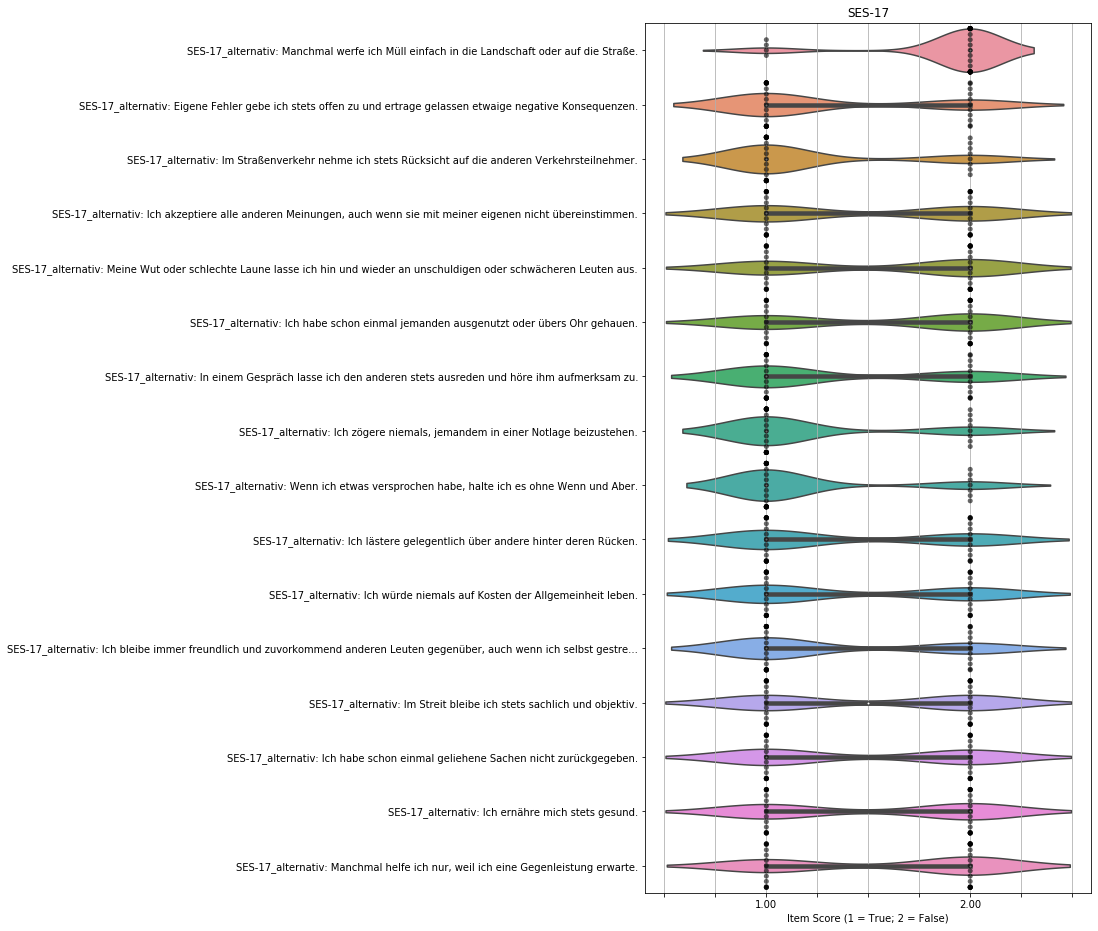

In [39]:
# Initialize figure 
f, ax = plt.subplots(figsize=(8, 16))

# single observations
sns.violinplot(data=ses_data, orient="h")
sns.swarmplot(data=ses_data, color="black", alpha=0.6, orient='h')

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels())
ax.set(xlabel="Item Score (1 = True; 2 = False)")
ax.set_title('SES-17')
for ind, label in enumerate(ax.get_xticklabels()):
        if ind == 3:
            label.set_visible(True)
        elif ind == 7:
            label.set_visible(True)
        else:
            label.set_visible(False)

f.savefig("/home/michael/Desktop/ses_item_scores_output.png", dpi=300, bbox_inches='tight')

## Prepare mood data

In [40]:
mood_data_1 = pd.read_csv('/home/michael/master_thesis/mood/mood_ern_sample_1.tsv', sep='\t')
mood_data_2 = pd.read_csv('/home/michael/master_thesis/mood/mood_ern_sample_2.tsv', sep='\t')

In [41]:
# 10 == baseline condition
# 20 == negtaive condition
# 30 == positive condition
mood_data_1

Code  Wie stark sind die Gefühle Erfolg und Stolz vorhanden?  \
0   1002                                                  4        
1   2002                                                  4        
2   3002                                                  6        
3   1003                                                  7        
4   2003                                                  5        
..   ...                                                ...        
76  2027                                                  3        
77  3027                                                  3        
78  1028                                                  5        
79  2028                                                  8        
80  3028                                                  8        

    Wie stark fühlen Sie sich niedergeschlagen, bedrückt, betrübt und traurig?  \
0                                                   5                            
1                                                   4                            
2                                                   5                            
3                                                   2                            
4                                                   4                            
..                                                ...                            
76                                                  3                            
77                                                  1                            
78                                                  6                            
79                                                  3                            
80                                                  2                            

    Wie stark sind die Gefühle Wärme und Zuneigung vorhanden?  \
0                                                   6           
1                                                   5           
2                                                   4           
3                                                   6           
4                                                   5           
..                                                ...           
76                                                  3           
77                                                  4           
78                                                  5           
79                                                  6           
80                                                  7           

    Wie stark sind die Gefühle Frustration und Enttäuschung vorhanden?  \
0                                                   4                    
1                                                   4                    
2                                                   4                    
3                                                   1                    
4                                                   6                    
..                                                ...                    
76                                                  3                    
77                                                  2                    
78                                                  2                    
79                                                  1                    
80                                                  2                    

    Wie stark fühlen Sie sich fröhlich, freudig, vergnügt und entzückt?  \
0                                                   4                     
1                                                   5                     
2                                                   5                     
3                                                   6                     
4                                                   5                     
..                                                ...                     
76     

In [42]:

mood_data_2_columns =  []
for i in range(len((mood_data_2.columns[mood_data_2.columns.str.contains('Baseline_')]))):
    #print(i)
    mood_data_2_column_name = mood_data_2.columns[mood_data_2.columns.str.contains('Baseline_')][i]
    #print(bdi_column_name)
    mood_data_2_columns.append(mood_data_2_column_name)
    
index_mood_data_2_columns = []

for i in range(len(mood_data_2.columns)):
    for j in range(len(mood_data_2_columns)):
        if mood_data_2.columns[i] == mood_data_2_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mood_data_2_columns.append(i)
        #else:
            #print('no')

mood_data_2_baseline = mood_data_2.iloc[:, index_mood_data_2_columns[0]:(index_mood_data_2_columns[-1] +1)]

In [43]:
# split dataframe by column name
mood_data_2_columns =  []
for i in range(len((mood_data_2.columns[mood_data_2.columns.str.contains('Baseline_')]))):
    #print(i)
    mood_data_2_column_name = mood_data_2.columns[mood_data_2.columns.str.contains('Baseline_')][i]
    #print(bdi_column_name)
    mood_data_2_columns.append(mood_data_2_column_name)
    
index_mood_data_2_columns = []

for i in range(len(mood_data_2.columns)):
    for j in range(len(mood_data_2_columns)):
        if mood_data_2.columns[i] == mood_data_2_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mood_data_2_columns.append(i)
        #else:
            #print('no')

mood_data_2_baseline = mood_data_2.iloc[:, index_mood_data_2_columns[0]:(index_mood_data_2_columns[-1] +1)]

# fit column names into norm
for i in mood_data_2_baseline.columns:
    print(i.split('_')[1]) 

# add vpn-code 
for idx, i in enumerate(mood_data_2_baseline.columns):
    #print(i.split('_')[1])
    #print(idx)
    mood_data_2_baseline = mood_data_2_baseline.rename(columns={i: i.split('_')[1]})
    
mood_data_2_baseline['condition'] = [str('baseline') for i in range(len(mood_data_2_baseline))]
mood_data_2_baseline['code'] = [i+29+1000 for i in range(len(mood_data_2_baseline))]
mood_data_2_baseline = mood_data_2_baseline.rename(columns={'Interesse':'gleichgueltig vs. interesse',
                                          'Motivation':'gelangweilt vs. motiviert',
                                          'Angenehm':'unangenehm vs. angenehm',
                                          'Valenz':'negativ vs. positiv',
                                          'Anspannung':'entspannt vs. angespannt',
                                          'Nervosität':'ruhig vs. nervoes'})

Erfolg
Stolz
Wärme
Zuneigung
Frustration
Enttäuschung
Ärger
Wut
Trauer
Niedergeschlagenheit
Fröhlichkeit
Freude
Peinlichkeit
Interesse
Motivation
Angenehm
Valenz
Anspannung
Nervosität
Erwartung


In [44]:
# split dataframe by column name
mood_data_2_columns =  []
for i in range(len((mood_data_2.columns[mood_data_2.columns.str.contains('Neg_')]))):
    #print(i)
    mood_data_2_column_name = mood_data_2.columns[mood_data_2.columns.str.contains('Neg_')][i]
    #print(bdi_column_name)
    mood_data_2_columns.append(mood_data_2_column_name)
    
index_mood_data_2_columns = []

for i in range(len(mood_data_2.columns)):
    for j in range(len(mood_data_2_columns)):
        if mood_data_2.columns[i] == mood_data_2_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mood_data_2_columns.append(i)
        #else:
            #print('no')

mood_data_2_neg = mood_data_2.iloc[:, index_mood_data_2_columns[0]:(index_mood_data_2_columns[-1] +1)]

# fit column names into norm and add vpn-code 
for idx, i in enumerate(mood_data_2_neg.columns):
    #print(i.split('_')[1])
    #print(idx)
    mood_data_2_neg = mood_data_2_neg.rename(columns={i: i.split('_')[1]})

mood_data_2_neg['condition'] = [str('negative') for i in range(len(mood_data_2_baseline))]
mood_data_2_neg['code'] = [i+29+2000 for i in range(len(mood_data_2_neg))]
mood_data_2_neg = mood_data_2_neg.rename(columns={'Interesse':'gleichgueltig vs. interesse',
                                          'Motivation':'gelangweilt vs. motiviert',
                                          'Angenehm':'unangenehm vs. angenehm',
                                          'Valenz':'negativ vs. positiv',
                                          'Anspannung':'entspannt vs. angespannt',
                                          'Nervosität':'ruhig vs. nervoes'})

In [45]:
# split dataframe by column name
mood_data_2_columns =  []
for i in range(len((mood_data_2.columns[mood_data_2.columns.str.contains('Pos_')]))):
    #print(i)
    mood_data_2_column_name = mood_data_2.columns[mood_data_2.columns.str.contains('Pos_')][i]
    #print(bdi_column_name)
    mood_data_2_columns.append(mood_data_2_column_name)
    
index_mood_data_2_columns = []

for i in range(len(mood_data_2.columns)):
    for j in range(len(mood_data_2_columns)):
        if mood_data_2.columns[i] == mood_data_2_columns[j]:
            #print('si')
            #print(dichtomous_questionnaires_data.columns[i])
            index_mood_data_2_columns.append(i)
        #else:
            #print('no')

mood_data_2_pos = mood_data_2.iloc[:, index_mood_data_2_columns[0]:(index_mood_data_2_columns[-1] +1)]

# fit column names into norm and add vpn-code 
for idx, i in enumerate(mood_data_2_pos.columns):
    #print(i.split('_')[1])
    #print(idx)
    mood_data_2_pos = mood_data_2_pos.rename(columns={i: i.split('_')[1]})

mood_data_2_pos['condition'] = [str('positive') for i in range(len(mood_data_2_baseline))]
mood_data_2_pos['code'] = [i+29+3000 for i in range(len(mood_data_2_pos))]
mood_data_2_pos = mood_data_2_pos.rename(columns={'Interesse':'gleichgueltig vs. interesse',
                                          'Motivation':'gelangweilt vs. motiviert',
                                          'Angenehm':'unangenehm vs. angenehm',
                                          'Valenz':'negativ vs. positiv',
                                          'Anspannung':'entspannt vs. angespannt',
                                          'Nervosität':'ruhig vs. nervoes'})



In [46]:
mood_data_2_long_form = pd.concat([mood_data_2_baseline, mood_data_2_neg, mood_data_2_pos], ignore_index=True)

In [47]:
mood_data_2_long_form.sort_values(by=['code'])

Erfolg  Stolz  Wärme  Zuneigung  Frustration  Enttäuschung  Ärger  Wut  \
0        7      6      6          6            4             6      1    1   
1        5      3      6          2            5             2      1    1   
2        7      4      3          1            6             4      1    1   
3        3      3      4          4            1             1      1    1   
4        3      3      3          3            5             4      8    3   
5        7      7      4          7            4             2      1    1   
6        7      3      5          5            3             3      2    2   
7        7      6      5          1            1             1      1    1   
8        7      8      1          3            6             1      2    1   
9        7      8      7          8            4             4      3    4   
10       5      4      4          4            1             1      1    1   
11       6      6      6          5            1             4      2    1   
12       5      5      4          2            2             1      2    1   
13       5      5      2          1            5             6      5    2   
14       4      4      6          6            2             2      2    1   
15       3      2      2          3            5             4      3    2   
16       6      6      4          7            4             2      1    1   
17       6      3      5          5            4             3      2    2   
18       9      7      7          6            1             1      1    1   
19       6      3      1          1            3             7      6    3   
20       8      8      8          8            3             3      3    3   
21       6      4      4          3            1             1      1    1   
22       7      7      6          7            5             4      1    1   
23       7      4      3          2            2             2      2    1   
24       6      6      3          1            8             7      3    1   
25       3      3      4          4            3             3      1    1   
26       2      2      3          3            4             4      5    1   
27       6      7      4          7            1             1      1    1   
28       7      2      5          6            4             3      2    1   
29       9      7      8          6            1             1      1    1   
30       7      6      1          3            6             6      5    2   
31       8      8      8          8            3             3      3    3   
32       4      4      4          3            2             2      2    1   

    Trauer  Niedergeschlagenheit  ...  Peinlichkeit  \
0        1                     2  ...             2   
1        1                     2  ...             2   
2        1                     2  ...             4   
3        1                     1  ...             1   
4        3                     5  ...             6   
5        1                     1  ...             1   
6        2                     2  ...             2   
7        1                     1  ...             1   
8        5                     2  ...             1   
9        3                     2  ...             3   
10       1                     1  ...             1   
11       1                     2  ...             2   
12       1                     2  ...             4   
13       1                     2  ...             7   
14       1                     2  ...             1   
15       3                     3  ...             7   
16       1                     2  ...             1   
17       2                     2  ...             2   
18       1                     1  ...             1   
19       1                     1  ...             2   
20       3                     3  ...             3   
21       1                     1  ...             1   
22       1                     2  ...             2   
23       1                     

In [48]:
mood_data_2_long_form.columns

Index(['Erfolg', 'Stolz', 'Wärme', 'Zuneigung', 'Frustration', 'Enttäuschung',
       'Ärger', 'Wut', 'Trauer', 'Niedergeschlagenheit', 'Fröhlichkeit',
       'Freude', 'Peinlichkeit', 'gleichgueltig vs. interesse',
       'gelangweilt vs. motiviert', 'unangenehm vs. angenehm',
       'negativ vs. positiv', 'entspannt vs. angespannt', 'ruhig vs. nervoes',
       'Erwartung', 'condition', 'code'],
      dtype='object')

In [49]:
mood_data_2_long_form = mood_data_2_long_form.rename(columns={'Interesse':'gleichgueltig vs. interesse',
                                          'Motivation':'gelangweilt vs. motiviert',
                                          'Angenehm':'unangenehm vs. angenehm',
                                          'Valenz':'negativ vs. positiv',
                                          'Anspannung':'entspannt vs. angespannt',
                                          'Nervosität':'ruhig vs. nervoes'})


In [50]:
mood_data_2_long_form.to_csv('/home/michael/master_thesis/mood/mood_data_sample2.tsv', sep='\t', index=False)

## Plot Mood Data for Sample 2

[Text(0, 0.5, 'Item Score')]

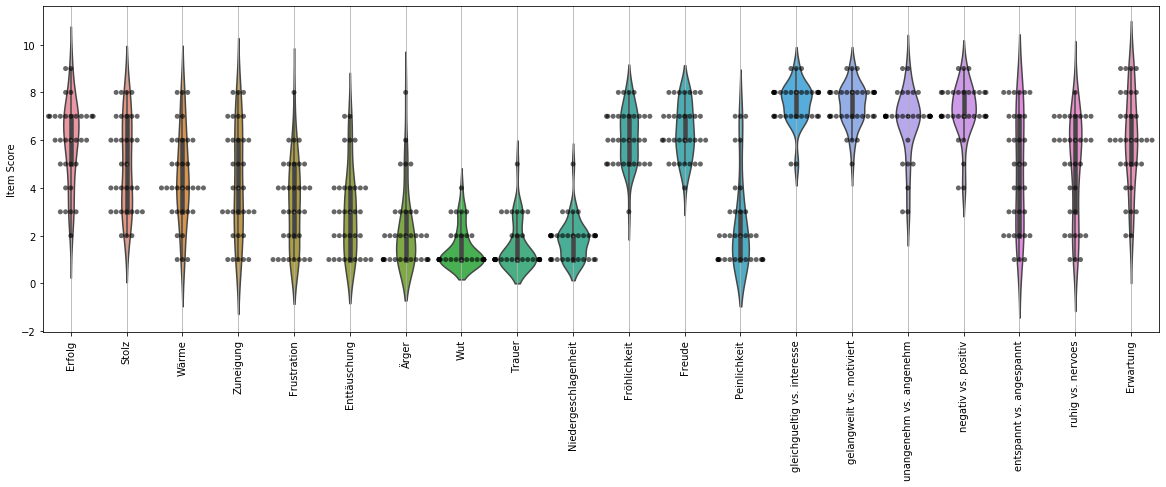

In [51]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

# Boxplot bdi
sns.violinplot(data=mood_data_2_long_form.iloc[: , :-1],
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))

# single observations
sns.swarmplot(data=mood_data_2_long_form.iloc[: , :-2], color="black", alpha=0.6)

# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")
#ax.set_title('MAE')


[Text(0, 0.5, 'Item Score')]

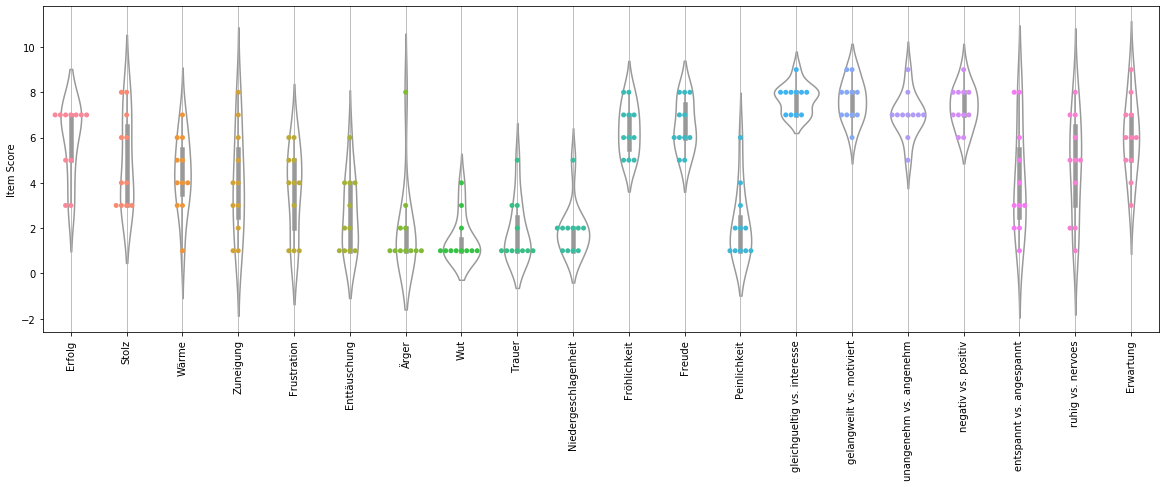

In [52]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

# Boxplot
sns.violinplot(data=mood_data_2_baseline.iloc[: , :-2], color='white',
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2))
sns.swarmplot(data=mood_data_2_baseline.iloc[: , :-2])
# adding transparency to colors
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .8))

# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set(ylabel="Item Score")

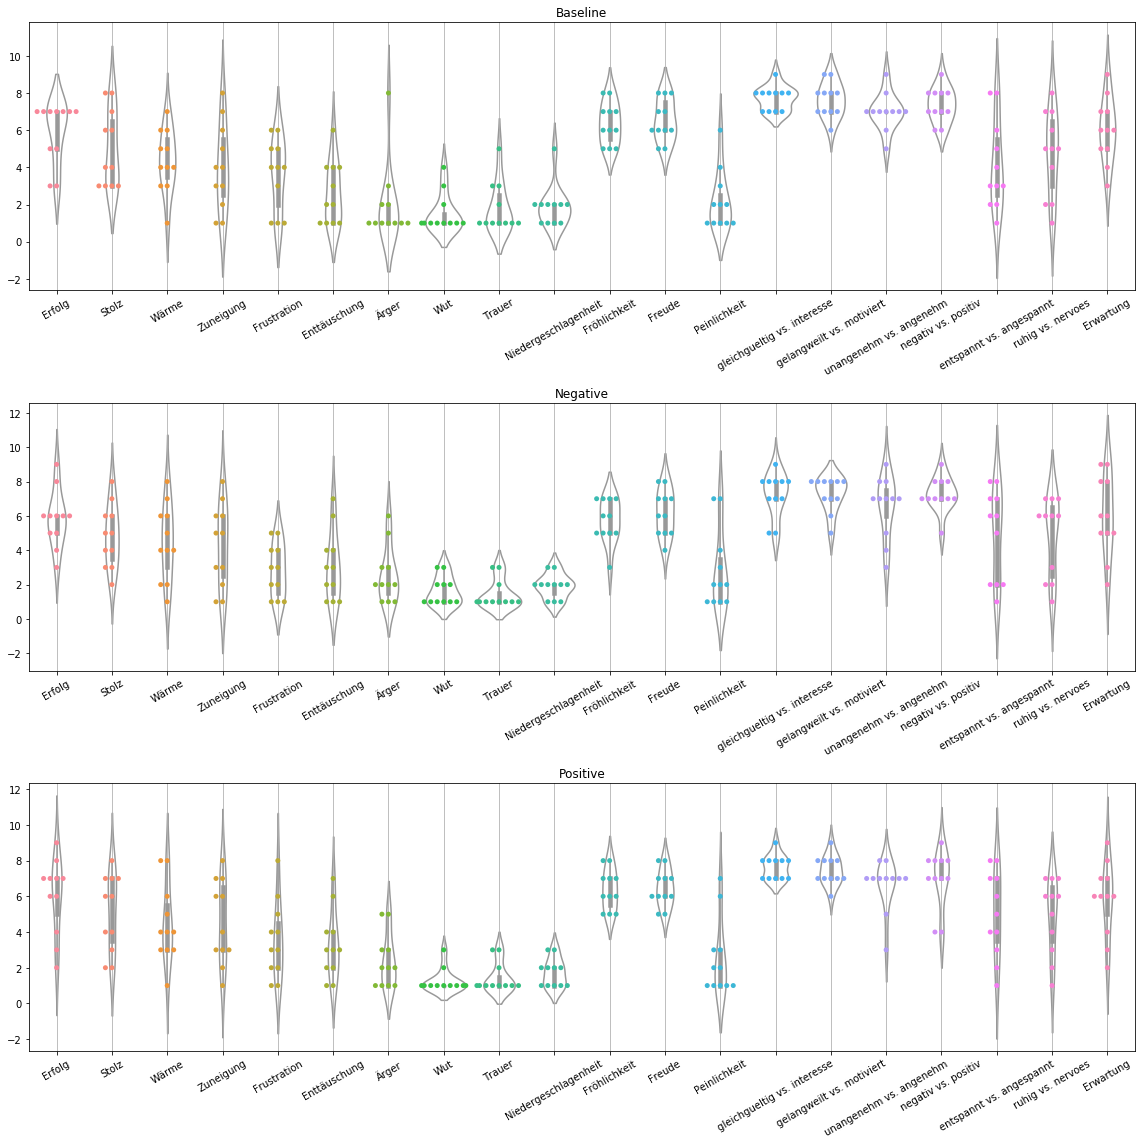

In [53]:
f, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(16,16))

ax1.set_title("Baseline")  # remove y label, but keep ticks
sns.violinplot(data=mood_data_2_baseline.iloc[: , :-2], ax=ax1, color='white')
sns.swarmplot(data=mood_data_2_baseline.iloc[: , :-2], ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 30)
ax1.xaxis.grid(True)
#sns.swarmplot(x="feedback", y="similarity_score", data=df[df.nlp_model=='tfidf'], color="0.25", ax=ax1)

sns.violinplot(data=mood_data_2_neg.iloc[: , :-2], ax=ax2, color='white')
sns.swarmplot(data=mood_data_2_neg.iloc[: , :-2], ax=ax2)
ax2.set_title("Negative")  # remove y label, but keep ticks
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 30)
ax2.xaxis.grid(True)

ax3.set_title("Positive")  # remove y label, but keep ticks
sns.violinplot(data=mood_data_2_pos.iloc[: , :-2], ax=ax3, color='white')
sns.swarmplot(data=mood_data_2_pos.iloc[: , :-2], ax=ax3)
#sns.swarmplot(x="feedback", y="similarity_score", data=df[df.nlp_model=='doc2vec'], color="0.25", ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 30)
ax3.xaxis.grid(True)

plt.tight_layout()

plt.show()
f.savefig("/home/michael/Desktop/mood_scores_sample_2_output.png", dpi=300, bbox_inches='tight')

## Plot Mood Data for Sample 1

In [54]:
# rename columns
mood_data_1 = mood_data_1.rename(columns={'Code':'code', 'Bedinung':'condition'})
mood_data_1 = mood_data_1.rename(columns={'Wie stark sind die Gefühle Erfolg und Stolz vorhanden?':'erfolg_stolz',
                                          'Wie stark fühlen Sie sich niedergeschlagen, bedrückt, betrübt und traurig?':'niedergeschlagen_bedrueckt_betruebt_traurig',
                                          'Wie stark sind die Gefühle Wärme und Zuneigung vorhanden?':'waerme_zuneigung',
                                          'Wie stark sind die Gefühle Frustration und Enttäuschung vorhanden?':'frustration_enttaeuschung',
                                          'Wie stark fühlen Sie sich fröhlich, freudig, vergnügt und entzückt?':'froehlich_freudig_vergnuegt_entzueckt',
                                          'Wie stark fühlen Sie sich peinlich berührt?':'peinlich',
                                          'Wie stark sind die Gefühle Ärger und Wut vorhanden?':'aerger_wut',
                                          'Bitte schätzen Sie ein, wie Sie im nächsten Durchlauf der Aufgabe abschneiden werden?':'erwartung',
                                          'Bitte ordnen Sie ein, welche Gefühle am ehesten vorhanden sind.Lustlos/neugierig':'lustlos vs. neugierig',
                                          'Bitte ordnen Sie ein, welche Gefühle am ehesten vorhanden sind. Unangenehm/angenehm':'unangenehm vs. angenehm',
                                          'Bitte ordnen Sie ein, welche Gefühle am ehesten vorhanden sind. Entspannt/ angespannt --> umkodiert':'entspannt vs. angespannt',})

In [55]:
mood_data_1

code  erfolg_stolz  niedergeschlagen_bedrueckt_betruebt_traurig  \
0   1002             4                                            5   
1   2002             4                                            4   
2   3002             6                                            5   
3   1003             7                                            2   
4   2003             5                                            4   
..   ...           ...                                          ...   
76  2027             3                                            3   
77  3027             3                                            1   
78  1028             5                                            6   
79  2028             8                                            3   
80  3028             8                                            2   

    waerme_zuneigung  frustration_enttaeuschung  \
0                  6                          4   
1                  5                          4   
2                  4                          4   
3                  6                          1   
4                  5                          6   
..               ...                        ...   
76                 3                          3   
77                 4                          2   
78                 5                          2   
79                 6                          1   
80                 7                          2   

    froehlich_freudig_vergnuegt_entzueckt  peinlich  aerger_wut  erwartung  \
0                                       4         1           6          6   
1                                       5         6           5          5   
2                                       5         6           4          6   
3                                       6         1           2          7   
4                                       5         1           1          5   
..                                    ...       ...         ...        ...   
76                                      5         1           2          8   
77                                      5         1           1          7   
78                                      7         1           1          7   
79                                      7         1           1          8   
80                                      7         1           1          8   

   lustlos vs. neugierig unangenehm vs. angenehm entspannt vs. angespannt  \
0                      7                       7                        4   
1                      4                       5                        5   
2                      6                       5                        6   
3                      7                       8                        7   
4                      5                       6                        7   
..                   ...                     ...                      ...   
76                     5                       6                        2   
77                     5                       6                        2   
78                     7                       6                        7   
79                     8                       9                        4   
80                     8                       9                        4   

   condition  
0       solo  
1        neg  
2        pos  
3       solo  
4        neg  
..       ...  
76       neg  
77       pos  
78      solo  
79       neg  
80       pos  

[81 rows x 13 columns]

In [56]:
# rename conditions
for idx, i in enumerate(mood_data_1['condition']):
    if i == 'solo':
        print('asffffffffffff')
        mood_data_1['condition'][idx] = 'baseline'
    elif i == 'neg':
        mood_data_1['condition'][idx] = 'negative'
    elif i == 'pos':
        mood_data_1['condition'][idx] = 'positive'
        

asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff
asffffffffffff


/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/home/michael/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [57]:
mood_data_1.to_csv('/home/michael/master_thesis/mood/mood_data_sample1.tsv', sep='\t', index=False)

In [58]:
mood_data_1['condition']

0     baseline
1     negative
2     positive
3     baseline
4     negative
        ...   
76    negative
77    positive
78    baseline
79    negative
80    positive
Name: condition, Length: 81, dtype: object

In [59]:
# split dataframe by condition
grouped = mood_data_1.groupby(mood_data_1.condition)

mood_data_1_baseline = grouped.get_group("baseline")
mood_data_1_neg = grouped.get_group("negative")
mood_data_1_pos = grouped.get_group("positive")

In [60]:
mood_data_1_baseline.columns

Index(['code', 'erfolg_stolz', 'niedergeschlagen_bedrueckt_betruebt_traurig',
       'waerme_zuneigung', 'frustration_enttaeuschung',
       'froehlich_freudig_vergnuegt_entzueckt', 'peinlich', 'aerger_wut',
       'erwartung', 'lustlos vs. neugierig', 'unangenehm vs. angenehm',
       'entspannt vs. angespannt', 'condition'],
      dtype='object')

In [61]:
 mood_data_1_baseline.isnull().values.any()

False

In [62]:
# subject 6 has 3 nan in the last three items so drop
mood_data_1_baseline = mood_data_1_baseline.drop([12])
mood_data_1_neg = mood_data_1_neg.drop([13])
mood_data_1_pos = mood_data_1_pos.drop([14])

In [63]:
mood_data_1_baseline

code  erfolg_stolz  niedergeschlagen_bedrueckt_betruebt_traurig  \
0   1002             4                                            5   
3   1003             7                                            2   
6   1004             7                                            1   
9   1005             1                                            1   
15  1007             7                                            2   
18  1008             5                                            6   
21  1009             4                                            1   
24  1010             5                                            3   
27  1011             7                                            1   
30  1012             6                                            2   
33  1013             6                                            3   
36  1014             6                                            1   
39  1015             5                                            2   
42  1016             5                                            1   
45  1017             6                                            1   
48  1018             7                                            2   
51  1019             6                                            2   
54  1020             3                                            1   
57  1021             7                                            5   
60  1022             3                                            1   
63  1023             7                                            2   
66  1024             3                                            3   
69  1025             6                                            2   
72  1026             5                                            2   
75  1027             3                                            2   
78  1028             5                                            6   

    waerme_zuneigung  frustration_enttaeuschung  \
0                  6                          4   
3                  6                          1   
6                  7                          1   
9                  2                          1   
15                 8                          2   
18                 1                          1   
21                 3                          1   
24                 3                          2   
27                 5                          1   
30                 6                          2   
33                 8                          1   
36                 6                          1   
39                 7                          3   
42                 4                          1   
45                 3                          1   
48                 5                          1   
51                 5                          5   
54                 3                          1   
57                 8                          7   
60                 1                          1   
63                 6                          3   
66                 4                          1   
69                 6                          3   
72                 3                          1   
75                 4                          2   
78                 5                          2   

    froehlich_freudig_vergnuegt_entzueckt  peinlich  aerger_wut  erwartung  \
0                                       4         1           6          6   
3                                       6         1           2          7   
6                                       5         1           1          8   
9                                       5         1           1          5   
15                                      7         1           1          6   
18                                      5         1           1          5   
21                                      6         1           1          5   
24                                      5         2           1          6   
27    

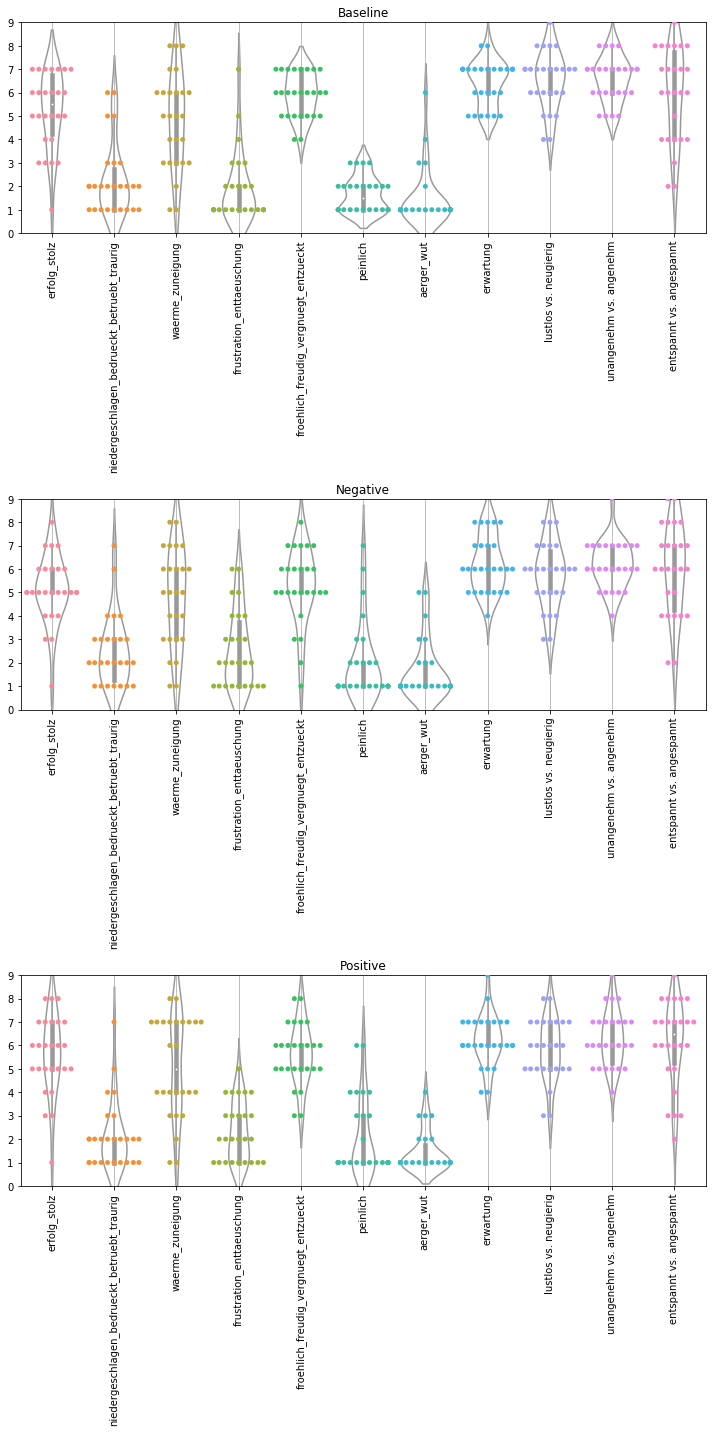

In [64]:
fig1, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(10,20))

ax1.set_title("Baseline")  # remove y label, but keep ticks
sns.violinplot(data=mood_data_1_baseline.iloc[: , 1:-1], ax=ax1, color='white')
sns.swarmplot(data=mood_data_1_baseline.iloc[: ,1:-1], ax=ax1)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax1.set_ylim([0,9])
ax1.xaxis.grid(True)

sns.violinplot(data=mood_data_1_neg.iloc[: , 1:-1], ax=ax2, color='white')
sns.swarmplot(data=mood_data_1_neg.iloc[: ,1:-1], ax=ax2)
ax2.set_title("Negative")  # remove y label, but keep ticks
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
ax2.set_ylim([0,9])
ax2.xaxis.grid(True)

ax3.set_title("Positive")  # remove y label, but keep ticks
sns.violinplot(data=mood_data_1_pos.iloc[: , 1:-1], ax=ax3, color='white')
sns.swarmplot(data=mood_data_1_pos.iloc[: , 1:-1], ax=ax3)
ax3.set_xticklabels(ax3.get_xticklabels(),rotation = 90)
ax3.set_ylim([0,9])
ax3.xaxis.grid(True)

plt.tight_layout()

plt.show()
fig1.savefig("/home/michael/Desktop/mood_scores_sample_1_output.png", dpi=300, bbox_inches='tight')

## Calculate Correlations between mood items

In [65]:
# get correlation matrix for each mood item per sample per condition
mood_data_1_baseline_corr_matrix = mood_data_1_baseline.iloc[1:,1:].corr(method='spearman')
mood_data_1_neg_corr_matrix = mood_data_1_neg.iloc[1:,1:].corr(method='spearman')
mood_data_1_pos_corr_matrix = mood_data_1_pos.iloc[1:,1:].corr(method='spearman')
mood_data_2_baseline_corr_matrix = mood_data_2_baseline.iloc[:-1,:-1].corr(method='spearman')
mood_data_2_neg_corr_matrix = mood_data_2_neg.iloc[:-1,:-1].corr(method='spearman')
mood_data_2_pos_corr_matrix = mood_data_2_pos.iloc[:-1,:-1].corr(method='spearman')

In [66]:
mood_data_2_neg_corr_matrix.columns

Index(['Erfolg', 'Stolz', 'Wärme', 'Zuneigung', 'Frustration', 'Enttäuschung',
       'Ärger', 'Wut', 'Trauer', 'Niedergeschlagenheit', 'Fröhlichkeit',
       'Freude', 'Peinlichkeit', 'gleichgueltig vs. interesse',
       'gelangweilt vs. motiviert', 'unangenehm vs. angenehm',
       'negativ vs. positiv', 'entspannt vs. angespannt', 'ruhig vs. nervoes',
       'Erwartung'],
      dtype='object')

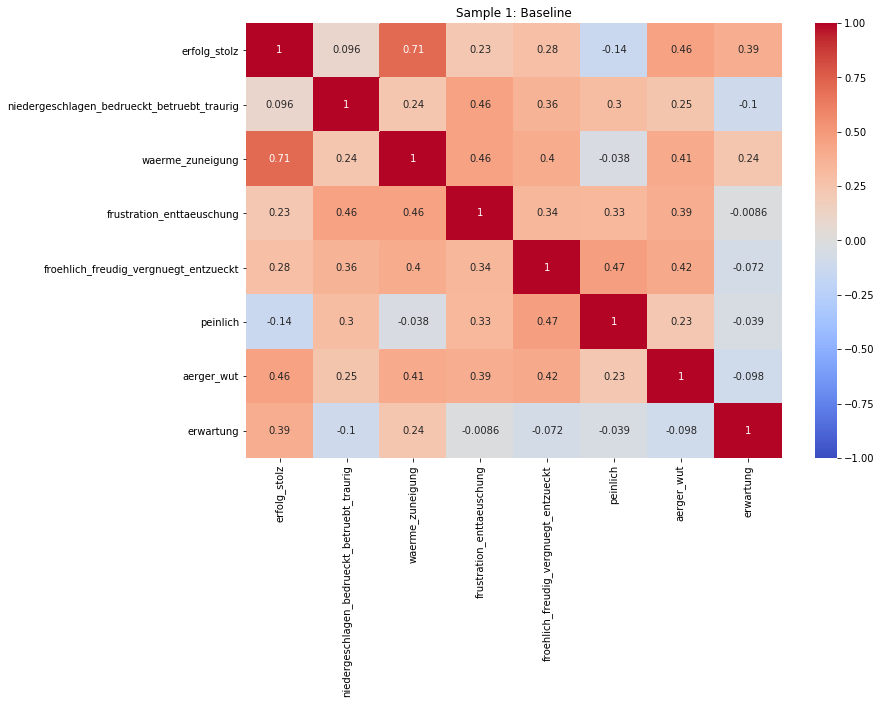

In [67]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(mood_data_1_baseline_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 1: Baseline')
sns_plot.figure.savefig("/home/michael/Desktop/sample1_baseline_corr.png", dpi=300, bbox_inches='tight')

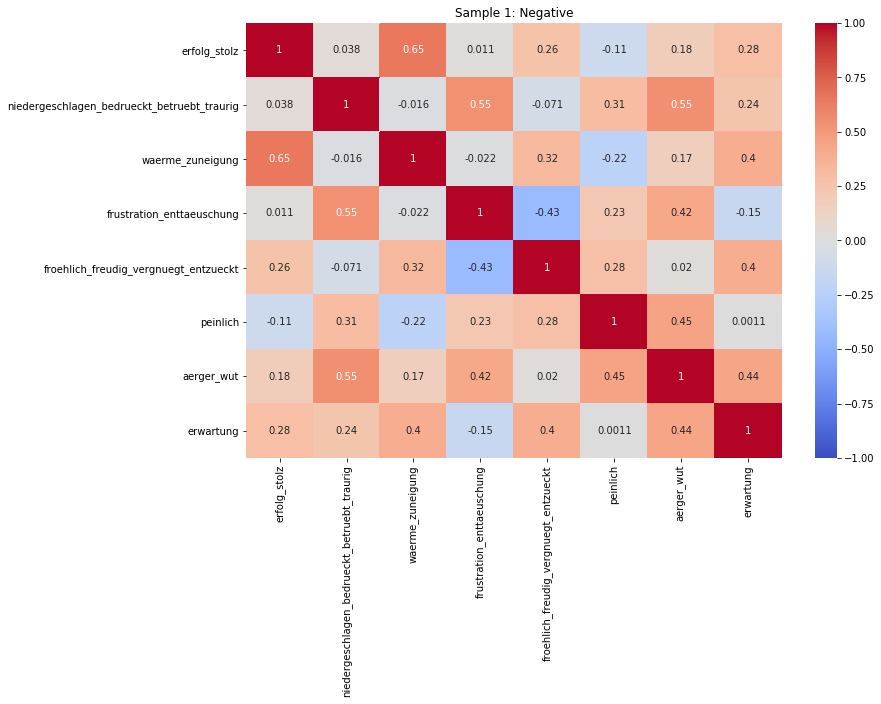

In [68]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(mood_data_1_neg_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 1: Negative')
sns_plot.figure.savefig("/home/michael/Desktop/sample1_neg_corr.png", dpi=300, bbox_inches='tight')

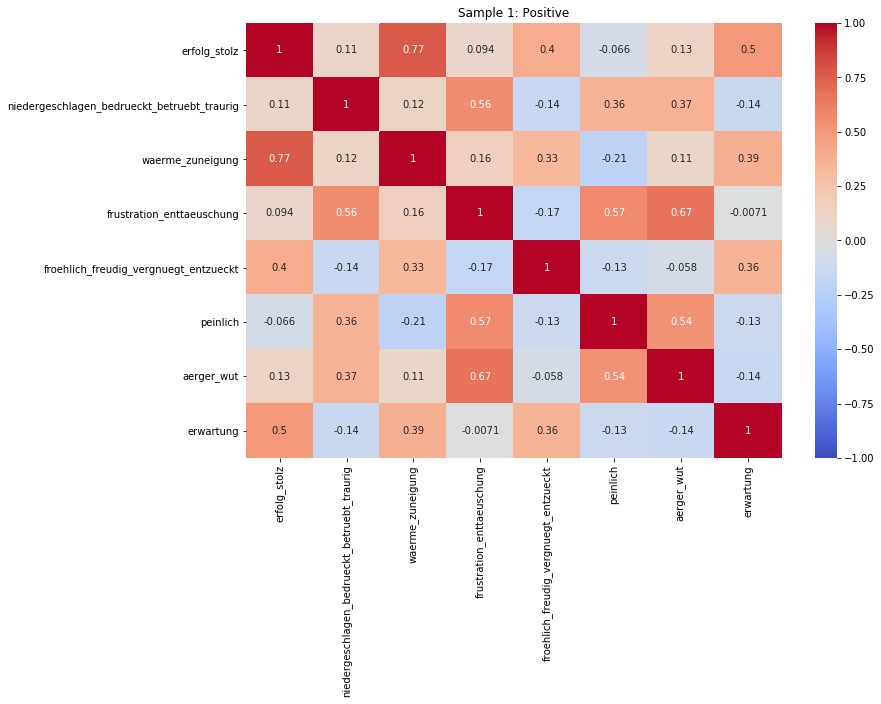

In [69]:
plt.figure(figsize=(12,8))
sns_plot = sns.heatmap(mood_data_1_pos_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 1: Positive')
sns_plot.figure.savefig("/home/michael/Desktop/sample1_pos_corr.png", dpi=300, bbox_inches='tight')

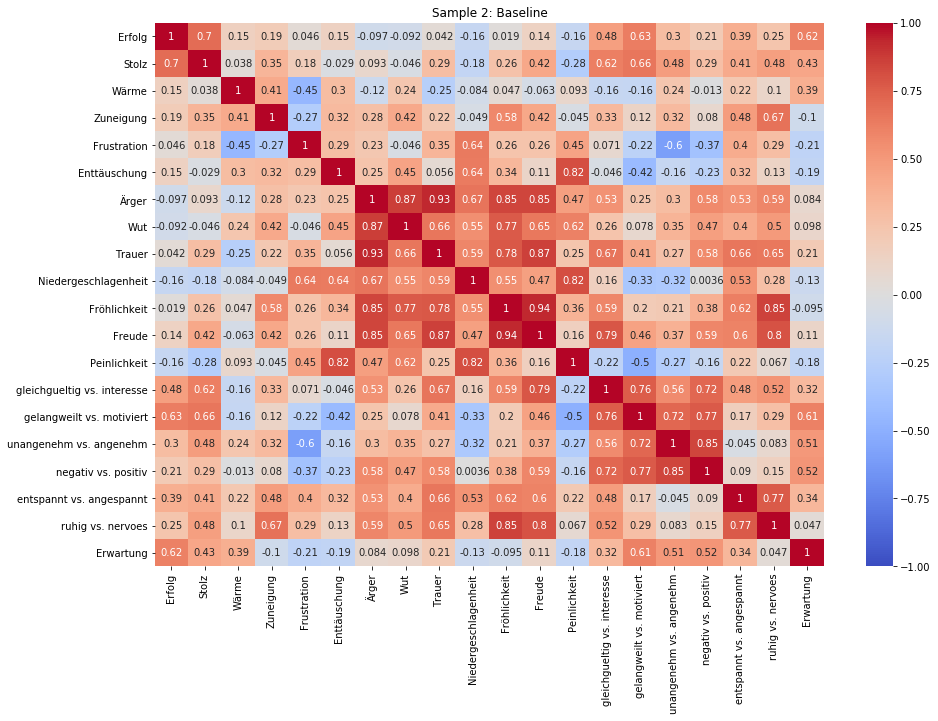

In [70]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(mood_data_2_baseline_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 2: Baseline')
sns_plot.figure.savefig("/home/michael/Desktop/sample2_baseline_corr.png", dpi=300, bbox_inches='tight')

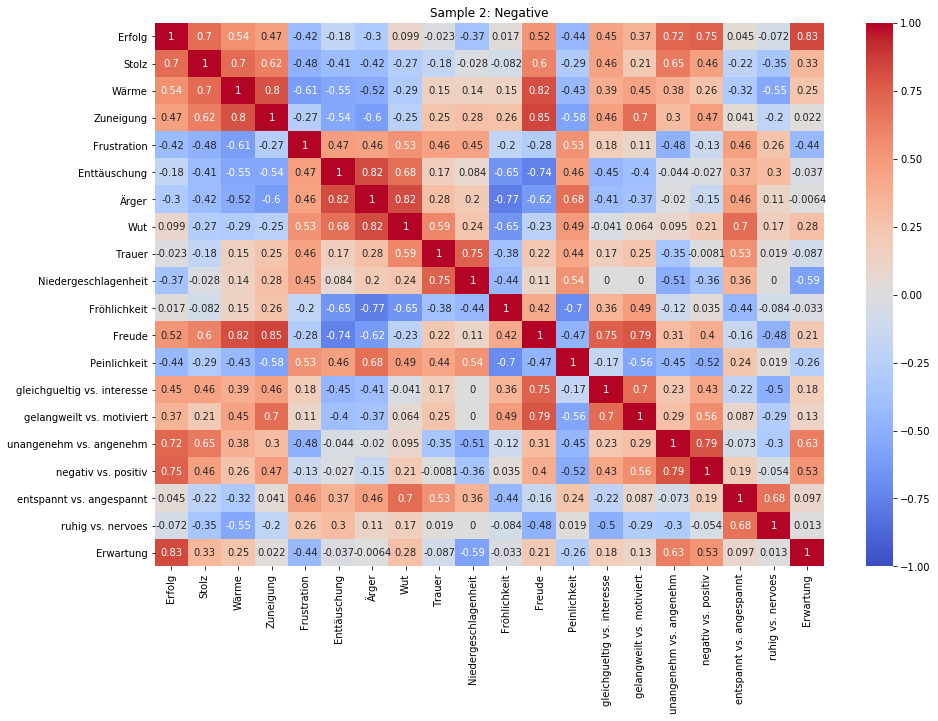

In [71]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(mood_data_2_neg_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 2: Negative')
sns_plot.figure.savefig("/home/michael/Desktop/sample2_neg_corr.png", dpi=300, bbox_inches='tight')

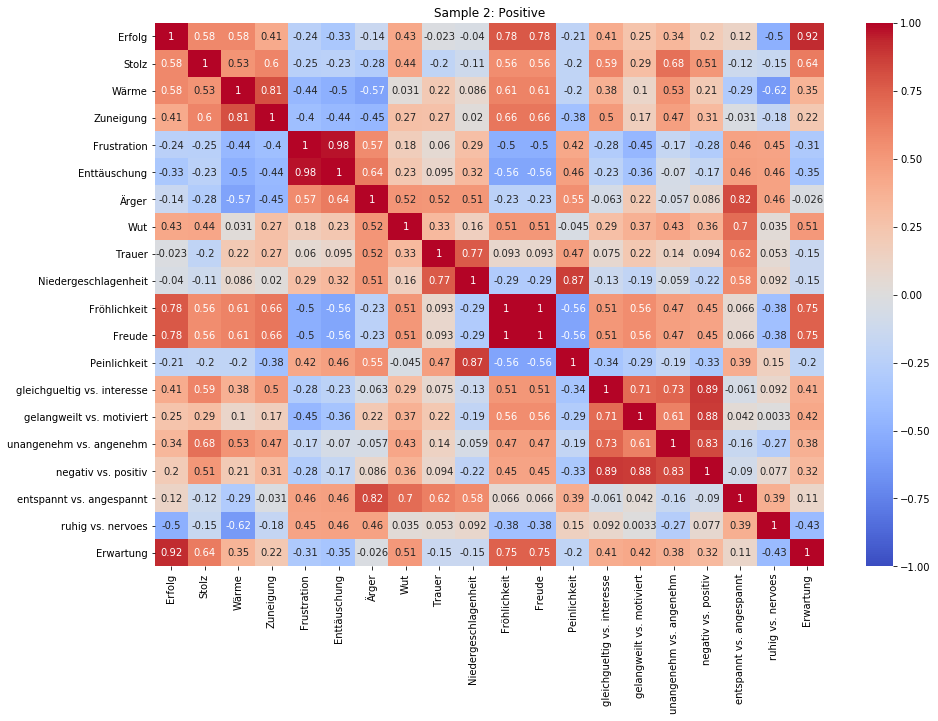

In [72]:
plt.figure(figsize=(15,10))
sns_plot = sns.heatmap(mood_data_2_pos_corr_matrix, annot = True, cmap="coolwarm", vmin=-1,vmax=1,center=0)
plt.title('Sample 2: Positive')
sns_plot.figure.savefig("/home/michael/Desktop/sample2_pos_corr.png", dpi=300, bbox_inches='tight')

In [73]:
mood_data_1_baseline.columns

Index(['code', 'erfolg_stolz', 'niedergeschlagen_bedrueckt_betruebt_traurig',
       'waerme_zuneigung', 'frustration_enttaeuschung',
       'froehlich_freudig_vergnuegt_entzueckt', 'peinlich', 'aerger_wut',
       'erwartung', 'lustlos vs. neugierig', 'unangenehm vs. angenehm',
       'entspannt vs. angespannt', 'condition'],
      dtype='object')

In [74]:
mood_data_1_baseline

code  erfolg_stolz  niedergeschlagen_bedrueckt_betruebt_traurig  \
0   1002             4                                            5   
3   1003             7                                            2   
6   1004             7                                            1   
9   1005             1                                            1   
15  1007             7                                            2   
18  1008             5                                            6   
21  1009             4                                            1   
24  1010             5                                            3   
27  1011             7                                            1   
30  1012             6                                            2   
33  1013             6                                            3   
36  1014             6                                            1   
39  1015             5                                            2   
42  1016             5                                            1   
45  1017             6                                            1   
48  1018             7                                            2   
51  1019             6                                            2   
54  1020             3                                            1   
57  1021             7                                            5   
60  1022             3                                            1   
63  1023             7                                            2   
66  1024             3                                            3   
69  1025             6                                            2   
72  1026             5                                            2   
75  1027             3                                            2   
78  1028             5                                            6   

    waerme_zuneigung  frustration_enttaeuschung  \
0                  6                          4   
3                  6                          1   
6                  7                          1   
9                  2                          1   
15                 8                          2   
18                 1                          1   
21                 3                          1   
24                 3                          2   
27                 5                          1   
30                 6                          2   
33                 8                          1   
36                 6                          1   
39                 7                          3   
42                 4                          1   
45                 3                          1   
48                 5                          1   
51                 5                          5   
54                 3                          1   
57                 8                          7   
60                 1                          1   
63                 6                          3   
66                 4                          1   
69                 6                          3   
72                 3                          1   
75                 4                          2   
78                 5                          2   

    froehlich_freudig_vergnuegt_entzueckt  peinlich  aerger_wut  erwartung  \
0                                       4         1           6          6   
3                                       6         1           2          7   
6                                       5         1           1          8   
9                                       5         1           1          5   
15                                      7         1           1          6   
18                                      5         1           1          5   
21                                      6         1           1          5   
24                                      5         2           1          6   
27    

In [75]:
mood_data_1_pos.mean()

code                                           3.015346e+03
erfolg_stolz                                   5.576923e+00
niedergeschlagen_bedrueckt_betruebt_traurig    2.153846e+00
waerme_zuneigung                               5.076923e+00
frustration_enttaeuschung                      2.346154e+00
froehlich_freudig_vergnuegt_entzueckt          5.615385e+00
peinlich                                       2.115385e+00
aerger_wut                                     1.461538e+00
erwartung                                      6.230769e+00
lustlos vs. neugierig                          2.606018e+24
unangenehm vs. angenehm                        2.259869e+24
entspannt vs. angespannt                       2.649485e+24
dtype: float64

In [76]:
mood_data_1_baseline.iloc[:,1:-1].astype(int)

erfolg_stolz  niedergeschlagen_bedrueckt_betruebt_traurig  \
0              4                                            5   
3              7                                            2   
6              7                                            1   
9              1                                            1   
15             7                                            2   
18             5                                            6   
21             4                                            1   
24             5                                            3   
27             7                                            1   
30             6                                            2   
33             6                                            3   
36             6                                            1   
39             5                                            2   
42             5                                            1   
45             6                                            1   
48             7                                            2   
51             6                                            2   
54             3                                            1   
57             7                                            5   
60             3                                            1   
63             7                                            2   
66             3                                            3   
69             6                                            2   
72             5                                            2   
75             3                                            2   
78             5                                            6   

    waerme_zuneigung  frustration_enttaeuschung  \
0                  6                          4   
3                  6                          1   
6                  7                          1   
9                  2                          1   
15                 8                          2   
18                 1                          1   
21                 3                          1   
24                 3                          2   
27                 5                          1   
30                 6                          2   
33                 8                          1   
36                 6                          1   
39                 7                          3   
42                 4                          1   
45                 3                          1   
48                 5                          1   
51                 5                          5   
54                 3                          1   
57                 8                          7   
60                 1                          1   
63                 6                          3   
66                 4                          1   
69                 6                          3   
72                 3                          1   
75                 4                          2   
78                 5                          2   

    froehlich_freudig_vergnuegt_entzueckt  peinlich  aerger_wut  erwartung  \
0                                       4         1           6          6   
3                                       6         1           2          7   
6                                       5         1           1          8   
9                                       5         1           1          5   
15                                      7         1           1          6   
18                                      5         1           1          5   
21                                      6         1           1          5   
24                                      5         2           1          6   
27                                      4         1           1          7   
30                                      7         2           3          5   
33          

## Change in mood over time

In [77]:
mood_data_1_baseline_means = mood_data_1_baseline.iloc[:,1:-1].astype(int).mean().to_frame(name='s1_baseline_mean').T
mood_data_1_baseline_std = mood_data_1_baseline.iloc[:,1:-1].astype(int).std().to_frame(name='s1_baseline_std').T
mood_data_1_neg_means = mood_data_1_neg.iloc[:,1:-1].astype(int).mean().to_frame(name='s1_neg_mean').T
mood_data_1_neg_std = mood_data_1_neg.iloc[:,1:-1].astype(int).std().to_frame(name='s1_neg_std').T
mood_data_1_pos_means = mood_data_1_pos.iloc[:,1:-1].astype(int).mean().to_frame(name='s1_pro_mean').T
mood_data_1_pos_std = mood_data_1_pos.iloc[:,1:-1].astype(int).std().to_frame(name='s1_pro_std').T


mood_data_2_baseline_means = mood_data_2_baseline.iloc[:,:-1].mean().to_frame(name='s2_baseline_mean').T
mood_data_2_baseline_std = mood_data_2_baseline.iloc[:,:-1].std().to_frame(name='s2_baseline_std').T
mood_data_2_neg_means = mood_data_2_neg.iloc[:,:-1].mean().to_frame(name='s2_neg_mean').T
mood_data_2_neg_std = mood_data_2_neg.iloc[:,:-1].std().to_frame(name='s2_neg_std').T
mood_data_2_pos_means = mood_data_2_pos.iloc[:,:-1].mean().to_frame(name='s2_pro_mean').T
mood_data_2_pos_std = mood_data_2_pos.iloc[:,:-1].std().to_frame(name='s2_pro_std').T

In [78]:
type(mood_data_2_baseline['gelangweilt vs. motiviert'].values[0])

numpy.int64

In [79]:
type(mood_data_1_baseline['lustlos vs. neugierig'].values[0])

str

In [80]:
mood_data_1_neg_means

erfolg_stolz  niedergeschlagen_bedrueckt_betruebt_traurig  \
s1_neg_mean      5.115385                                     2.538462   

             waerme_zuneigung  frustration_enttaeuschung  \
s1_neg_mean          4.769231                   2.576923   

             froehlich_freudig_vergnuegt_entzueckt  peinlich  aerger_wut  \
s1_neg_mean                               5.269231  2.038462    1.692308   

             erwartung  lustlos vs. neugierig  unangenehm vs. angenehm  \
s1_neg_mean   6.192308               5.730769                 6.192308   

             entspannt vs. angespannt  
s1_neg_mean                  5.961538

In [81]:
mood_data_2_neg.iloc[:,1:-1]

Stolz  Wärme  Zuneigung  Frustration  Enttäuschung  Ärger  Wut  Trauer  \
0       6      6          5            1             4      2    1       1   
1       5      4          2            2             1      2    1       1   
2       5      2          1            5             6      5    2       1   
3       4      6          6            2             2      2    1       1   
4       2      2          3            5             4      3    2       3   
5       6      4          7            4             2      1    1       1   
6       3      5          5            4             3      2    2       2   
7       7      7          6            1             1      1    1       1   
8       3      1          1            3             7      6    3       1   
9       8      8          8            3             3      3    3       3   
10      4      4          3            1             1      1    1       1   

    Niedergeschlagenheit  Fröhlichkeit  Freude  Peinlichkeit  \
0                      2             5       5             2   
1                      2             6       6             4   
2                      2             5       5             7   
3                      2             7       7             1   
4                      3             5       5             7   
5                      2             7       7             1   
6                      2             7       7             2   
7                      1             7       8             1   
8                      1             5       4             2   
9                      3             3       8             3   
10                     1             6       6             1   

    gleichgueltig vs. interesse  gelangweilt vs. motiviert  \
0                             5                          5   
1                             7                          6   
2                             8                          7   
3                             7                          8   
4                             7                          7   
5                             8                          8   
6                             8                          8   
7                             9                          8   
8                             5                          7   
9                             8                          8   
10                            8                          8   

    unangenehm vs. angenehm  negativ vs. positiv  entspannt vs. angespannt  \
0                         7                    7                         2   
1                         5                    5                         5   
2                         7                    7                         2   
3                         7                    7                         2   
4                         3                    7                         7   
5                         7                    8                         7   
6                         4                    7                         6   
7                         9                    9                         1   
8                         8                    8                         8   
9                         8                    8                         8   
10                        7                    7                         6   

    ruhig vs. nervoes  Erwartung condition  
0                   6          6  negative  
1                   6          6  negative  
2                   2          5  negative  
3                   2          3  negative  
4                   6          2  negative  
5                   7          5  negative  
6                   6          8  negative  
7                   1          9  negative  
8                   7          9  negative  
9                   3          8  negative  
10                  7          5  negative

In [82]:
mood_data_1_pos_means.T

s1_pro_mean
erfolg_stolz                                    5.576923
niedergeschlagen_bedrueckt_betruebt_traurig     2.153846
waerme_zuneigung                                5.076923
frustration_enttaeuschung                       2.346154
froehlich_freudig_vergnuegt_entzueckt           5.615385
peinlich                                        2.115385
aerger_wut                                      1.461538
erwartung                                       6.230769
lustlos vs. neugierig                           5.807692
unangenehm vs. angenehm                         6.307692
entspannt vs. angespannt                        6.115385

In [83]:
s1_mood_means = pd.concat([mood_data_1_baseline_means, mood_data_1_neg_means,
                           mood_data_1_pos_means])
s1_mood_std = pd.concat([mood_data_1_baseline_std, mood_data_1_neg_std,
                         mood_data_1_pos_std])

s2_mood_means = pd.concat([mood_data_2_baseline_means, mood_data_2_neg_means,
                           mood_data_2_pos_means])
s2_mood_std = pd.concat([mood_data_2_baseline_std, mood_data_2_neg_std,
                         mood_data_2_pos_std])



In [84]:
s1_mood_means_std = pd.concat([s1_mood_means, s1_mood_std])
s2_mood_means_std = pd.concat([s2_mood_means, s2_mood_std])

In [85]:
s1_mood_means_std.T.to_csv('/home/michael/master_thesis/s1_mood_means_std.tsv', sep='\t')
s2_mood_means_std.T.to_csv('/home/michael/master_thesis/s2_mood_means_std.tsv', sep='\t')

In [86]:
s2_mood_means_std.T

s2_baseline_mean  s2_neg_mean  s2_pro_mean  \
Erfolg                               5.909091     5.818182     6.000000   
Stolz                                5.000000     4.818182     5.090909   
Wärme                                4.363636     4.454545     4.454545   
Zuneigung                            4.000000     4.272727     4.545455   
Frustration                          3.636364     2.818182     3.545455   
Enttäuschung                         2.636364     3.090909     3.272727   
Ärger                                2.000000     2.545455     2.363636   
Wut                                  1.545455     1.636364     1.272727   
Trauer                               1.818182     1.454545     1.454545   
Niedergeschlagenheit                 1.909091     1.909091     1.727273   
Fröhlichkeit                         6.363636     5.727273     6.363636   
Freude                               6.545455     6.181818     6.454545   
Peinlichkeit                         2.181818     2.818182     2.545455   
gleichgueltig vs. interesse          7.727273     7.272727     7.636364   
gelangweilt vs. motiviert            7.636364     7.272727     7.454545   
unangenehm vs. angenehm              7.000000     6.545455     6.636364   
negativ vs. positiv                  7.363636     7.272727     7.000000   
entspannt vs. angespannt             4.090909     4.909091     5.000000   
ruhig vs. nervoes                    4.727273     4.818182     4.909091   
Erwartung                            6.000000     6.000000     5.818182   

                             s2_baseline_std  s2_neg_std  s2_pro_std  
Erfolg                              1.640399    1.662419    2.144761  
Stolz                               2.049390    1.834022    2.165851  
Wärme                               1.689540    2.207425    2.161649  
Zuneigung                           2.323790    2.412091    2.339386  
Frustration                         1.911687    1.537412    2.161649  
Enttäuschung                        1.689540    2.022600    1.902152  
Ärger                               2.097618    1.634848    1.501514  
Wut                                 1.035725    0.809040    0.646670  
Trauer                              1.328020    0.820200    0.820200  
Niedergeschlagenheit                1.136182    0.700649    0.786245  
Fröhlichkeit                        1.120065    1.272078    1.120065  
Freude                              1.128152    1.328020    1.035725  
Peinlichkeit                        1.601136    2.272364    2.114882  
gleichgueltig vs. interesse         0.646670    1.272078    0.674200  
gelangweilt vs. motiviert           0.924416    1.009050    0.820200  
unangenehm vs. angenehm             1.000000    1.809068    1.433369  
negativ vs. positiv                 0.924416    1.009050    1.612452  
entspannt vs. angespannt            2.385563    2.662876    2.408319  
ruhig vs. nervoes                   2.284334    2.315953    2.119177  
Erwartung                           1.732051    2.323790    2.088932

In [87]:
column_labels = s1_mood_means.columns.to_list()

[Text(0.5, 1.0, 'Sample1')]

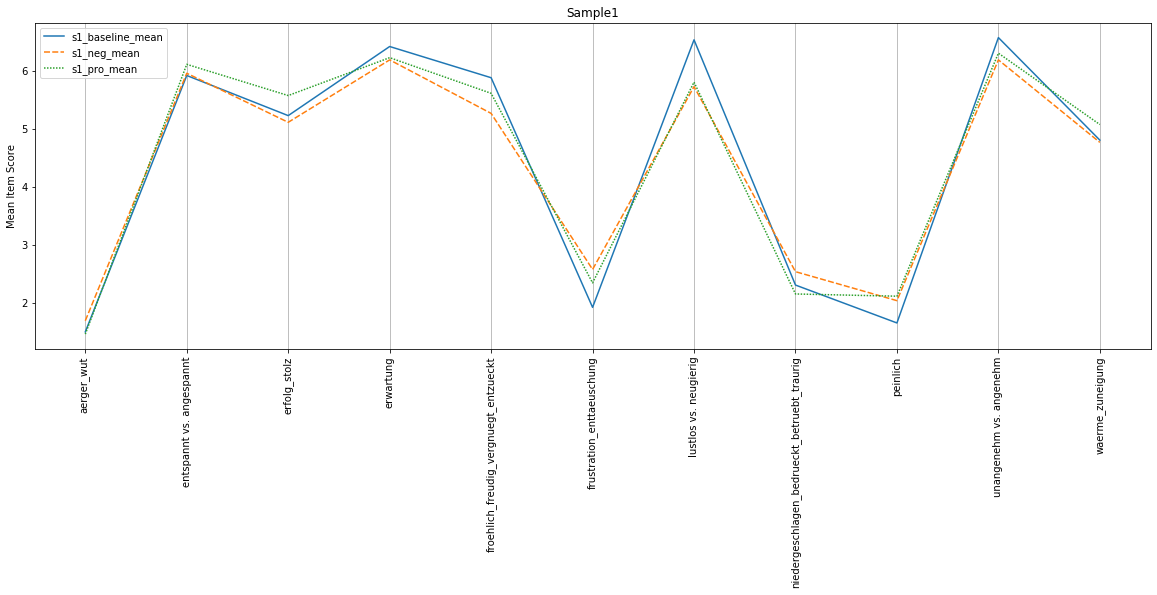

In [88]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

#plt.plot(mood_data_2_baseline_means.T['s2_baseline_mean'])
sns.lineplot(data=s1_mood_means.T, ax=ax)
#sns.swarmplot(s1_mood_means.T)
# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 20)
ax.tick_params(axis='x', rotation=90)
#plt.tight_layout()

ax.set(ylabel="Mean Item Score")
ax.set(title='Sample1')

In [89]:
s1_mood_means

erfolg_stolz  niedergeschlagen_bedrueckt_betruebt_traurig  \
s1_baseline_mean      5.230769                                     2.307692   
s1_neg_mean           5.115385                                     2.538462   
s1_pro_mean           5.576923                                     2.153846   

                  waerme_zuneigung  frustration_enttaeuschung  \
s1_baseline_mean          4.807692                   1.923077   
s1_neg_mean               4.769231                   2.576923   
s1_pro_mean               5.076923                   2.346154   

                  froehlich_freudig_vergnuegt_entzueckt  peinlich  aerger_wut  \
s1_baseline_mean                               5.884615  1.653846    1.500000   
s1_neg_mean                                    5.269231  2.038462    1.692308   
s1_pro_mean                                    5.615385  2.115385    1.461538   

                  erwartung  lustlos vs. neugierig  unangenehm vs. angenehm  \
s1_baseline_mean   6.423077               6.538462                 6.576923   
s1_neg_mean        6.192308               5.730769                 6.192308   
s1_pro_mean        6.230769               5.807692                 6.307692   

                  entspannt vs. angespannt  
s1_baseline_mean                  5.923077  
s1_neg_mean                       5.961538  
s1_pro_mean                       6.115385

In [90]:
upper = pd.DataFrame(s1_mood_means.values + s1_mood_std.values, columns=s1_mood_means.columns,
                     index=['baseline_mean + sdt','negative_mean + sdt', 'positive_mean + sdt'])
lower = pd.DataFrame(s1_mood_means.values - s1_mood_std.values, columns=s1_mood_means.columns,
                    index=['baseline_mean - sdt','negative_mean - sdt', 'positive_mean - sdt'])

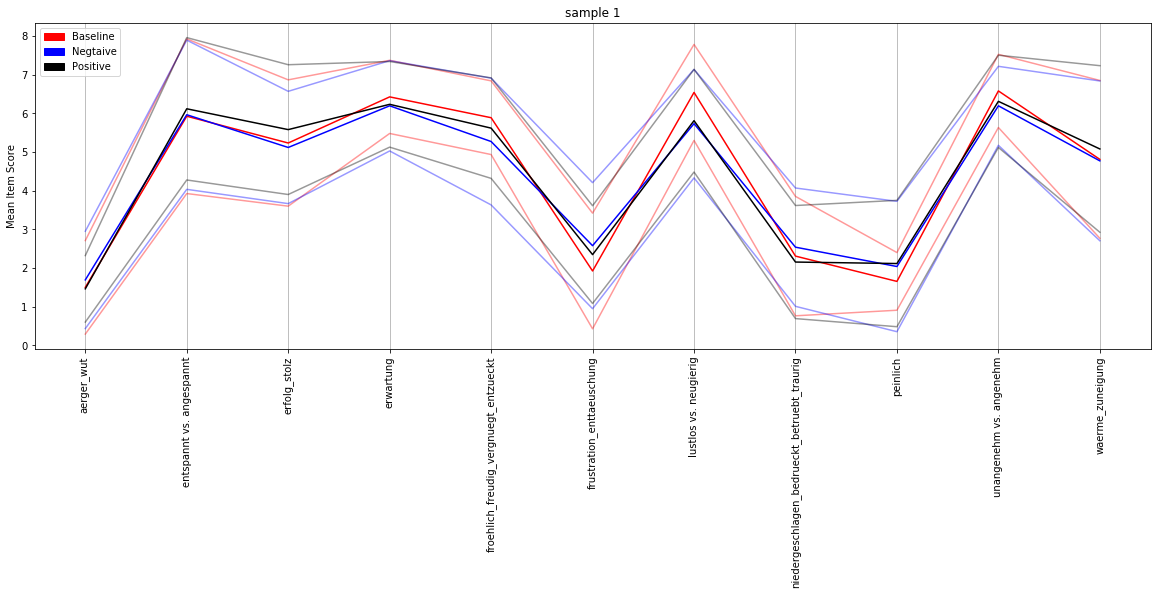

In [91]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

x = s1_mood_means.T['s1_baseline_mean']
x_upper = upper.T['baseline_mean + sdt']
x_lower = lower.T['baseline_mean - sdt']

x_1 = s1_mood_means.T['s1_neg_mean']
x_upper_1 = upper.T['negative_mean + sdt']
x_lower_1 = lower.T['negative_mean - sdt']

x_2 = s1_mood_means.T['s1_pro_mean']
x_upper_2 = upper.T['positive_mean + sdt']
x_lower_2 = lower.T['positive_mean - sdt']

sns.lineplot(data=x, ax=ax, color='r')
sns.lineplot(data=x_upper, ax=ax, color='r', alpha=0.4)
sns.lineplot(data=x_lower, ax=ax, color='r', alpha=0.4)

sns.lineplot(data=x_1, ax=ax, color='b')
sns.lineplot(data=x_upper_1, ax=ax, color='b', alpha=0.4)
sns.lineplot(data=x_lower_1, ax=ax, color='b', alpha=0.4)

sns.lineplot(data=x_2, ax=ax, color='black')
sns.lineplot(data=x_upper_2, ax=ax, color='black', alpha=0.4)
sns.lineplot(data=x_lower_2, ax=ax, color='black', alpha=0.4)
#sns.swarmplot(s1_mood_means.T)
# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 20)
ax.tick_params(axis='x', rotation=90)
#plt.tight_layout()

ax.set(ylabel="Mean Item Score")
ax.set_title('sample 1')
red_line = mpatches.Patch(color='r', label='Baseline')
blue_line = mpatches.Patch(color='b', label='Negtaive')
black_line = mpatches.Patch(color='black', label='Positive')

plt.legend(handles=[red_line, blue_line, black_line])

In [92]:
upper = pd.DataFrame(s2_mood_means.values + s2_mood_std.values, columns=s2_mood_means.columns,
                     index=['baseline_mean + sdt','negative_mean + sdt', 'positive_mean + sdt'])
lower = pd.DataFrame(s2_mood_means.values - s2_mood_std.values, columns=s2_mood_means.columns,
                    index=['baseline_mean - sdt','negative_mean - sdt', 'positive_mean - sdt'])

In [93]:
s2_mood_means

Erfolg     Stolz     Wärme  Zuneigung  Frustration  \
s2_baseline_mean  5.909091  5.000000  4.363636   4.000000     3.636364   
s2_neg_mean       5.818182  4.818182  4.454545   4.272727     2.818182   
s2_pro_mean       6.000000  5.090909  4.454545   4.545455     3.545455   

                  Enttäuschung     Ärger       Wut    Trauer  \
s2_baseline_mean      2.636364  2.000000  1.545455  1.818182   
s2_neg_mean           3.090909  2.545455  1.636364  1.454545   
s2_pro_mean           3.272727  2.363636  1.272727  1.454545   

                  Niedergeschlagenheit  Fröhlichkeit    Freude  Peinlichkeit  \
s2_baseline_mean              1.909091      6.363636  6.545455      2.181818   
s2_neg_mean                   1.909091      5.727273  6.181818      2.818182   
s2_pro_mean                   1.727273      6.363636  6.454545      2.545455   

                  gleichgueltig vs. interesse  gelangweilt vs. motiviert  \
s2_baseline_mean                     7.727273                   7.636364   
s2_neg_mean                          7.272727                   7.272727   
s2_pro_mean                          7.636364                   7.454545   

                  unangenehm vs. angenehm  negativ vs. positiv  \
s2_baseline_mean                 7.000000             7.363636   
s2_neg_mean                      6.545455             7.272727   
s2_pro_mean                      6.636364             7.000000   

                  entspannt vs. angespannt  ruhig vs. nervoes  Erwartung  
s2_baseline_mean                  4.090909           4.727273   6.000000  
s2_neg_mean                       4.909091           4.818182   6.000000  
s2_pro_mean                       5.000000           4.909091   5.818182

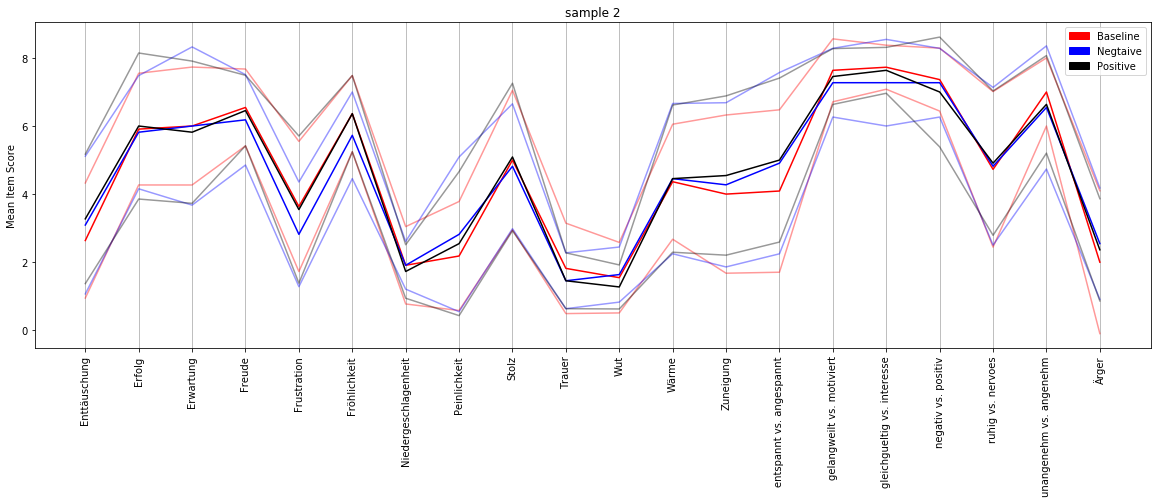

In [94]:
# Initialize figure 
f, ax = plt.subplots(figsize=(20, 6))

x = s2_mood_means.T['s2_baseline_mean']
x_upper = upper.T['baseline_mean + sdt']
x_lower = lower.T['baseline_mean - sdt']

x_1 = s2_mood_means.T['s2_neg_mean']
x_upper_1 = upper.T['negative_mean + sdt']
x_lower_1 = lower.T['negative_mean - sdt']

x_2 = s2_mood_means.T['s2_pro_mean']
x_upper_2 = upper.T['positive_mean + sdt']
x_lower_2 = lower.T['positive_mean - sdt']

sns.lineplot(data=x, ax=ax, color='r')
sns.lineplot(data=x_upper, ax=ax, color='r', alpha=0.4)
sns.lineplot(data=x_lower, ax=ax, color='r', alpha=0.4)

sns.lineplot(data=x_1, ax=ax, color='b')
sns.lineplot(data=x_upper_1, ax=ax, color='b', alpha=0.4)
sns.lineplot(data=x_lower_1, ax=ax, color='b', alpha=0.4)

sns.lineplot(data=x_2, ax=ax, color='black')
sns.lineplot(data=x_upper_2, ax=ax, color='black', alpha=0.4)
sns.lineplot(data=x_lower_2, ax=ax, color='black', alpha=0.4)
#sns.swarmplot(s1_mood_means.T)
# Tweak visual presentation
ax.xaxis.grid(True)
#ax.set(ylim=(0, 6))
#ax.set_xticklabels(ax.get_xticklabels(),rotation = 20)
ax.tick_params(axis='x', rotation=90)
#plt.tight_layout()

ax.set(ylabel="Mean Item Score")
ax.set_title('sample 2')
red_line = mpatches.Patch(color='r', label='Baseline')
blue_line = mpatches.Patch(color='b', label='Negtaive')
black_line = mpatches.Patch(color='black', label='Positive')

plt.legend(handles=[red_line, blue_line, black_line])

# separate variables for each item

In [95]:
# erfolg
mood_data_1_baseline_erfolg = mood_data_1_baseline.iloc[:,1:2]
mood_data_1_baseline_erfolg = mood_data_1_baseline_erfolg.rename(columns={'erfolg_stolz':'erfolg_baseline'})
mood_data_1_neg_erfolg = mood_data_1_neg.iloc[:,1:2]
mood_data_1_neg_erfolg = mood_data_1_neg_erfolg.rename(columns={'erfolg_stolz':'erfolg_negative'})
mood_data_1_pos_erfolg = mood_data_1_pos.iloc[:,1:2]
mood_data_1_pos_erfolg = mood_data_1_pos_erfolg.rename(columns={'erfolg_stolz':'erfpolg_positive'})
mood_data_1_baseline_erfolg.reset_index(drop=True, inplace=True)
mood_data_1_neg_erfolg.reset_index(drop=True, inplace=True)
mood_data_1_pos_erfolg.reset_index(drop=True, inplace=True)
erfolg_stolz = pd.concat([mood_data_1_baseline_erfolg, mood_data_1_neg_erfolg, mood_data_1_pos_erfolg], axis=1)

# niedergeschlagen/bedrueckt/betruebt/traurig
mood_data_1_baseline_traurig = mood_data_1_baseline.iloc[:,2:3]
mood_data_1_baseline_traurig = mood_data_1_baseline_traurig.rename(columns={'niedergeschlagen_bedrueckt_betruebt_traurig':'traurig_baseline'})
mood_data_1_neg_traurig = mood_data_1_neg.iloc[:,2:3]
mood_data_1_neg_traurig = mood_data_1_neg_traurig.rename(columns={'niedergeschlagen_bedrueckt_betruebt_traurig':'traurig_negative'})
mood_data_1_pos_traurig = mood_data_1_pos.iloc[:,2:3]
mood_data_1_pos_traurig = mood_data_1_pos_traurig.rename(columns={'niedergeschlagen_bedrueckt_betruebt_traurig':'traurig_positive'})
mood_data_1_baseline_traurig.reset_index(drop=True, inplace=True)
mood_data_1_neg_traurig.reset_index(drop=True, inplace=True)
mood_data_1_pos_traurig.reset_index(drop=True, inplace=True)

traurig = pd.concat([mood_data_1_baseline_traurig, mood_data_1_neg_traurig, mood_data_1_pos_traurig], axis=1)

# waerme/zuneigung
mood_data_1_baseline_waerme = mood_data_1_baseline.iloc[:,3:4]
mood_data_1_baseline_waerme = mood_data_1_baseline_waerme.rename(columns={'waerme_zuneigung':'waerme_baseline'})
mood_data_1_neg_waerme = mood_data_1_neg.iloc[:,3:4]
mood_data_1_neg_waerme = mood_data_1_neg_waerme.rename(columns={'waerme_zuneigung':'waerme_negative'})
mood_data_1_pos_waerme = mood_data_1_pos.iloc[:,3:4]
mood_data_1_pos_waerme = mood_data_1_pos_waerme.rename(columns={'waerme_zuneigung':'waerme_positive'})
mood_data_1_baseline_waerme.reset_index(drop=True, inplace=True)
mood_data_1_neg_waerme.reset_index(drop=True, inplace=True)
mood_data_1_pos_waerme.reset_index(drop=True, inplace=True)

waerme = pd.concat([mood_data_1_baseline_waerme, mood_data_1_neg_waerme, mood_data_1_pos_waerme], axis=1)

# frustration/enttaeuschung
mood_data_1_baseline_frustration = mood_data_1_baseline.iloc[:,4:5]
mood_data_1_baseline_frustration = mood_data_1_baseline_frustration.rename(columns={'frustration_enttaeuschung':'frustration_baseline'})
mood_data_1_neg_frustration = mood_data_1_neg.iloc[:,4:5]
mood_data_1_neg_frustration = mood_data_1_neg_frustration.rename(columns={'frustration_enttaeuschung':'frustration_negative'})
mood_data_1_pos_frustration = mood_data_1_pos.iloc[:,4:5]
mood_data_1_pos_frustration = mood_data_1_pos_frustration.rename(columns={'frustration_enttaeuschung':'frustration_positive'})
mood_data_1_baseline_frustration.reset_index(drop=True, inplace=True)
mood_data_1_neg_frustration.reset_index(drop=True, inplace=True)
mood_data_1_pos_frustration.reset_index(drop=True, inplace=True)

frustration = pd.concat([mood_data_1_baseline_frustration, mood_data_1_neg_frustration,
                         mood_data_1_pos_frustration], axis=1)

# froehlich/freudig/vergnuegt/entzueckt
mood_data_1_baseline_froehlich = mood_data_1_baseline.iloc[:,5:6]
mood_data_1_baseline_froehlich = mood_data_1_baseline_froehlich.rename(columns={'froehlich_freudig_vergnuegt_entzueckt':'froehlich_baseline'})
mood_data_1_neg_froehlich = mood_data_1_neg.iloc[:,5:6]
mood_data_1_neg_froehlich = mood_data_1_neg_froehlich.rename(columns={'froehlich_freudig_vergnuegt_entzueckt':'froehlich_negative'})
mood_data_1_pos_froehlich = mood_data_1_pos.iloc[:,5:6]
mood_data_1_pos_froehlich = mood_data_1_pos_froehlich.rename(columns={'froehlich_freudig_vergnuegt_entzueckt':'froehlich_positive'})
mood_data_1_baseline_froehlich.reset_index(drop=True, inplace=True)
mood_data_1_neg_froehlich.reset_index(drop=True, inplace=True)
mood_data_1_pos_froehlich.reset_index(drop=True, inplace=True)

froehlich = pd.concat([mood_data_1_baseline_froehlich, mood_data_1_neg_froehlich,
                         mood_data_1_pos_froehlich], axis=1)


# peinlich
mood_data_1_baseline_peinlich = mood_data_1_baseline.iloc[:,6:7]
mood_data_1_baseline_peinlich = mood_data_1_baseline_peinlich.rename(columns={'peinlich':'peinlich_baseline'})
mood_data_1_neg_peinlich = mood_data_1_neg.iloc[:,6:7]
mood_data_1_neg_peinlich = mood_data_1_neg_peinlich.rename(columns={'peinlich':'peinlich_negative'})
mood_data_1_pos_peinlich = mood_data_1_pos.iloc[:,6:7]
mood_data_1_pos_peinlich = mood_data_1_pos_peinlich.rename(columns={'peinlich':'peinlich_positive'})
mood_data_1_baseline_peinlich.reset_index(drop=True, inplace=True)
mood_data_1_neg_peinlich.reset_index(drop=True, inplace=True)
mood_data_1_pos_peinlich.reset_index(drop=True, inplace=True)

peinlich = pd.concat([mood_data_1_baseline_peinlich, mood_data_1_neg_peinlich,
                         mood_data_1_pos_peinlich], axis=1)


# aerger/wut
mood_data_1_baseline_aerger = mood_data_1_baseline.iloc[:,7:8]
mood_data_1_baseline_aerger = mood_data_1_baseline_aerger.rename(columns={'aerger_wut':'aerger_baseline'})
mood_data_1_neg_aerger = mood_data_1_neg.iloc[:,7:8]
mood_data_1_neg_aerger = mood_data_1_neg_aerger.rename(columns={'aerger_wut':'aerger_negative'})
mood_data_1_pos_aerger = mood_data_1_pos.iloc[:,7:8]
mood_data_1_pos_aerger = mood_data_1_pos_aerger.rename(columns={'aerger_wut':'aerger_positive'})
mood_data_1_baseline_aerger.reset_index(drop=True, inplace=True)
mood_data_1_neg_aerger.reset_index(drop=True, inplace=True)
mood_data_1_pos_aerger.reset_index(drop=True, inplace=True)

aerger = pd.concat([mood_data_1_baseline_aerger, mood_data_1_neg_aerger,
                         mood_data_1_pos_aerger], axis=1)

# erwartung
mood_data_1_baseline_erwartung = mood_data_1_baseline.iloc[:,8:9]
mood_data_1_baseline_erwartung = mood_data_1_baseline_erwartung.rename(columns={'erwartung':'erwartung_baseline'})
mood_data_1_neg_erwartung = mood_data_1_neg.iloc[:,8:9]
mood_data_1_neg_erwartung = mood_data_1_neg_erwartung.rename(columns={'erwartung':'erwartung_negative'})
mood_data_1_pos_erwartung = mood_data_1_pos.iloc[:,8:9]
mood_data_1_pos_erwartung = mood_data_1_pos_erwartung.rename(columns={'erwartung':'erwartung_positive'})
mood_data_1_baseline_erwartung.reset_index(drop=True, inplace=True)
mood_data_1_neg_erwartung.reset_index(drop=True, inplace=True)
mood_data_1_pos_erwartung.reset_index(drop=True, inplace=True)

erwartung = pd.concat([mood_data_1_baseline_erwartung, mood_data_1_neg_erwartung,
                         mood_data_1_pos_erwartung], axis=1)

# lustlos vs. neugierig
mood_data_1_baseline_neugierig = mood_data_1_baseline.iloc[:,9:10]
mood_data_1_baseline_neugierig = mood_data_1_baseline_neugierig.rename(columns={'lustlos vs. neugierig':'neugierig_baseline'})
mood_data_1_neg_neugierig = mood_data_1_neg.iloc[:,9:10]
mood_data_1_neg_neugierig = mood_data_1_neg_neugierig.rename(columns={'lustlos vs. neugierig':'neugierig_negative'})
mood_data_1_pos_neugierig = mood_data_1_pos.iloc[:,9:10]
mood_data_1_pos_neugierig = mood_data_1_pos_neugierig.rename(columns={'lustlos vs. neugierig':'neugierig_positive'})
mood_data_1_baseline_neugierig.reset_index(drop=True, inplace=True)
mood_data_1_neg_neugierig.reset_index(drop=True, inplace=True)
mood_data_1_pos_neugierig.reset_index(drop=True, inplace=True)

neugierig = pd.concat([mood_data_1_baseline_neugierig, mood_data_1_neg_neugierig,
                         mood_data_1_pos_neugierig], axis=1)

# unangenehm
mood_data_1_baseline_unangenehm = mood_data_1_baseline.iloc[:,10:11]
mood_data_1_baseline_unangenehm = mood_data_1_baseline_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_baseline'})
mood_data_1_neg_unangenehm = mood_data_1_neg.iloc[:,10:11]
mood_data_1_neg_unangenehm = mood_data_1_neg_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_negative'})
mood_data_1_pos_unangenehm = mood_data_1_pos.iloc[:,10:11]
mood_data_1_pos_unangenehm = mood_data_1_pos_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_positive'})
mood_data_1_baseline_unangenehm.reset_index(drop=True, inplace=True)
mood_data_1_neg_unangenehm.reset_index(drop=True, inplace=True)
mood_data_1_pos_unangenehm.reset_index(drop=True, inplace=True)

unangenehm = pd.concat([mood_data_1_baseline_unangenehm, mood_data_1_neg_unangenehm,
                         mood_data_1_pos_unangenehm], axis=1)

# entspannt
mood_data_1_baseline_entspannt = mood_data_1_baseline.iloc[:,11:12]
mood_data_1_baseline_entspannt = mood_data_1_baseline_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_baseline'})
mood_data_1_neg_entspannt = mood_data_1_neg.iloc[:,11:12]
mood_data_1_neg_entspannt = mood_data_1_neg_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_negative'})
mood_data_1_pos_entspannt = mood_data_1_pos.iloc[:,11:12]
mood_data_1_pos_entspannt = mood_data_1_pos_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_positive'})
mood_data_1_baseline_entspannt.reset_index(drop=True, inplace=True)
mood_data_1_neg_entspannt.reset_index(drop=True, inplace=True)
mood_data_1_pos_entspannt.reset_index(drop=True, inplace=True)

entspannt = pd.concat([mood_data_1_baseline_entspannt, mood_data_1_neg_entspannt,
                         mood_data_1_pos_entspannt], axis=1)

In [96]:
# erfolg
mood_data_2_baseline_erfolg = mood_data_2_baseline.iloc[:,:1]
mood_data_2_baseline_erfolg = mood_data_2_baseline_erfolg.rename(columns={'Erfolg':'erfolg_baseline'})
mood_data_2_neg_erfolg = mood_data_2_neg.iloc[:,:1]
mood_data_2_neg_erfolg = mood_data_2_neg_erfolg.rename(columns={'Erfolg':'erfolg_negative'})
mood_data_2_pos_erfolg = mood_data_2_pos.iloc[:,:1]
mood_data_2_pos_erfolg = mood_data_2_pos_erfolg.rename(columns={'Erfolg':'erfolg_positive'})
mood_data_2_baseline_erfolg.reset_index(drop=True, inplace=True)
mood_data_2_neg_erfolg.reset_index(drop=True, inplace=True)
mood_data_2_pos_erfolg.reset_index(drop=True, inplace=True)

erfolg_s2 = pd.concat([mood_data_2_baseline_erfolg, mood_data_2_neg_erfolg, mood_data_2_pos_erfolg], axis=1)

# Stolz
mood_data_2_baseline_stolz = mood_data_2_baseline.iloc[:,1:2]
mood_data_2_baseline_stolz = mood_data_2_baseline_stolz.rename(columns={'Stolz':'stolz_baseline'})
mood_data_2_neg_stolz = mood_data_2_neg.iloc[:,1:2]
mood_data_2_neg_stolz = mood_data_2_neg_stolz.rename(columns={'Stolz':'stolz_negative'})
mood_data_2_pos_stolz = mood_data_2_pos.iloc[:,1:2]
mood_data_2_pos_stolz = mood_data_2_pos_stolz.rename(columns={'Stolz':'stolz_positive'})
mood_data_2_baseline_stolz.reset_index(drop=True, inplace=True)
mood_data_2_neg_stolz.reset_index(drop=True, inplace=True)
mood_data_2_pos_stolz.reset_index(drop=True, inplace=True)

stolz_s2 = pd.concat([mood_data_2_baseline_stolz, mood_data_2_neg_stolz, mood_data_2_pos_stolz], axis=1)

# waerme
mood_data_2_baseline_waerme = mood_data_2_baseline.iloc[:,2:3]
mood_data_2_baseline_waerme = mood_data_2_baseline_waerme.rename(columns={'Wärme':'waerme_baseline'})
mood_data_2_neg_waerme = mood_data_2_neg.iloc[:,2:3]
mood_data_2_neg_waerme = mood_data_2_neg_waerme.rename(columns={'Wärme':'waerme_negative'})
mood_data_2_pos_waerme = mood_data_2_pos.iloc[:,2:3]
mood_data_2_pos_waerme = mood_data_2_pos_waerme.rename(columns={'Wärme':'waerme_positive'})
mood_data_2_baseline_waerme.reset_index(drop=True, inplace=True)
mood_data_2_neg_waerme.reset_index(drop=True, inplace=True)
mood_data_2_pos_waerme.reset_index(drop=True, inplace=True)

waerme_s2 = pd.concat([mood_data_2_baseline_waerme, mood_data_2_neg_waerme, mood_data_2_pos_waerme], axis=1)

# Zuneigung
mood_data_2_baseline_zuneigung = mood_data_2_baseline.iloc[:,3:4]
mood_data_2_baseline_zuneigung = mood_data_2_baseline_zuneigung.rename(columns={'Zuneigung':'zuneigung_baseline'})
mood_data_2_neg_zuneigung = mood_data_2_neg.iloc[:,3:4]
mood_data_2_neg_zuneigung = mood_data_2_neg_zuneigung.rename(columns={'Zuneigung':'zuneigung_negative'})
mood_data_2_pos_zuneigung = mood_data_2_pos.iloc[:,3:4]
mood_data_2_pos_zuneigung = mood_data_2_pos_zuneigung.rename(columns={'Zuneigung':'zuneigung_positive'})
mood_data_2_baseline_zuneigung.reset_index(drop=True, inplace=True)
mood_data_2_neg_zuneigung.reset_index(drop=True, inplace=True)
mood_data_2_pos_zuneigung.reset_index(drop=True, inplace=True)

zuneigung_s2 = pd.concat([mood_data_2_baseline_zuneigung, mood_data_2_neg_zuneigung,
                          mood_data_2_pos_zuneigung], axis=1)

# Frustration
mood_data_2_baseline_frustration = mood_data_2_baseline.iloc[:,4:5]
mood_data_2_baseline_frustration = mood_data_2_baseline_frustration.rename(columns={'Frustration':'frustration_baseline'})
mood_data_2_neg_frustration = mood_data_2_neg.iloc[:,4:5]
mood_data_2_neg_frustration = mood_data_2_neg_frustration.rename(columns={'Frustration':'frustration_negative'})
mood_data_2_pos_frustration = mood_data_2_pos.iloc[:,4:5]
mood_data_2_pos_frustration = mood_data_2_pos_frustration.rename(columns={'Frustration':'frustration_positive'})
mood_data_2_baseline_frustration.reset_index(drop=True, inplace=True)
mood_data_2_neg_frustration.reset_index(drop=True, inplace=True)
mood_data_2_pos_frustration.reset_index(drop=True, inplace=True)

frustration_s2 = pd.concat([mood_data_2_baseline_frustration, mood_data_2_neg_frustration,
                          mood_data_2_pos_frustration], axis=1)

# Enttäuschung
mood_data_2_baseline_enttaeuschung = mood_data_2_baseline.iloc[:,5:6]
mood_data_2_baseline_enttaeuschung = mood_data_2_baseline_enttaeuschung.rename(columns={'Enttäuschung':'enttaeuschung_baseline'})
mood_data_2_neg_enttaeuschung = mood_data_2_neg.iloc[:,5:6]
mood_data_2_neg_enttaeuschung = mood_data_2_neg_enttaeuschung.rename(columns={'Enttäuschung':'enttaeuschung_negative'})
mood_data_2_pos_enttaeuschung = mood_data_2_pos.iloc[:,5:6]
mood_data_2_pos_enttaeuschung = mood_data_2_pos_enttaeuschung.rename(columns={'Enttäuschung':'enttaeuschung_positive'})
mood_data_2_baseline_enttaeuschung.reset_index(drop=True, inplace=True)
mood_data_2_neg_enttaeuschung.reset_index(drop=True, inplace=True)
mood_data_2_pos_enttaeuschung.reset_index(drop=True, inplace=True)

enttaeuschung_s2 = pd.concat([mood_data_2_baseline_enttaeuschung, mood_data_2_neg_enttaeuschung,
                          mood_data_2_pos_enttaeuschung], axis=1)

# Ärger
mood_data_2_baseline_aerger = mood_data_2_baseline.iloc[:,6:7]
mood_data_2_baseline_aerger = mood_data_2_baseline_aerger.rename(columns={'Ärger':'aerger_baseline'})
mood_data_2_neg_aerger = mood_data_2_neg.iloc[:,6:7]
mood_data_2_neg_aerger = mood_data_2_neg_aerger.rename(columns={'Ärger':'aerger_negative'})
mood_data_2_pos_aerger = mood_data_2_pos.iloc[:,6:7]
mood_data_2_pos_aerger = mood_data_2_pos_aerger.rename(columns={'Ärger':'aerger_positive'})
mood_data_2_baseline_aerger.reset_index(drop=True, inplace=True)
mood_data_2_neg_aerger.reset_index(drop=True, inplace=True)
mood_data_2_pos_aerger.reset_index(drop=True, inplace=True)

aerger_s2 = pd.concat([mood_data_2_baseline_aerger, mood_data_2_neg_aerger,
                          mood_data_2_pos_aerger], axis=1)

# Wut
mood_data_2_baseline_wut = mood_data_2_baseline.iloc[:,7:8]
mood_data_2_baseline_wut = mood_data_2_baseline_wut.rename(columns={'Wut':'wut_baseline'})
mood_data_2_neg_wut = mood_data_2_neg.iloc[:,7:8]
mood_data_2_neg_wut = mood_data_2_neg_wut.rename(columns={'Wut':'wut_negative'})
mood_data_2_pos_wut = mood_data_2_pos.iloc[:,7:8]
mood_data_2_pos_wut = mood_data_2_pos_wut.rename(columns={'Wut':'wut_positive'})
mood_data_2_baseline_wut.reset_index(drop=True, inplace=True)
mood_data_2_neg_wut.reset_index(drop=True, inplace=True)
mood_data_2_pos_wut.reset_index(drop=True, inplace=True)

wut_s2 = pd.concat([mood_data_2_baseline_wut, mood_data_2_neg_wut,
                          mood_data_2_pos_wut], axis=1)

# Trauer
mood_data_2_baseline_trauer = mood_data_2_baseline.iloc[:,8:9]
mood_data_2_baseline_trauer = mood_data_2_baseline_trauer.rename(columns={'Trauer':'trauer_baseline'})
mood_data_2_neg_trauer = mood_data_2_neg.iloc[:,8:9]
mood_data_2_neg_trauer = mood_data_2_neg_trauer.rename(columns={'Trauer':'trauer_negative'})
mood_data_2_pos_trauer = mood_data_2_pos.iloc[:,8:9]
mood_data_2_pos_trauer = mood_data_2_pos_trauer.rename(columns={'Trauer':'trauer_positive'})
mood_data_2_baseline_trauer.reset_index(drop=True, inplace=True)
mood_data_2_neg_trauer.reset_index(drop=True, inplace=True)
mood_data_2_pos_trauer.reset_index(drop=True, inplace=True)

trauer_s2 = pd.concat([mood_data_2_baseline_trauer, mood_data_2_neg_trauer,
                          mood_data_2_pos_trauer], axis=1)

# Niedergeschlagenheit
mood_data_2_baseline_niedergeschlagenheit = mood_data_2_baseline.iloc[:,9:10]
mood_data_2_baseline_niedergeschlagenheit = mood_data_2_baseline_niedergeschlagenheit.rename(columns={'Niedergeschlagenheit':'niedergeschlagenheit_baseline'})
mood_data_2_neg_niedergeschlagenheit = mood_data_2_neg.iloc[:,9:10]
mood_data_2_neg_niedergeschlagenheit = mood_data_2_neg_niedergeschlagenheit.rename(columns={'Niedergeschlagenheit':'niedergeschlagenheit_negative'})
mood_data_2_pos_niedergeschlagenheit = mood_data_2_pos.iloc[:,9:10]
mood_data_2_pos_niedergeschlagenheit = mood_data_2_pos_niedergeschlagenheit.rename(columns={'Niedergeschlagenheit':'niedergeschlagenheit_positive'})
mood_data_2_baseline_niedergeschlagenheit.reset_index(drop=True, inplace=True)
mood_data_2_neg_niedergeschlagenheit.reset_index(drop=True, inplace=True)
mood_data_2_pos_niedergeschlagenheit.reset_index(drop=True, inplace=True)

niedergeschlagenheit_s2 = pd.concat([mood_data_2_baseline_niedergeschlagenheit, mood_data_2_neg_niedergeschlagenheit,
                          mood_data_2_pos_niedergeschlagenheit], axis=1)

# Fröhlichkeit
mood_data_2_baseline_fröhlichkeit = mood_data_2_baseline.iloc[:,10:11]
mood_data_2_baseline_fröhlichkeit = mood_data_2_baseline_fröhlichkeit.rename(columns={'Fröhlichkeit':'fröhlichkeit_baseline'})
mood_data_2_neg_fröhlichkeit = mood_data_2_neg.iloc[:,10:11]
mood_data_2_neg_fröhlichkeit = mood_data_2_neg_fröhlichkeit.rename(columns={'Fröhlichkeit':'fröhlichkeit_negative'})
mood_data_2_pos_fröhlichkeit = mood_data_2_pos.iloc[:,10:11]
mood_data_2_pos_fröhlichkeit = mood_data_2_pos_fröhlichkeit.rename(columns={'Fröhlichkeit':'fröhlichkeit_positive'})
mood_data_2_baseline_fröhlichkeit.reset_index(drop=True, inplace=True)
mood_data_2_neg_fröhlichkeit.reset_index(drop=True, inplace=True)
mood_data_2_pos_fröhlichkeit.reset_index(drop=True, inplace=True)

fröhlichkeit_s2 = pd.concat([mood_data_2_baseline_fröhlichkeit, mood_data_2_neg_fröhlichkeit,
                          mood_data_2_pos_fröhlichkeit], axis=1)

# Freude
mood_data_2_baseline_freude = mood_data_2_baseline.iloc[:,11:12]
mood_data_2_baseline_freude = mood_data_2_baseline_freude.rename(columns={'Freude':'freude_baseline'})
mood_data_2_neg_freude = mood_data_2_neg.iloc[:,11:12]
mood_data_2_neg_freude = mood_data_2_neg_freude.rename(columns={'Freude':'freude_negative'})
mood_data_2_pos_freude = mood_data_2_pos.iloc[:,11:12]
mood_data_2_pos_freude = mood_data_2_pos_freude.rename(columns={'Freude':'freude_positive'})
mood_data_2_baseline_freude.reset_index(drop=True, inplace=True)
mood_data_2_neg_freude.reset_index(drop=True, inplace=True)
mood_data_2_pos_freude.reset_index(drop=True, inplace=True)

freude_s2 = pd.concat([mood_data_2_baseline_freude, mood_data_2_neg_freude,
                          mood_data_2_pos_freude], axis=1)

# Peinlichkeit
mood_data_2_baseline_peinlichkeit = mood_data_2_baseline.iloc[:,12:13]
mood_data_2_baseline_peinlichkeit = mood_data_2_baseline_peinlichkeit.rename(columns={'Peinlichkeit':'peinlichkeit_baseline'})
mood_data_2_neg_peinlichkeit = mood_data_2_neg.iloc[:,12:13]
mood_data_2_neg_peinlichkeit = mood_data_2_neg_peinlichkeit.rename(columns={'Peinlichkeit':'peinlichkeit_negative'})
mood_data_2_pos_peinlichkeit = mood_data_2_pos.iloc[:,12:13]
mood_data_2_pos_peinlichkeit = mood_data_2_pos_peinlichkeit.rename(columns={'Peinlichkeit':'peinlichkeit_positive'})
mood_data_2_baseline_peinlichkeit.reset_index(drop=True, inplace=True)
mood_data_2_neg_peinlichkeit.reset_index(drop=True, inplace=True)
mood_data_2_pos_peinlichkeit.reset_index(drop=True, inplace=True)

peinlichkeit_s2 = pd.concat([mood_data_2_baseline_peinlichkeit, mood_data_2_neg_peinlichkeit,
                          mood_data_2_pos_peinlichkeit], axis=1)

# gleichgueltig
mood_data_2_baseline_gleichgueltig = mood_data_2_baseline.iloc[:,13:14]
mood_data_2_baseline_gleichgueltig = mood_data_2_baseline_gleichgueltig.rename(columns={'gleichgueltig vs. interesse':'gleichgueltig_baseline'})
mood_data_2_neg_gleichgueltig = mood_data_2_neg.iloc[:,13:14]
mood_data_2_neg_gleichgueltig = mood_data_2_neg_gleichgueltig.rename(columns={'gleichgueltig vs. interesse':'gleichgueltig_negative'})
mood_data_2_pos_gleichgueltig = mood_data_2_pos.iloc[:,13:14]
mood_data_2_pos_gleichgueltig = mood_data_2_pos_gleichgueltig.rename(columns={'gleichgueltig vs. interesse':'gleichgueltig_positive'})
mood_data_2_baseline_gleichgueltig.reset_index(drop=True, inplace=True)
mood_data_2_neg_gleichgueltig.reset_index(drop=True, inplace=True)
mood_data_2_pos_gleichgueltig.reset_index(drop=True, inplace=True)

gleichgueltig_s2 = pd.concat([mood_data_2_baseline_gleichgueltig, mood_data_2_neg_gleichgueltig,
                          mood_data_2_pos_gleichgueltig], axis=1)

# gelangweilt
mood_data_2_baseline_gelangweilt = mood_data_2_baseline.iloc[:,14:15]
mood_data_2_baseline_gelangweilt = mood_data_2_baseline_gelangweilt.rename(columns={'gelangweilt vs. motiviert':'gelangweilt_baseline'})
mood_data_2_neg_gelangweilt = mood_data_2_neg.iloc[:,14:15]
mood_data_2_neg_gelangweilt = mood_data_2_neg_gelangweilt.rename(columns={'gelangweilt vs. motiviert':'gelangweilt_negative'})
mood_data_2_pos_gelangweilt = mood_data_2_pos.iloc[:,14:15]
mood_data_2_pos_gelangweilt = mood_data_2_pos_gelangweilt.rename(columns={'gelangweilt vs. motiviert':'gelangweilt_positive'})
mood_data_2_baseline_gelangweilt.reset_index(drop=True, inplace=True)
mood_data_2_neg_gelangweilt.reset_index(drop=True, inplace=True)
mood_data_2_pos_gelangweilt.reset_index(drop=True, inplace=True)

gelangweilt_s2 = pd.concat([mood_data_2_baseline_gelangweilt, mood_data_2_neg_gelangweilt,
                          mood_data_2_pos_gelangweilt], axis=1)

# unangenehm vs. angenehm
mood_data_2_baseline_unangenehm = mood_data_2_baseline.iloc[:,15:16]
mood_data_2_baseline_unangenehm = mood_data_2_baseline_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_baseline'})
mood_data_2_neg_unangenehm = mood_data_2_neg.iloc[:,15:16]
mood_data_2_neg_unangenehm = mood_data_2_neg_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_negative'})
mood_data_2_pos_unangenehm = mood_data_2_pos.iloc[:,15:16]
mood_data_2_pos_unangenehm = mood_data_2_pos_unangenehm.rename(columns={'unangenehm vs. angenehm':'unangenehm_positive'})
mood_data_2_baseline_unangenehm.reset_index(drop=True, inplace=True)
mood_data_2_neg_unangenehm.reset_index(drop=True, inplace=True)
mood_data_2_pos_unangenehm.reset_index(drop=True, inplace=True)

unangenehm_s2 = pd.concat([mood_data_2_baseline_unangenehm, mood_data_2_neg_unangenehm,
                          mood_data_2_pos_unangenehm], axis=1)

# negativ vs. positiv
mood_data_2_baseline_negativ = mood_data_2_baseline.iloc[:,16:17]
mood_data_2_baseline_negativ = mood_data_2_baseline_negativ.rename(columns={'negativ vs. positiv':'negativ_baseline'})
mood_data_2_neg_negativ = mood_data_2_neg.iloc[:,16:17]
mood_data_2_neg_negativ = mood_data_2_neg_negativ.rename(columns={'negativ vs. positiv':'negativ_negative'})
mood_data_2_pos_negativ = mood_data_2_pos.iloc[:,16:17]
mood_data_2_pos_negativ = mood_data_2_pos_negativ.rename(columns={'negativ vs. positiv':'negativ_positive'})
mood_data_2_baseline_negativ.reset_index(drop=True, inplace=True)
mood_data_2_neg_negativ.reset_index(drop=True, inplace=True)
mood_data_2_pos_negativ.reset_index(drop=True, inplace=True)

negativ_s2 = pd.concat([mood_data_2_baseline_negativ, mood_data_2_neg_negativ,
                          mood_data_2_pos_negativ], axis=1)

# entspannt vs. angespannt
mood_data_2_baseline_entspannt = mood_data_2_baseline.iloc[:,17:18]
mood_data_2_baseline_entspannt = mood_data_2_baseline_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_baseline'})
mood_data_2_neg_entspannt = mood_data_2_neg.iloc[:,17:18]
mood_data_2_neg_entspannt = mood_data_2_neg_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_negative'})
mood_data_2_pos_entspannt = mood_data_2_pos.iloc[:,17:18]
mood_data_2_pos_entspannt = mood_data_2_pos_entspannt.rename(columns={'entspannt vs. angespannt':'entspannt_positive'})
mood_data_2_baseline_entspannt.reset_index(drop=True, inplace=True)
mood_data_2_neg_entspannt.reset_index(drop=True, inplace=True)
mood_data_2_pos_entspannt.reset_index(drop=True, inplace=True)

entspannt_s2 = pd.concat([mood_data_2_baseline_entspannt, mood_data_2_neg_entspannt,
                          mood_data_2_pos_entspannt], axis=1)

# ruhig vs. nervoes
mood_data_2_baseline_ruhig = mood_data_2_baseline.iloc[:,18:19]
mood_data_2_baseline_ruhig = mood_data_2_baseline_ruhig.rename(columns={'ruhig vs. nervoes':'ruhig_baseline'})
mood_data_2_neg_ruhig = mood_data_2_neg.iloc[:,18:19]
mood_data_2_neg_ruhig = mood_data_2_neg_ruhig.rename(columns={'ruhig vs. nervoes':'ruhig_negative'})
mood_data_2_pos_ruhig = mood_data_2_pos.iloc[:,18:19]
mood_data_2_pos_ruhig = mood_data_2_pos_ruhig.rename(columns={'ruhig vs. nervoes':'ruhig_positive'})
mood_data_2_baseline_ruhig.reset_index(drop=True, inplace=True)
mood_data_2_neg_ruhig.reset_index(drop=True, inplace=True)
mood_data_2_pos_ruhig.reset_index(drop=True, inplace=True)

ruhig_s2 = pd.concat([mood_data_2_baseline_ruhig, mood_data_2_neg_ruhig,
                          mood_data_2_pos_ruhig], axis=1)

# erwartung
mood_data_2_baseline_erwartung = mood_data_2_baseline.iloc[:,19:20]
mood_data_2_baseline_erwartung = mood_data_2_baseline_erwartung.rename(columns={'Erwartung':'erwartung_baseline'})
mood_data_2_neg_erwartung = mood_data_2_neg.iloc[:,19:20]
mood_data_2_neg_erwartung = mood_data_2_neg_erwartung.rename(columns={'Erwartung':'erwartung_negative'})
mood_data_2_pos_erwartung = mood_data_2_pos.iloc[:,19:20]
mood_data_2_pos_erwartung = mood_data_2_pos_erwartung.rename(columns={'Erwartung':'erwartung_positive'})
mood_data_2_baseline_erwartung.reset_index(drop=True, inplace=True)
mood_data_2_neg_erwartung.reset_index(drop=True, inplace=True)
mood_data_2_pos_erwartung.reset_index(drop=True, inplace=True)

erwartung_s2 = pd.concat([mood_data_2_baseline_erwartung, mood_data_2_neg_erwartung,
                          mood_data_2_pos_erwartung], axis=1)



Text(0.5, 1.0, 'Erfolg/Stolz S1')

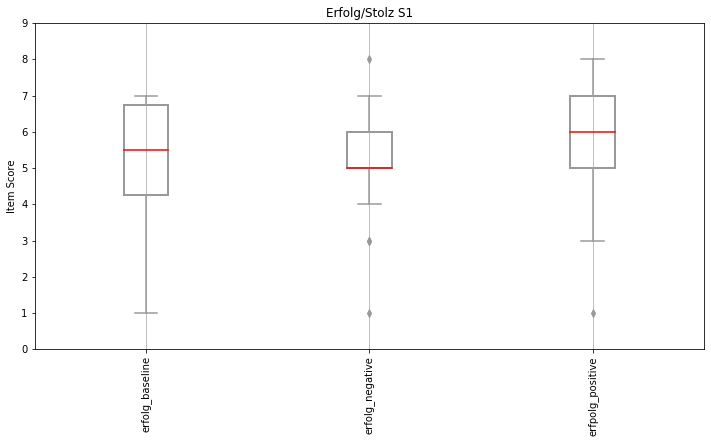

In [97]:
# Initialize figure 
f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data= erfolg_stolz, ax=ax, color='white',
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

ax.xaxis.grid(True)
ax.set(ylim=(0, 9))
ax.tick_params(axis='x', rotation=90)

ax.set(ylabel="Item Score")
ax.set_title('Erfolg/Stolz S1')

In [98]:
froehlich

froehlich_baseline  froehlich_negative  froehlich_positive
0                    4                   5                   5
1                    6                   5                   7
2                    5                   6                   5
3                    5                   1                   5
4                    7                   7                   6
5                    5                   5                   5
6                    6                   5                   7
7                    5                   4                   4
8                    4                   2                   4
9                    7                   7                   8
10                   7                   8                   8
11                   6                   6                   7
12                   5                   6                   6
13                   5                   3                   3
14                   6                   6                   6
15                   6                   5                   6
16                   6                   5                   6
17                   6                   5                   5
18                   7                   3                   3
19                   6                   6                   6
20                   7                   5                   5
21                   6                   7                   6
22                   7                   6                   6
23                   7                   7                   5
24                   5                   5                   5
25                   7                   7                   7

In [99]:
items_sample1 = [erfolg_stolz, traurig, waerme, frustration, froehlich, peinlich, aerger, erwartung,
                 neugierig, unangenehm, entspannt]


In [100]:
items_sample2 = [erfolg_s2, stolz_s2, waerme_s2, zuneigung_s2, frustration_s2, enttaeuschung_s2,
                  aerger_s2, wut_s2, trauer_s2, niedergeschlagenheit_s2, fröhlichkeit_s2, freude_s2,
                  peinlichkeit_s2, gleichgueltig_s2, gelangweilt_s2, unangenehm_s2, negativ_s2, entspannt_s2,
                  ruhig_s2, erwartung_s2]

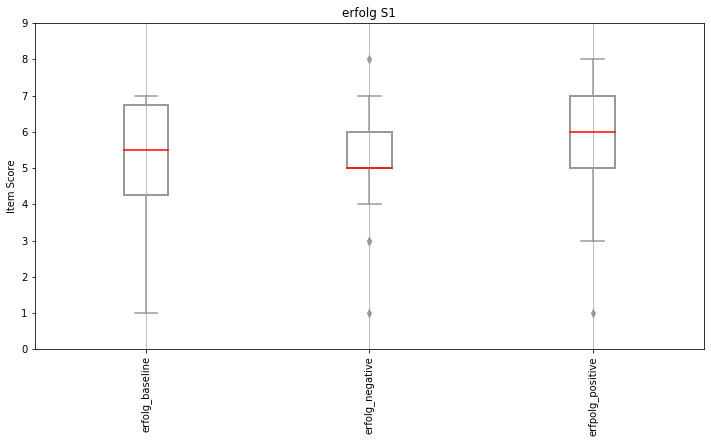

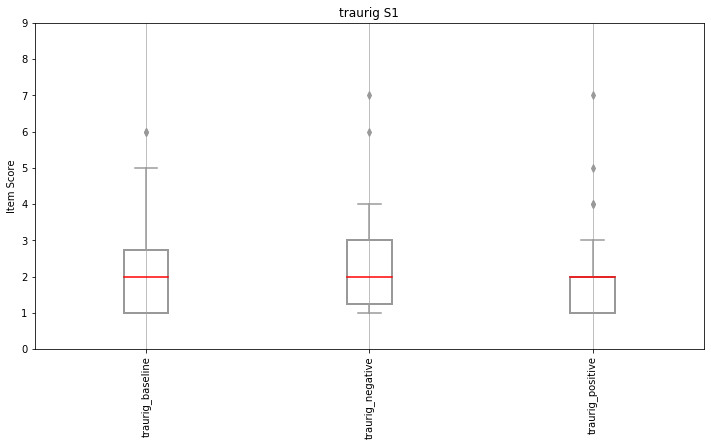

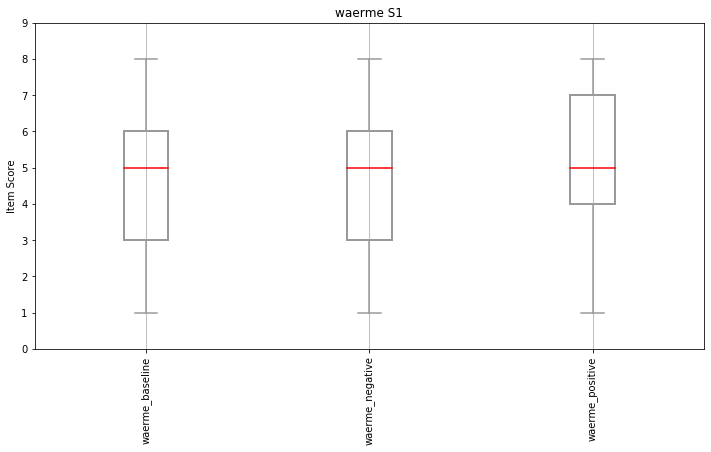

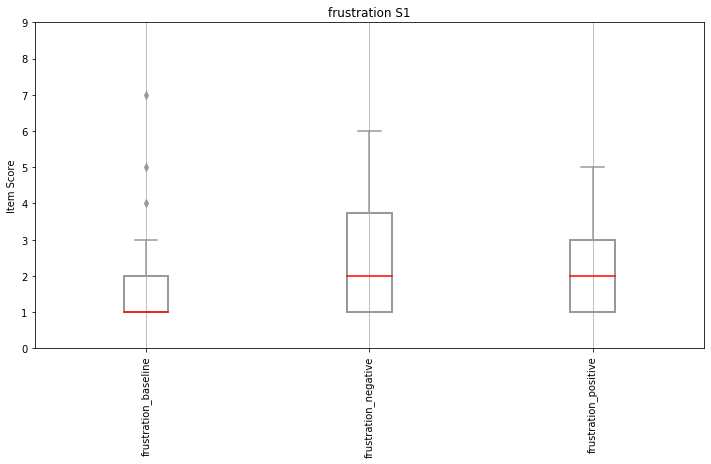

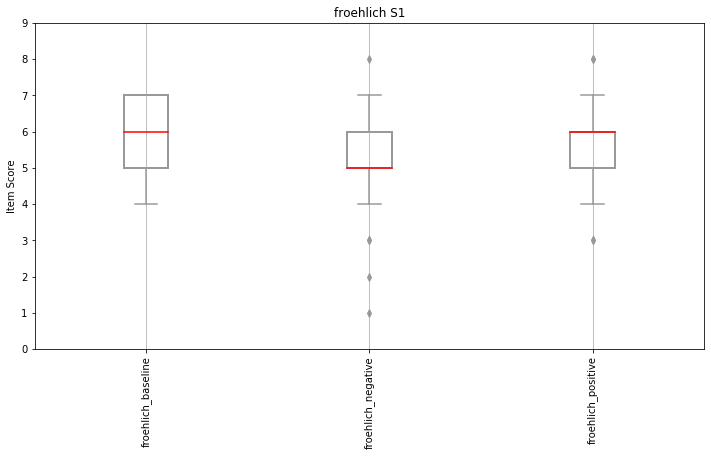

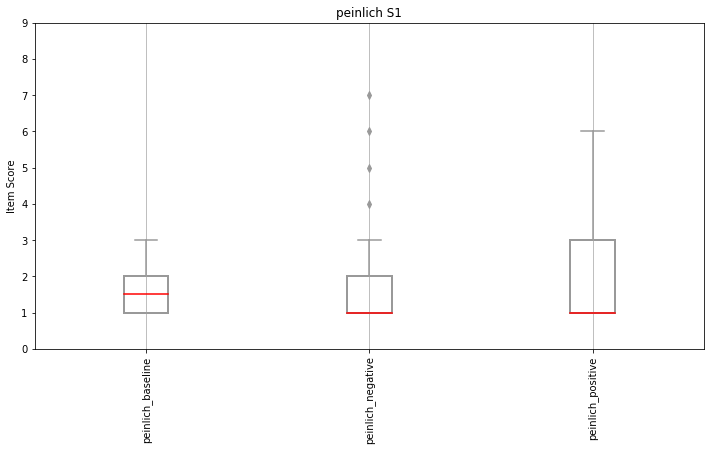

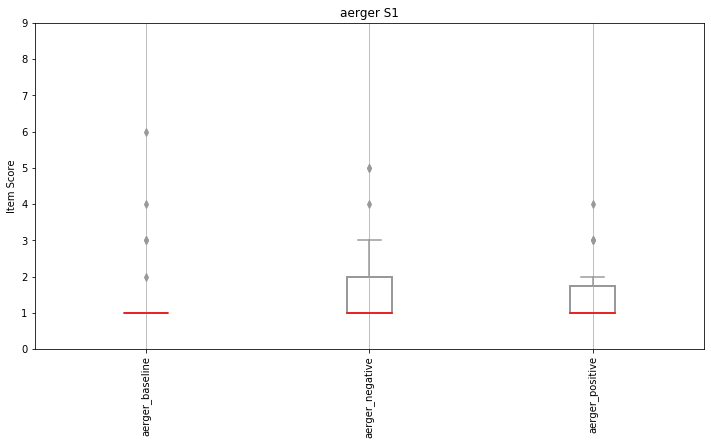

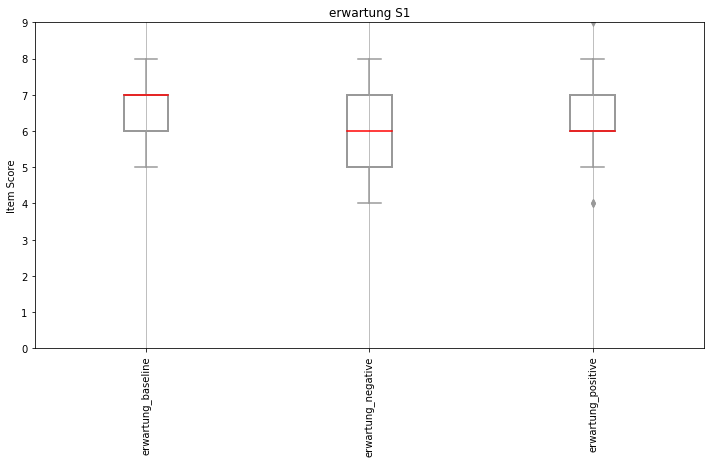

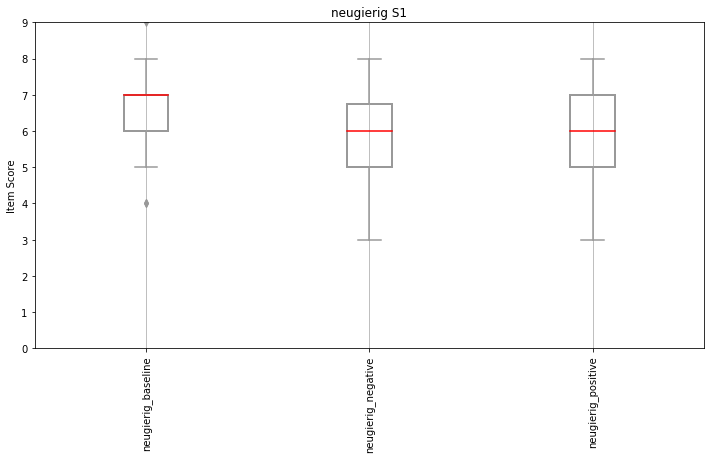

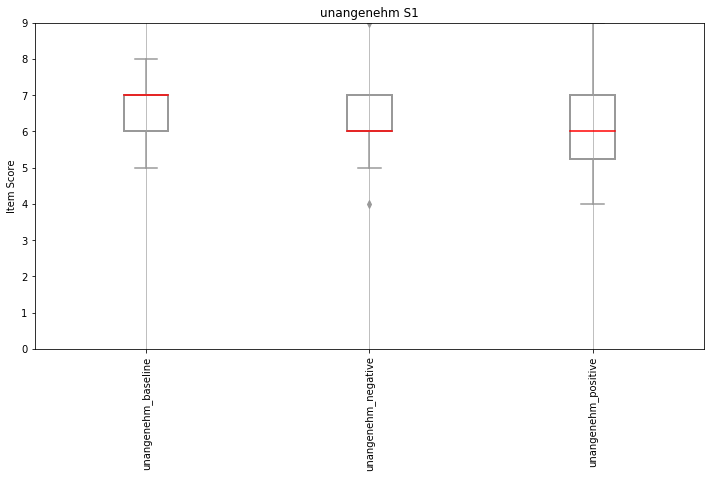

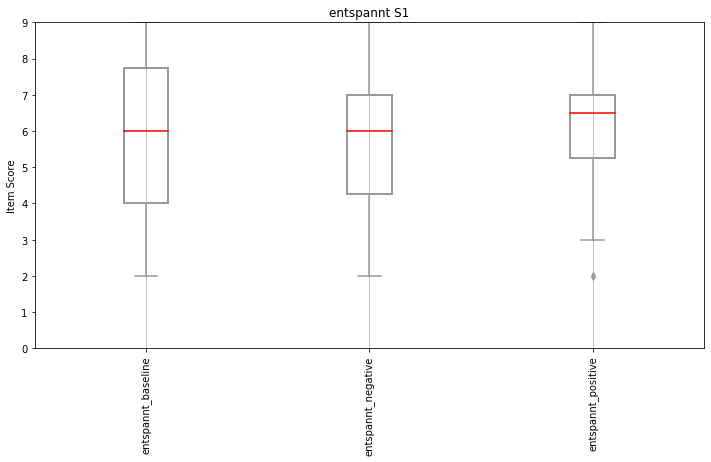

In [101]:
# Initialize figure
for i in items_sample1:
    f, ax = plt.subplots(figsize=(12, 6))

    sns.boxplot(data= i, ax=ax, color='white',
                medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

    ax.xaxis.grid(True)
    ax.set(ylim=(0, 9))
    ax.tick_params(axis='x', rotation=90)

    ax.set(ylabel="Item Score")
    ax.set_title(str(i.columns[0].split('_')[0]) + ' S1')
    f.savefig("/home/michael/master_thesis/plots/mood/" + str(i.columns[0].split('_')[0]) + '_S1'".png",
              dpi=300, bbox_inches='tight')

[Text(0, 0.5, 'Item Score')]

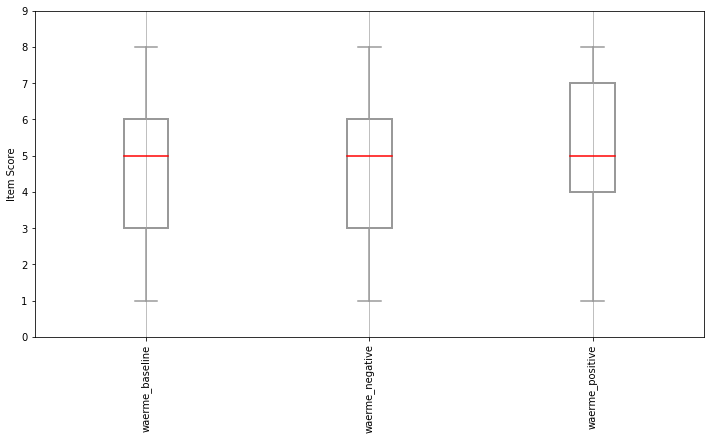

In [102]:
f, ax = plt.subplots(figsize=(12, 6))

sns.boxplot(data= waerme, ax=ax, color='white',
            medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

ax.xaxis.grid(True)
ax.set(ylim=(0, 9))
ax.tick_params(axis='x', rotation=90)

ax.set(ylabel="Item Score")
#ax.set_title(str(i.columns[0].split('_')[0]) + ' S1')
#f.savefig("/home/michael/master_thesis/plots/mood/" + str(i.columns[0].split('_')[0]) + ' S1'".png",
#          dpi=300, bbox_inches='tight')

erfolg
stolz
waerme
zuneigung
frustration
enttaeuschung
aerger
wut
trauer
niedergeschlagenheit
fröhlichkeit
freude
peinlichkeit
gleichgueltig
gelangweilt
unangenehm
negativ
entspannt
ruhig
erwartung


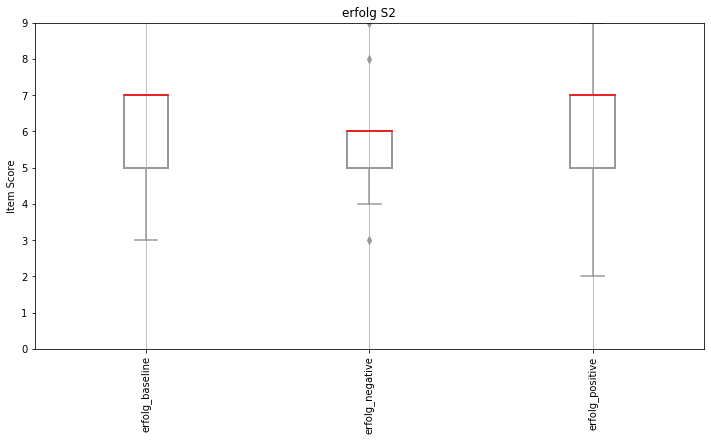

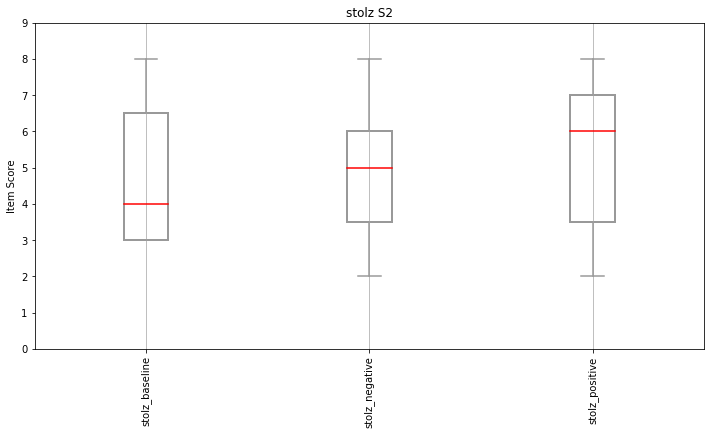

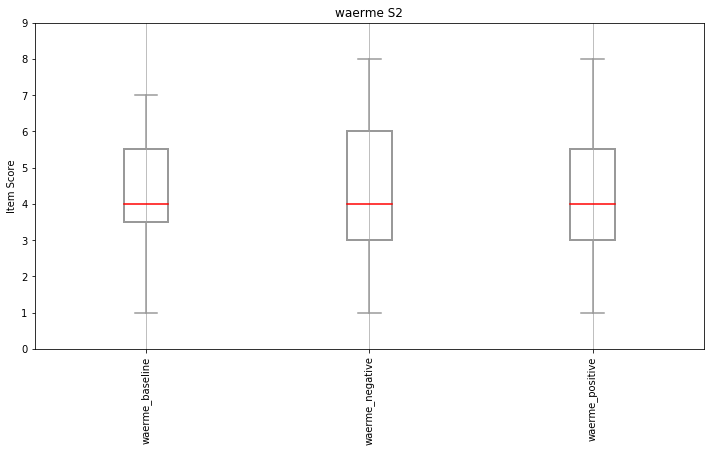

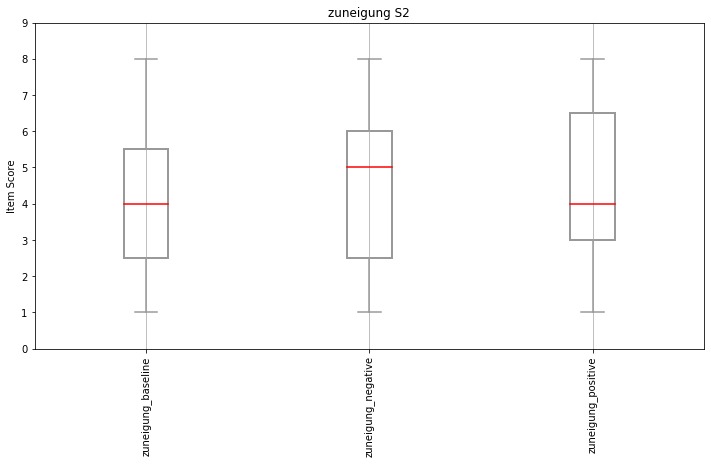

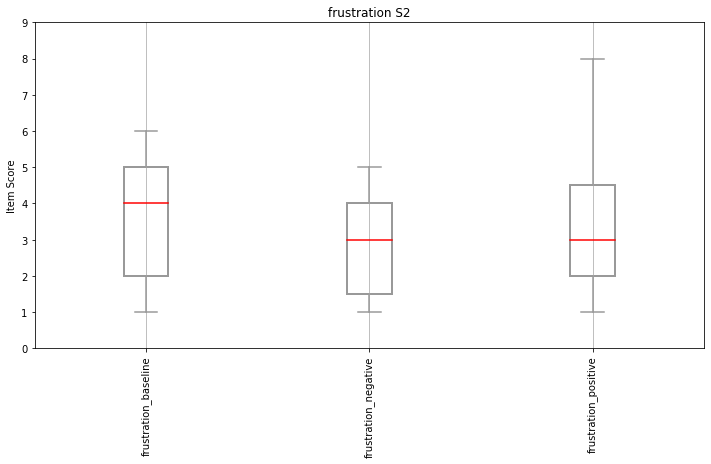

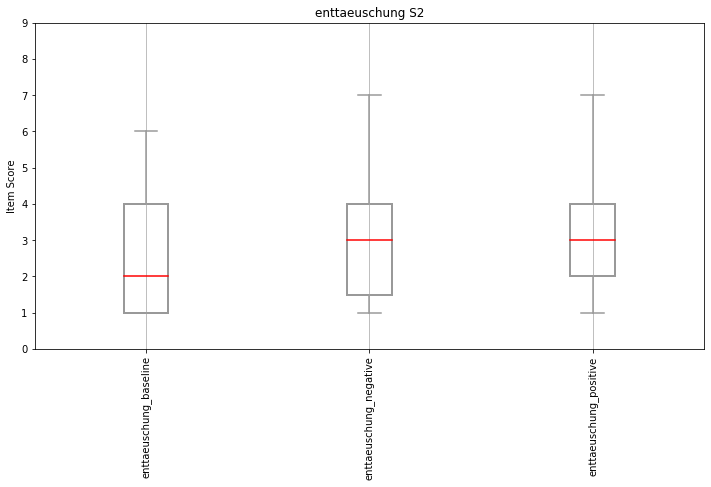

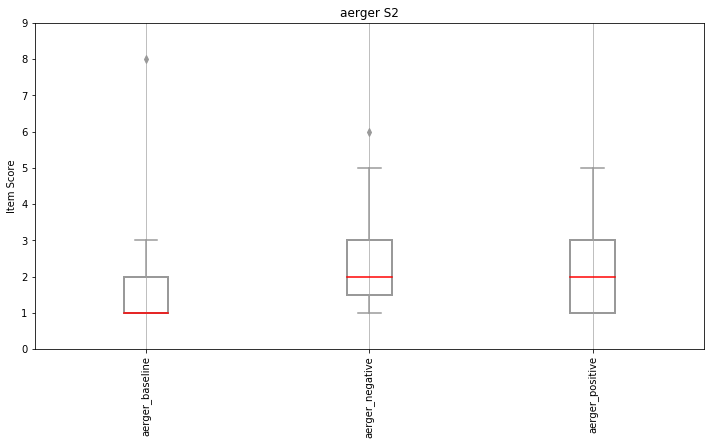

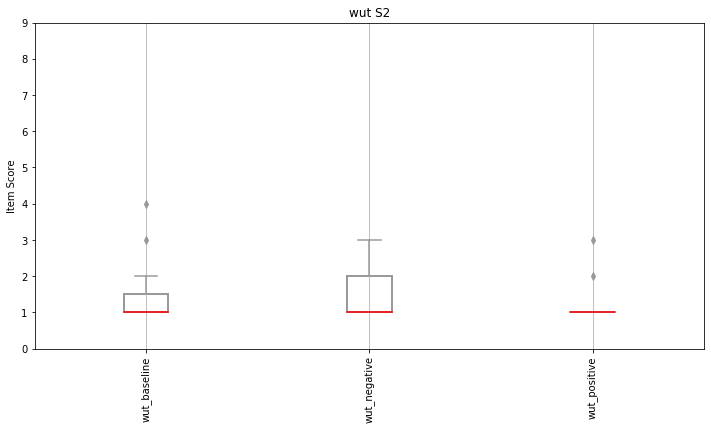

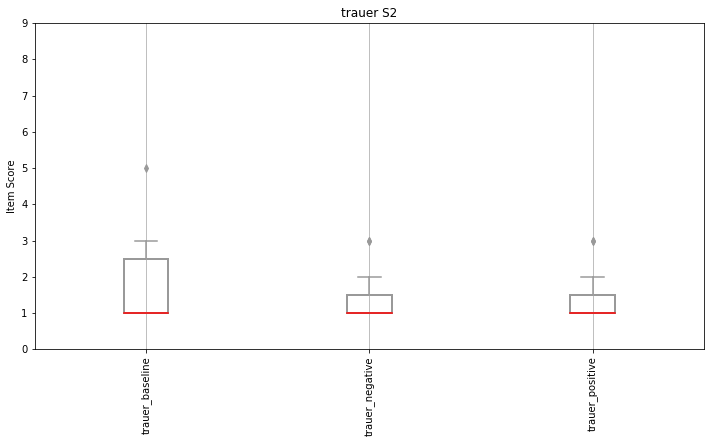

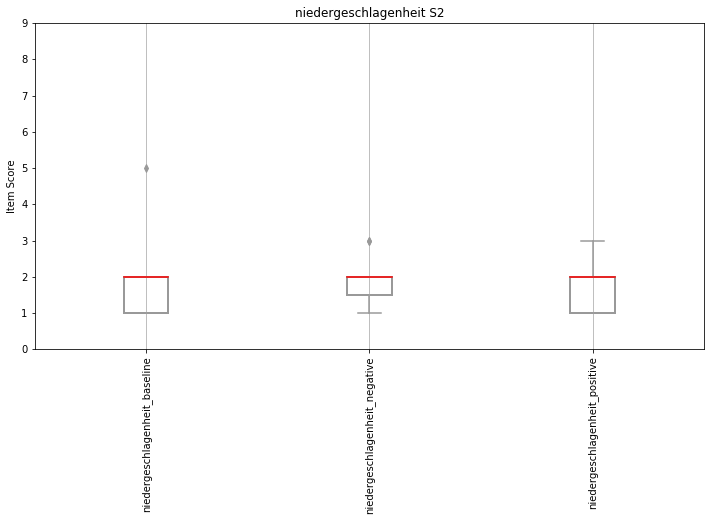

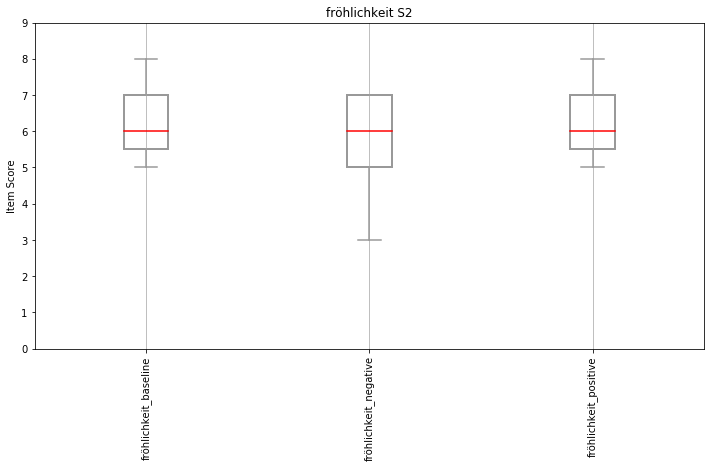

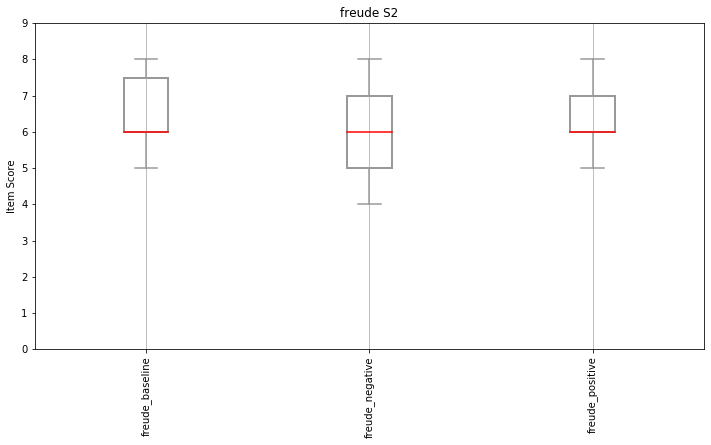

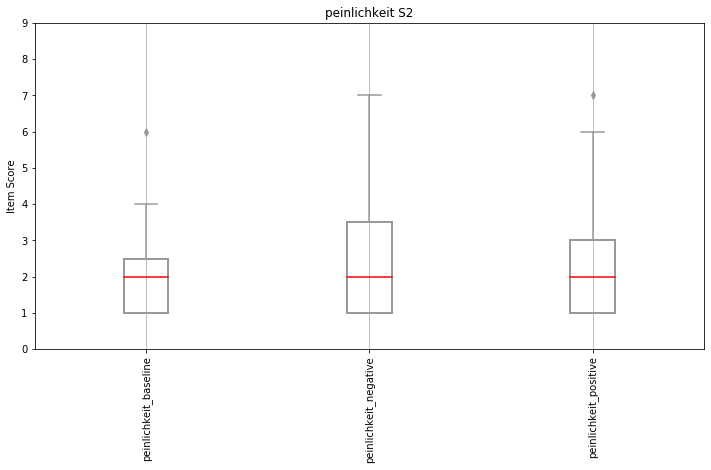

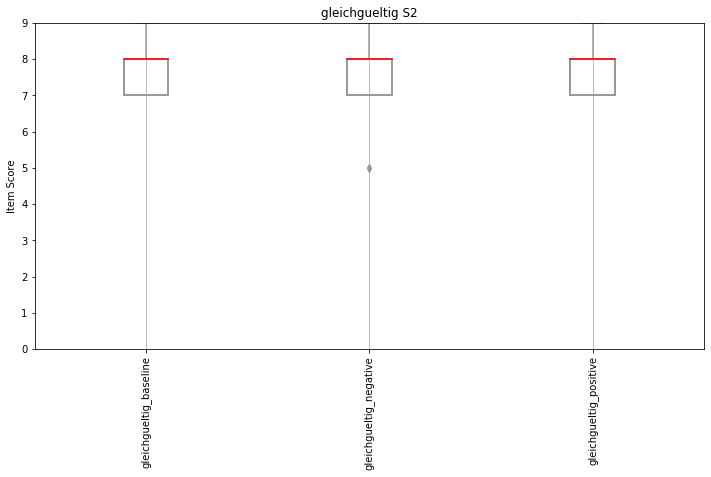

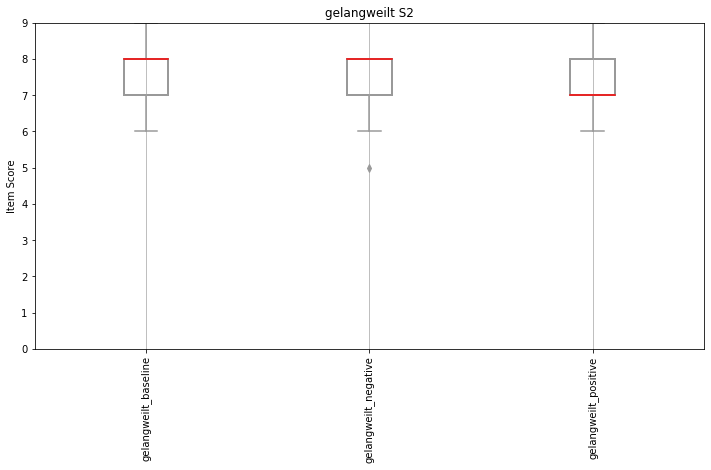

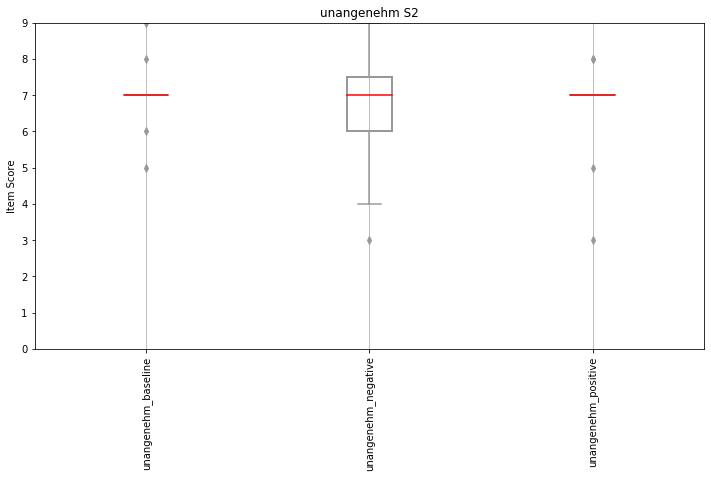

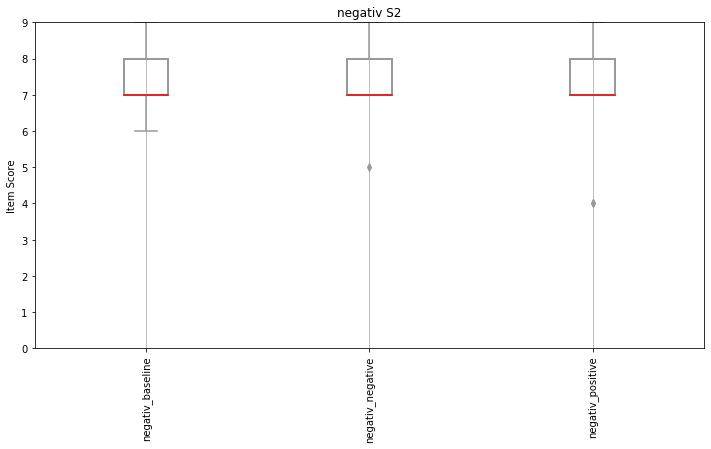

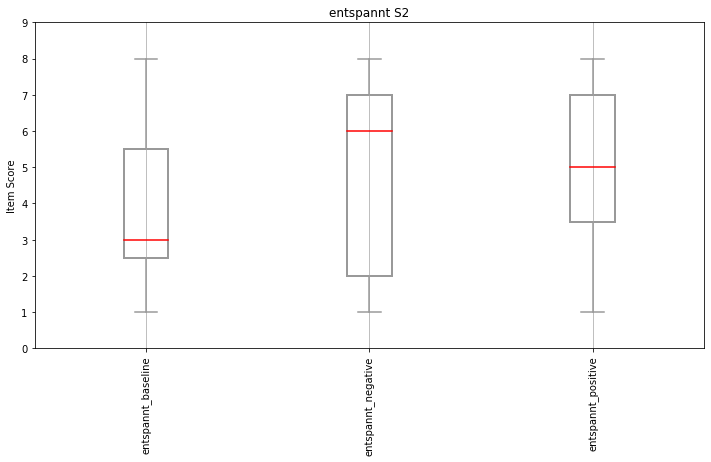

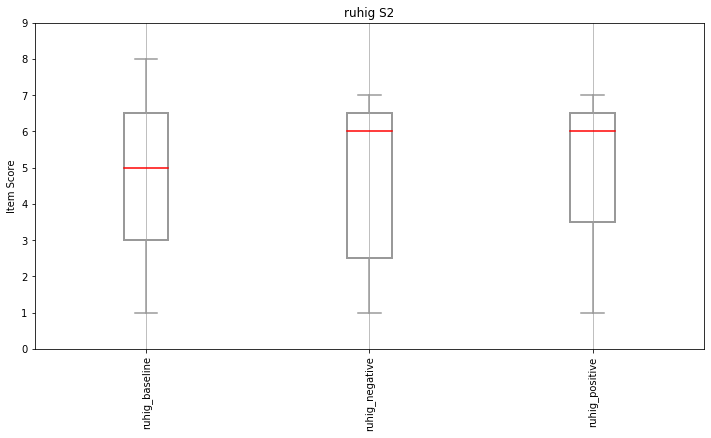

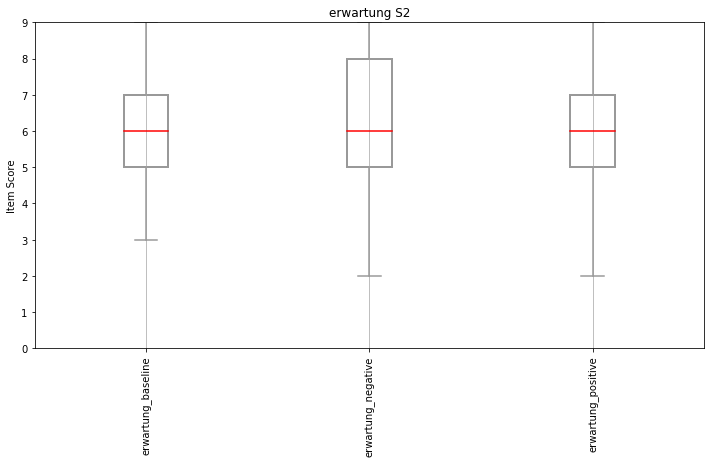

In [103]:
# Initialize figure
for i in items_sample2:
    #print(str(i.columns[0].split('_')[0]))
    f, ax = plt.subplots(figsize=(12, 6))

    sns.boxplot(data= i, ax=ax, color='white',
                medianprops={'color':'red'},boxprops = dict(linestyle='-', linewidth=2), width=0.2)

    ax.xaxis.grid(True)
    ax.set(ylim=(0, 9))
    ax.tick_params(axis='x', rotation=90)

    ax.set(ylabel="Item Score")
    ax.set_title(str(i.columns[0].split('_')[0]) + ' S2')
    f.savefig("/home/michael/master_thesis/plots/mood/" + str(i.columns[0].split('_')[0]) + ' S2'".png",
          dpi=300, bbox_inches='tight')

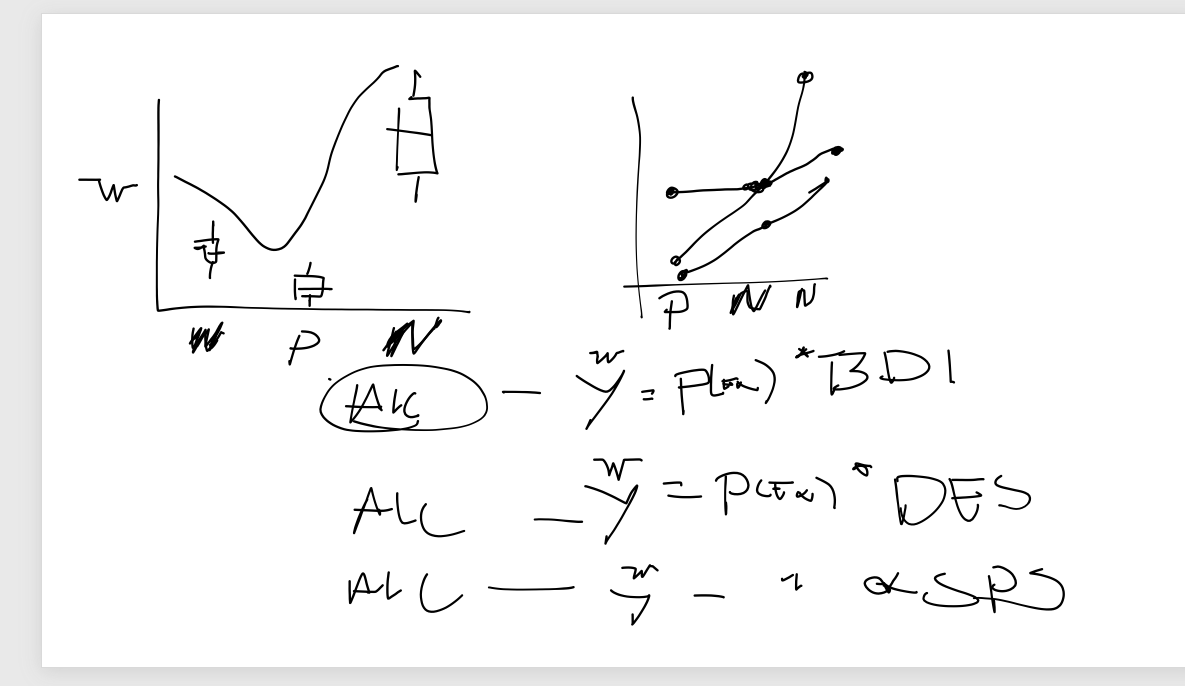